# Unintentional Non-Fatal Childhood Agricultural Injuries Presenting to United States Emergency Departments, 2000 to 2017

## Author: Ebuwa Evbuoma-Fike

## Last Edited: 8/13/2022, in progress!

## Project Information: https://github.com/ebuwaevbuoma-fike/childhood-agricultural-injury-project

# Installation Procedures

In [2]:
#Install required packages
!pip install pandas numpy scikit_learn seaborn matplotlib pingouin

In [34]:
#!conda install seaborn pandas numpy scipy matplotlib seaborn tabulate statsmodels missingno scikit-learn tableone

Solving environment: done

## Package Plan ##

  environment location: /Users/ebuwa/opt/anaconda3

  added / updated specs:
    - seaborn


The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2022.6.1~ --> pkgs/main::ca-certificates-2022.07.19-hecd8cb5_0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge::certifi-2022.6.15-py39h6~ --> pkgs/main::certifi-2022.6.15-py39hecd8cb5_0
  conda              conda-forge::conda-4.13.0-py39h6e9494~ --> pkgs/main::conda-4.13.0-py39hecd8cb5_0
  openssl            conda-forge::openssl-1.1.1q-hfe4f2af_0 --> pkgs/main::openssl-1.1.1q-hca72f7f_0


Proceed ([y]/n)? ^C

CondaSystemExit: 
Operation aborted.  Exiting.



In [1]:
#Import python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rc("font", size=14) #set plot font size
import seaborn as sns #set color schemes
sns.set(style = "white")
sns.set(style = "whitegrid", color_codes = True)

import statsmodels.api as sm
from statsmodels.stats.weightstats import DescrStatsW
import scipy
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import missingno as msno
from tabulate import tabulate
from tableone import TableOne
import miceforest as mf


#Import modules from scikit-learn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_score, average_precision_score,f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

from tqdm import tqdm_notebook as tqdm

## DATA WRANGLING

### Import datasets

In [2]:
#Import datasets, 2000 to 2017
neiss2000 = pd.read_stata("neiss2000.dta")
neiss2001 = pd.read_stata("neiss2001.dta")
neiss2002 = pd.read_stata("neiss2002.dta")
neiss2003 = pd.read_stata("neiss2003.dta")
neiss2004 = pd.read_stata("neiss2004.dta")
neiss2005 = pd.read_stata("neiss2005.dta")
neiss2006 = pd.read_stata("neiss2006.dta")
neiss2007 = pd.read_stata("neiss2007.dta")
neiss2008 = pd.read_stata("neiss2008.dta")
neiss2009 = pd.read_stata("neiss2009.dta")
neiss2010 = pd.read_stata("neiss2010.dta")
neiss2011 = pd.read_stata("neiss2011.dta")
neiss2012 = pd.read_stata("neiss2012.dta")
neiss2013 = pd.read_stata("neiss2013.dta")
neiss2014 = pd.read_stata("neiss2014.dta")
neiss2015 = pd.read_stata("neiss2015.dta")
neiss2016 = pd.read_stata("neiss2016.dta")
neiss2017 = pd.read_stata("neiss2017.dta")


### Inspect and subset datasets

#### NEISS 2000 data

In [3]:
#List features
print(list(neiss2000))

#Print dimensions
print(neiss2000.shape)
#There are 231,672 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2000.head()

['nek', 'weight', 'psu', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(231672, 22)


,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,706671,119.826698,63,LOWER TRUNK,STRAIN/SPRAIN,TREATED/RELEASED,FEMALE,MED,41 YRS,NON-HISP/NS,JULY,41,40-44,35-44,LOWER TRUNK,INJURY DX,OTHER PROPERTY,WHITE,WHITE NH,UNINT/UNK,OVEREXERTION,239.653305
1,706672,119.826698,63,UPPER TRUNK,STRAIN/SPRAIN,TREATED/RELEASED,MALE,MED,72 YRS,NON-HISP/NS,JULY,72,70-74,65-74,UPPER TRUNK,INJURY DX,OTHER PROPERTY,WHITE,WHITE NH,UNINT/UNK,OVEREXERTION,239.653305
2,706673,119.826698,63,ANKLE,STRAIN/SPRAIN,TREATED/RELEASED,FEMALE,MED,75 YRS,NON-HISP/NS,JULY,75,75-79,75-84,LEG/FOOT,INJURY DX,OTHER PROPERTY,WHITE,WHITE NH,UNINT/UNK,OVEREXERTION,239.653305
3,706674,119.826698,63,FACE,PUNCTURE,TREATED/RELEASED,FEMALE,MED,17 YRS,NON-HISP/NS,JULY,17,15-19,15-19,HEAD/NECK,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,OTH BITE/STING,239.653305
4,706675,119.826698,63,FACE,CONTUSN ABR,TREATED/RELEASED,FEMALE,MED,77 YRS,NON-HISP/NS,JULY,77,75-79,75-84,HEAD/NECK,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,FALL,239.653305


In [4]:
#Overview and datatypes
print(neiss2000.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231672 entries, 0 to 231671
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   nek       231672 non-null  int32   
 1   weight    231672 non-null  float32 
 2   psu       231672 non-null  int32   
 3   bdypt     231672 non-null  category
 4   diag      231672 non-null  category
 5   disp      231672 non-null  category
 6   sex       231672 non-null  category
 7   stratum   231672 non-null  category
 8   age_c     231672 non-null  category
 9   hisp_c    231672 non-null  category
 10  trmon_c   231672 non-null  category
 11  ageyr_c   231672 non-null  category
 12  ageg4_c   231672 non-null  category
 13  ageg6_c   231672 non-null  category
 14  bdyptg_c  231672 non-null  category
 15  injury_c  231672 non-null  category
 16  locg_c    231672 non-null  category
 17  race2_c   231672 non-null  category
 18  raceth_c  231672 non-null  category
 19  violen_c  231672 non-nu

In [5]:
#Count missing values by feature
neiss2000.apply(pd.isnull).sum() 

#Although there are missing values (per codebook), they are not encoded as null. Recoding below.

nek         0
weight      0
psu         0
bdypt       0
diag        0
disp        0
sex         0
stratum     0
age_c       0
hisp_c      0
trmon_c     0
ageyr_c     0
ageg4_c     0
ageg6_c     0
bdyptg_c    0
injury_c    0
locg_c      0
race2_c     0
raceth_c    0
violen_c    0
pcause_c    0
weighta     0
dtype: int64

In [6]:
#Create a function, cat_finder to inspect categories for all features

def cat_finder(df, categories):
    output = []
    for category in categories:
        output.append(df[category].unique())
    return output

In [7]:
#Test function
categories_2000 = cat_finder(neiss2000, ["disp", "sex","hisp_c","trmon_c","bdyptg_c","injury_c","locg_c","race2_c",
                                       "raceth_c","violen_c"])

In [8]:
print(categories_2000) #Ordering appears to match dataset documentation

[['TREATED/RELEASED', 'HOSPITALIZED', 'TRANSFD/RELEASED', 'UNK', 'OBSERVATION']
Categories (5, object): ['TREATED/RELEASED' < 'TRANSFD/RELEASED' < 'HOSPITALIZED' < 'OBSERVATION' < 'UNK'], ['FEMALE', 'MALE', 'UNK']
Categories (3, object): ['UNK' < 'MALE' < 'FEMALE'], ['NON-HISP/NS', 'HISPANIC']
Categories (2, object): ['HISPANIC' < 'NON-HISP/NS'], ['JULY', 'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER']
Categories (6, object): ['JULY' < 'AUGUST' < 'SEPTEMBER' < 'OCTOBER' < 'NOVEMBER' < 'DECEMBER'], ['LOWER TRUNK', 'UPPER TRUNK', 'LEG/FOOT', 'HEAD/NECK', 'ARM/HAND', 'OTHER', 'UNK']
Categories (7, object): ['UNK' < 'HEAD/NECK' < 'UPPER TRUNK' < 'LOWER TRUNK' < 'ARM/HAND' < 'LEG/FOOT' < 'OTHER'], ['INJURY DX']
Categories (1, object): ['INJURY DX'], ['OTHER PROPERTY', 'HOME/APT/MOBILE', 'STREET', 'SCHOOL/SPORTS', 'UNK', 'FARM']
Categories (6, object): ['UNK' < 'HOME/APT/MOBILE' < 'SCHOOL/SPORTS' < 'STREET' < 'OTHER PROPERTY' < 'FARM'], ['WHITE', 'OTHER', 'BLACK', 'ASIAN', 'NS', 'A

### Visualize key categorical features: Bar Plots

In [10]:
#Create a function called plot_barplots to output bar plots
def plot_barplots(dataframe, clmn, xlabel, title):
    y = dataframe[clmn].value_counts()
    plt.bar(y.index,y)
    plt.ylabel("Frequency", fontsize = 12)
    plt.xlabel(xlabel, fontsize = 12)
    plt.title(title)

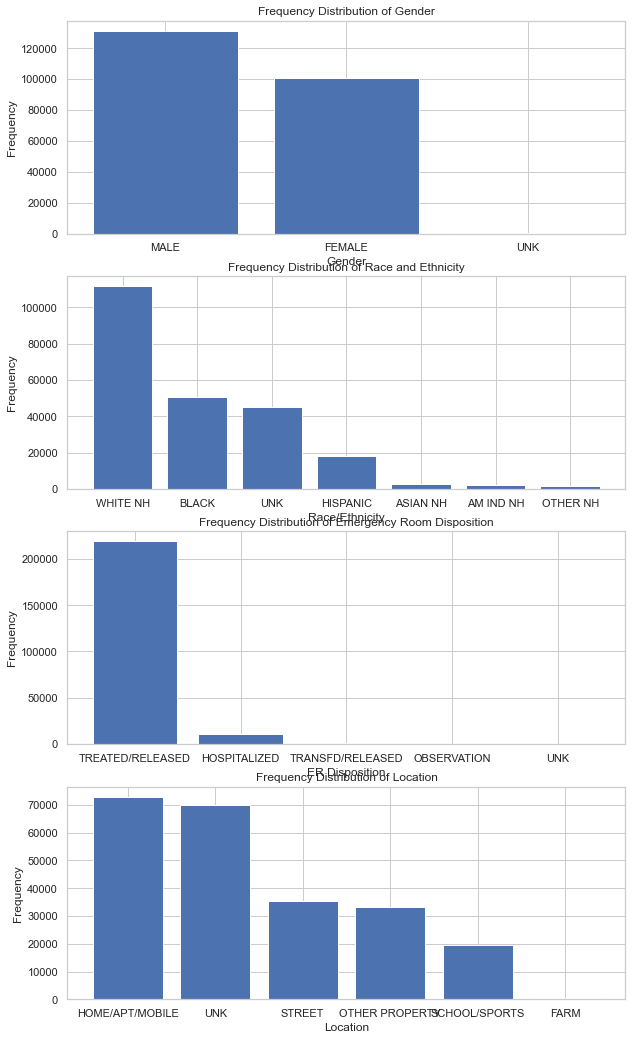

In [11]:
#Plot multiple bar plots for key features
plt.figure(figsize = (10,18))
plt.subplot(4,1,1)
plot_barplots(neiss2000, "sex", "Gender", "Frequency Distribution of Gender")
#plt.subplot(4,1,2)
#plot_barplots(neiss2000, "hisp_c", "Ethnicity", "Frequency Distribution of Ethnicity")
plt.subplot(4,1,2)
plot_barplots(neiss2000, "raceth_c", "Race/Ethnicity", "Frequency Distribution of Race and Ethnicity")
plt.subplot(4,1,3)
plot_barplots(neiss2000, "disp", "ER Disposition", "Frequency Distribution of Emergency Room Disposition")
plt.subplot(4,1,4)
plot_barplots(neiss2000, "locg_c", "Location", "Frequency Distribution of Location")

### Recode categories to lowercase

In [12]:
#Create a function to apply lowercase to feature categories and ensure categories are string type
def dataframe_case_change(df, categories, lCase = True):
    if lCase:
        for category in categories:
            try:
                df[category] = df[category].apply(str.lower)
            except:
                print("Category issue for " + category)
                df[category] = df[category].astype("string")
                df[category] = df[category].apply(str.lower)
    else:
        for category in categories:
            try:
                df[category] = df[category].apply(str.lower)
            except:
                pass
    return df

In [14]:
#Create a list of features of interest, common to all datasets
feature_list = ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "age_c","ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ]


In [15]:
#Test the function
neiss2000_df = dataframe_case_change(neiss2000, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2000_df.head()

Category issue for ageyr_c


,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,706671,119.826698,63,lower trunk,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,july,41,40-44,35-44,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305
1,706672,119.826698,63,upper trunk,strain/sprain,treated/released,male,med,72 yrs,non-hisp/ns,july,72,70-74,65-74,upper trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305
2,706673,119.826698,63,ankle,strain/sprain,treated/released,female,med,75 yrs,non-hisp/ns,july,75,75-79,75-84,leg/foot,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305
3,706674,119.826698,63,face,puncture,treated/released,female,med,17 yrs,non-hisp/ns,july,17,15-19,15-19,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,oth bite/sting,239.653305
4,706675,119.826698,63,face,contusn abr,treated/released,female,med,77 yrs,non-hisp/ns,july,77,75-79,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,239.653305


In [16]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2000["ageyr_c"] = neiss2000["ageyr_c"].astype("category")

In [17]:
#Test the function
neiss2000_df = dataframe_case_change(neiss2000, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2000_df.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,706671,119.826698,63,lower trunk,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,july,41,40-44,35-44,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305
1,706672,119.826698,63,upper trunk,strain/sprain,treated/released,male,med,72 yrs,non-hisp/ns,july,72,70-74,65-74,upper trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305
2,706673,119.826698,63,ankle,strain/sprain,treated/released,female,med,75 yrs,non-hisp/ns,july,75,75-79,75-84,leg/foot,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305
3,706674,119.826698,63,face,puncture,treated/released,female,med,17 yrs,non-hisp/ns,july,17,15-19,15-19,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,oth bite/sting,239.653305
4,706675,119.826698,63,face,contusn abr,treated/released,female,med,77 yrs,non-hisp/ns,july,77,75-79,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,239.653305


In [18]:
#Relabel neiss2001 dataset
neiss2000 = dataframe_case_change(neiss2000, feature_list)
#Inspect
neiss2000.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,706671,119.826698,63,lower trunk,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,july,41,40-44,35-44,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305
1,706672,119.826698,63,upper trunk,strain/sprain,treated/released,male,med,72 yrs,non-hisp/ns,july,72,70-74,65-74,upper trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305
2,706673,119.826698,63,ankle,strain/sprain,treated/released,female,med,75 yrs,non-hisp/ns,july,75,75-79,75-84,leg/foot,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305
3,706674,119.826698,63,face,puncture,treated/released,female,med,17 yrs,non-hisp/ns,july,17,15-19,15-19,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,oth bite/sting,239.653305
4,706675,119.826698,63,face,contusn abr,treated/released,female,med,77 yrs,non-hisp/ns,july,77,75-79,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,239.653305


In [20]:
#Append a year column
year = 2000
neiss2000["year"] = year

#Inspect changes
neiss2000.columns

Index(['nek', 'weight', 'psu', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year'],
      dtype='object')

In [21]:
#Check for duplicates based on value of nek
neiss2000.duplicated(subset = "nek").sum()

0

In [22]:
#Create a feature, user, based on length of dataframe
neiss2000["user"] = range(1, len(neiss2000) + 1)

#Inspect
neiss2000.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user
0,706671,119.826698,63,lower trunk,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,july,41,40-44,35-44,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000,1
1,706672,119.826698,63,upper trunk,strain/sprain,treated/released,male,med,72 yrs,non-hisp/ns,july,72,70-74,65-74,upper trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000,2
2,706673,119.826698,63,ankle,strain/sprain,treated/released,female,med,75 yrs,non-hisp/ns,july,75,75-79,75-84,leg/foot,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000,3
3,706674,119.826698,63,face,puncture,treated/released,female,med,17 yrs,non-hisp/ns,july,17,15-19,15-19,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,oth bite/sting,239.653305,2000,4
4,706675,119.826698,63,face,contusn abr,treated/released,female,med,77 yrs,non-hisp/ns,july,77,75-79,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,239.653305,2000,5


In [23]:
#Create unique IDs called, "id" using year and user
neiss2000["id"] = neiss2000["year"].astype(str) + neiss2000["user"].astype(str)

#Inspect
neiss2000.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,706671,119.826698,63,lower trunk,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,july,41,40-44,35-44,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000,1,20001
1,706672,119.826698,63,upper trunk,strain/sprain,treated/released,male,med,72 yrs,non-hisp/ns,july,72,70-74,65-74,upper trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000,2,20002
2,706673,119.826698,63,ankle,strain/sprain,treated/released,female,med,75 yrs,non-hisp/ns,july,75,75-79,75-84,leg/foot,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000,3,20003
3,706674,119.826698,63,face,puncture,treated/released,female,med,17 yrs,non-hisp/ns,july,17,15-19,15-19,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,oth bite/sting,239.653305,2000,4,20004
4,706675,119.826698,63,face,contusn abr,treated/released,female,med,77 yrs,non-hisp/ns,july,77,75-79,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,239.653305,2000,5,20005


In [24]:
#Remove "user" in preparation for concatenation
del neiss2000["user"]

#Inspect changes
neiss2000.columns

Index(['nek', 'weight', 'psu', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year', 'id'],
      dtype='object')

#### NEISS 2001 data

In [25]:
#List features
print(list(neiss2001))

#Print dimensions
print(neiss2001.shape)
#There are 479, 703 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2001.head()

['nek', 'weight', 'psu', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(479703, 22)


,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,10115079.0,120.11882,63,WRIST,STRAIN/SPRAIN,TREATED/RELEASED,MALE,MED,21 YRS,NON-HISP/NS,JANUARY,21,20-24,20-24,ARM/HAND,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,FALL,120.11882
1,10115080.0,120.11882,63,FOOT,STRAIN/SPRAIN,TREATED/RELEASED,MALE,MED,72 YRS,NON-HISP/NS,JANUARY,72,70-74,65-74,LEG/FOOT,INJURY DX,OTHER PROPERTY,WHITE,WHITE NH,UNINT/UNK,OVEREXERTION,120.11882
2,10115081.0,120.11882,63,LOWER TRUNK,STRAIN/SPRAIN,TREATED/RELEASED,MALE,MED,30 YRS,NON-HISP/NS,JANUARY,30,30-34,25-34,LOWER TRUNK,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,OVEREXERTION,120.11882
3,10115082.0,120.11882,63,HEAD,FRACTURE,HOSPITALIZED,FEMALE,MED,82 YRS,NON-HISP/NS,JANUARY,82,80-84,75-84,HEAD/NECK,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,FALL,120.11882
4,10115084.0,120.11882,63,FACE,LACERATION,TREATED/RELEASED,MALE,MED,43 YRS,NON-HISP/NS,JANUARY,43,40-44,35-44,HEAD/NECK,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,FALL,120.11882


In [27]:
#Inspect data types
neiss2001.dtypes

nek          float32
weight       float32
psu             int8
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float32
dtype: object

In [28]:
#Itemize categories in neiss2001
categories_2001 = cat_finder(neiss2001, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2001)


[['WRIST', 'FOOT', 'LOWER TRUNK', 'HEAD', 'FACE', ..., 'EAR', 'UPPER LEG', 'PUBIC REGION', '25-50 PERCENT BODY', 'UNK/NS']
Length: 26
Categories (26, object): ['INTERNAL' < 'SHOULDER' < 'UPPER TRUNK' < 'ELBOW' ... 'NECK' < 'FINGER' < 'TOE' < 'EAR'], ['STRAIN/SPRAIN', 'FRACTURE', 'LACERATION', 'CONTUSN ABR', 'POISONING', ..., 'DENTAL INJ', 'BURN ELECT', 'NERVE DAMAGE', 'BURN NOT SPEC', 'UNK/NS']
Length: 31
Categories (31, object): ['INGESTION' < 'ASPIRATION' < 'BURN ELECT' < 'BURN NOT SPEC' ... 'OTHER' < 'AVULSION' < 'RADIATION' < 'DERMA/CONJUNCT'], ['TREATED/RELEASED', 'HOSPITALIZED', 'TRANSFD/RELEASED', 'OBSERVATION', 'UNK']
Categories (5, object): ['TREATED/RELEASED' < 'TRANSFD/RELEASED' < 'HOSPITALIZED' < 'OBSERVATION' < 'UNK'], ['MALE', 'FEMALE', 'UNK']
Categories (3, object): ['UNK' < 'MALE' < 'FEMALE'], ['MED', 'SMALL', 'VERY LARGE', 'LARGE', 'CHILDREN'S']
Categories (5, object): ['SMALL' < 'MED' < 'LARGE' < 'VERY LARGE' < 'CHILDREN'S'], ['NON-HISP/NS', 'HISPANIC']
Categories (2,

In [29]:
#Test the function
neiss2001_df = dataframe_case_change(neiss2001, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2001_df.head()

Category issue for ageyr_c


,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,10115079.0,120.11882,63,wrist,strain/sprain,treated/released,male,med,21 yrs,non-hisp/ns,january,21,20-24,20-24,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882
1,10115080.0,120.11882,63,foot,strain/sprain,treated/released,male,med,72 yrs,non-hisp/ns,january,72,70-74,65-74,leg/foot,injury dx,other property,white,white nh,unint/unk,overexertion,120.11882
2,10115081.0,120.11882,63,lower trunk,strain/sprain,treated/released,male,med,30 yrs,non-hisp/ns,january,30,30-34,25-34,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,120.11882
3,10115082.0,120.11882,63,head,fracture,hospitalized,female,med,82 yrs,non-hisp/ns,january,82,80-84,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882
4,10115084.0,120.11882,63,face,laceration,treated/released,male,med,43 yrs,non-hisp/ns,january,43,40-44,35-44,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882


In [30]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2001["ageyr_c"] = neiss2001["ageyr_c"].astype("category")

In [31]:
#"nek" appears to be float, convert to integer data type
neiss2001["nek"] = neiss2001["nek"].astype("int")

In [32]:
#Test the function
neiss2001_df = dataframe_case_change(neiss2001, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2001_df.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,10115079,120.11882,63,wrist,strain/sprain,treated/released,male,med,21 yrs,non-hisp/ns,january,21,20-24,20-24,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882
1,10115080,120.11882,63,foot,strain/sprain,treated/released,male,med,72 yrs,non-hisp/ns,january,72,70-74,65-74,leg/foot,injury dx,other property,white,white nh,unint/unk,overexertion,120.11882
2,10115081,120.11882,63,lower trunk,strain/sprain,treated/released,male,med,30 yrs,non-hisp/ns,january,30,30-34,25-34,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,120.11882
3,10115082,120.11882,63,head,fracture,hospitalized,female,med,82 yrs,non-hisp/ns,january,82,80-84,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882
4,10115084,120.11882,63,face,laceration,treated/released,male,med,43 yrs,non-hisp/ns,january,43,40-44,35-44,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882


In [33]:
#Relabel neiss2001 dataset
neiss2001 = dataframe_case_change(neiss2001, feature_list)
#Inspect
neiss2001.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,10115079,120.11882,63,wrist,strain/sprain,treated/released,male,med,21 yrs,non-hisp/ns,january,21,20-24,20-24,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882
1,10115080,120.11882,63,foot,strain/sprain,treated/released,male,med,72 yrs,non-hisp/ns,january,72,70-74,65-74,leg/foot,injury dx,other property,white,white nh,unint/unk,overexertion,120.11882
2,10115081,120.11882,63,lower trunk,strain/sprain,treated/released,male,med,30 yrs,non-hisp/ns,january,30,30-34,25-34,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,120.11882
3,10115082,120.11882,63,head,fracture,hospitalized,female,med,82 yrs,non-hisp/ns,january,82,80-84,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882
4,10115084,120.11882,63,face,laceration,treated/released,male,med,43 yrs,non-hisp/ns,january,43,40-44,35-44,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882


In [34]:
#Append a year column
year = 2001
neiss2001["year"] = year

#Inspect changes
neiss2001.columns


Index(['nek', 'weight', 'psu', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year'],
      dtype='object')

In [35]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2001.duplicated(subset = "nek").sum()

7337

In [36]:
#Check for duplicates based on identical observations (all columns)
neiss2001.duplicated().sum()

3

In [37]:
#Show duplicates
neiss2001[neiss2001.duplicated(keep=False)]

#Duplicates occur across all columns
#This suggests the nek values were erroneously assigned

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
72369,20115740,115.491875,82,all parts body,poisoning,treated/released,male,small,13 yrs,non-hisp/ns,december,13,10-14,10-14,other,injury dx,unk,am indian,am ind nh,unint/unk,oth specified,115.491875,2001
72370,20115740,115.491875,82,all parts body,poisoning,treated/released,male,small,13 yrs,non-hisp/ns,december,13,10-14,10-14,other,injury dx,unk,am indian,am ind nh,unint/unk,oth specified,115.491875,2001
177498,20109132,25.020855,34,lower trunk,strain/sprain,treated/released,female,very large,32 yrs,non-hisp/ns,december,32,30-34,25-34,lower trunk,injury dx,street,black,black,unint/unk,mv-occupant,25.020855,2001
177500,20109132,25.020855,34,lower trunk,strain/sprain,treated/released,female,very large,32 yrs,non-hisp/ns,december,32,30-34,25-34,lower trunk,injury dx,street,black,black,unint/unk,mv-occupant,25.020855,2001
399884,20124632,9.396160,32,ankle,strain/sprain,treated/released,male,children's,16 yrs,non-hisp/ns,november,16,15-19,15-19,leg/foot,injury dx,school/sports,white,white nh,unint/unk,overexertion,9.396160,2001
399885,20124632,9.396160,32,ankle,strain/sprain,treated/released,male,children's,16 yrs,non-hisp/ns,november,16,15-19,15-19,leg/foot,injury dx,school/sports,white,white nh,unint/unk,overexertion,9.396160,2001


In [38]:
#Drop duplicated observations
neiss2001.drop_duplicates(inplace = True)

In [39]:
#Inspect duplicates
neiss2001.duplicated().sum()

0

In [40]:
#Create a feature, user, based on length of dataframe
neiss2001["user"] = range(1, len(neiss2001) + 1)

#Inspect
neiss2001["user"].describe()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user
0,10115079,120.11882,63,wrist,strain/sprain,treated/released,male,med,21 yrs,non-hisp/ns,january,21,20-24,20-24,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882,2001,1
1,10115080,120.11882,63,foot,strain/sprain,treated/released,male,med,72 yrs,non-hisp/ns,january,72,70-74,65-74,leg/foot,injury dx,other property,white,white nh,unint/unk,overexertion,120.11882,2001,2
2,10115081,120.11882,63,lower trunk,strain/sprain,treated/released,male,med,30 yrs,non-hisp/ns,january,30,30-34,25-34,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,120.11882,2001,3
3,10115082,120.11882,63,head,fracture,hospitalized,female,med,82 yrs,non-hisp/ns,january,82,80-84,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882,2001,4
4,10115084,120.11882,63,face,laceration,treated/released,male,med,43 yrs,non-hisp/ns,january,43,40-44,35-44,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882,2001,5


In [41]:
neiss2001["user"].describe()

count    479700.000000
mean     239850.500000
std      138477.606402
min           1.000000
25%      119925.750000
50%      239850.500000
75%      359775.250000
max      479700.000000
Name: user, dtype: float64

In [42]:
#Create unique IDs called, "id" using year and user
neiss2001["id"] = neiss2001["year"].astype(str) + neiss2001["user"].astype(str)

#Inspect
neiss2001.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,10115079,120.11882,63,wrist,strain/sprain,treated/released,male,med,21 yrs,non-hisp/ns,january,21,20-24,20-24,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882,2001,1,20011
1,10115080,120.11882,63,foot,strain/sprain,treated/released,male,med,72 yrs,non-hisp/ns,january,72,70-74,65-74,leg/foot,injury dx,other property,white,white nh,unint/unk,overexertion,120.11882,2001,2,20012
2,10115081,120.11882,63,lower trunk,strain/sprain,treated/released,male,med,30 yrs,non-hisp/ns,january,30,30-34,25-34,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,120.11882,2001,3,20013
3,10115082,120.11882,63,head,fracture,hospitalized,female,med,82 yrs,non-hisp/ns,january,82,80-84,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882,2001,4,20014
4,10115084,120.11882,63,face,laceration,treated/released,male,med,43 yrs,non-hisp/ns,january,43,40-44,35-44,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882,2001,5,20015


In [43]:
#Remove "user" in preparation for concatenation
del neiss2001["user"]

#Inspect changes
neiss2001.columns

Index(['nek', 'weight', 'psu', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year', 'id'],
      dtype='object')

In [37]:
#Relabel variable categories for all years, 2000 to 2017

#dataset_list = [neiss2000, neiss2001, neiss2002, neiss2003, neiss2004, neiss2005, neiss2006, neiss2007, neiss2008, neiss2009,
#               neiss2010, neiss2011, neiss2012, neiss2013, neiss2014, neiss2015, neiss2016, neiss2017]


In [65]:
#Run a for loop to change case for each feature category across all 17 datasets

#for df in dataset_list:
#    df = dataframe_case_change(df, feature_list)

#### NEISS 2002 data

In [44]:
#List features
print(list(neiss2002))

#Print dimensions
print(neiss2002.shape)
#There are 488,821 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2002.head()

['nek', 'weight', 'psu', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(488821, 22)


,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,20108156.0,119.634796,63,FACE,CONTUSN ABR,TREATED/RELEASED,FEMALE,MED,2 YRS,NON-HISP/NS,JANUARY,2,00-04,00-04,HEAD/NECK,INJURY DX,STREET,WHITE,WHITE NH,UNINT/UNK,MV-OCCUPANT,119.634796
1,20108156.0,119.634796,63,LOWER ARM,CONTUSN ABR,TREATED/RELEASED,MALE,MED,38 YRS,NON-HISP/NS,JANUARY,38,35-39,35-44,ARM/HAND,INJURY DX,STREET,WHITE,WHITE NH,UNINT/UNK,FALL,119.634796
2,20108158.0,119.634796,63,HEAD,INTERNAL INJ,TREATED/RELEASED,MALE,MED,86 YRS,NON-HISP/NS,JANUARY,86,85+,85+,HEAD/NECK,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,FALL,119.634796
3,20108160.0,119.634796,63,FINGER,AVULSION,TREATED/RELEASED,MALE,MED,25 YRS,NON-HISP/NS,JANUARY,25,25-29,25-34,ARM/HAND,INJURY DX,OTHER PROPERTY,WHITE,WHITE NH,UNINT/UNK,CUT/PIERCE,119.634796
4,20108160.0,119.634796,63,KNEE,STRAIN/SPRAIN,TREATED/RELEASED,FEMALE,MED,41 YRS,NON-HISP/NS,JANUARY,41,40-44,35-44,LEG/FOOT,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,OVEREXERTION,119.634796


In [45]:
#Inspect data types
neiss2002.dtypes

nek          float32
weight       float32
psu             int8
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float32
dtype: object

In [46]:
#Itemize categories in neiss2002
categories_2002 = cat_finder(neiss2002, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2002)


[['FACE', 'LOWER ARM', 'HEAD', 'FINGER', 'KNEE', ..., 'UPPER ARM', 'EYEBALL', 'PUBIC REGION', 'INTERNAL', 'UNK/NS']
Length: 26
Categories (26, object): ['INTERNAL' < 'SHOULDER' < 'UPPER TRUNK' < 'ELBOW' ... 'NECK' < 'FINGER' < 'TOE' < 'EAR'], ['CONTUSN ABR', 'INTERNAL INJ', 'AVULSION', 'STRAIN/SPRAIN', 'LACERATION', ..., 'SUBMERSION', 'ELECTRIC SHOCK', 'BURN NOT SPEC', 'NERVE DAMAGE', 'UNK/NS']
Length: 31
Categories (31, object): ['INGESTION' < 'ASPIRATION' < 'BURN ELECT' < 'BURN NOT SPEC' ... 'OTHER' < 'AVULSION' < 'RADIATION' < 'DERMA/CONJUNCT'], ['TREATED/RELEASED', 'HOSPITALIZED', 'TRANSFD/RELEASED', 6, 'OBSERVATION', 'UNK']
Categories (6, object): ['TREATED/RELEASED' < 'TRANSFD/RELEASED' < 'HOSPITALIZED' < 'OBSERVATION' < 6 < 'UNK'], ['FEMALE', 'MALE', 'UNK']
Categories (3, object): ['UNK' < 'MALE' < 'FEMALE'], ['MED', 'SMALL', 'VERY LARGE', 'LARGE', 'CHILDREN'S']
Categories (5, object): ['SMALL' < 'MED' < 'LARGE' < 'VERY LARGE' < 'CHILDREN'S'], ['NON-HISP/NS', 'HISPANIC']
Categor

In [47]:
#Convert categories to lowercase
neiss2002_df = dataframe_case_change(neiss2002, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2002_df.head()

Category issue for disp
Category issue for ageyr_c


,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,20108156.0,119.634796,63,face,contusn abr,treated/released,female,med,2 yrs,non-hisp/ns,january,2,00-04,00-04,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,119.634796
1,20108156.0,119.634796,63,lower arm,contusn abr,treated/released,male,med,38 yrs,non-hisp/ns,january,38,35-39,35-44,arm/hand,injury dx,street,white,white nh,unint/unk,fall,119.634796
2,20108158.0,119.634796,63,head,internal inj,treated/released,male,med,86 yrs,non-hisp/ns,january,86,85+,85+,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,119.634796
3,20108160.0,119.634796,63,finger,avulsion,treated/released,male,med,25 yrs,non-hisp/ns,january,25,25-29,25-34,arm/hand,injury dx,other property,white,white nh,unint/unk,cut/pierce,119.634796
4,20108160.0,119.634796,63,knee,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,january,41,40-44,35-44,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,119.634796


In [48]:
#Exception raised for "ageyr_c" and "disp", convert to categorical data type
neiss2002["ageyr_c"] = neiss2002["ageyr_c"].astype("category")
neiss2002["disp"] = neiss2002["disp"].astype("category")

In [49]:
#"nek" appears to be float, convert to integer data type
neiss2002["nek"] = neiss2002["nek"].astype("int")

In [50]:
#Convert categories to lowercase
neiss2002_df = dataframe_case_change(neiss2002, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2002_df.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,20108156,119.634796,63,face,contusn abr,treated/released,female,med,2 yrs,non-hisp/ns,january,2,00-04,00-04,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,119.634796
1,20108156,119.634796,63,lower arm,contusn abr,treated/released,male,med,38 yrs,non-hisp/ns,january,38,35-39,35-44,arm/hand,injury dx,street,white,white nh,unint/unk,fall,119.634796
2,20108158,119.634796,63,head,internal inj,treated/released,male,med,86 yrs,non-hisp/ns,january,86,85+,85+,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,119.634796
3,20108160,119.634796,63,finger,avulsion,treated/released,male,med,25 yrs,non-hisp/ns,january,25,25-29,25-34,arm/hand,injury dx,other property,white,white nh,unint/unk,cut/pierce,119.634796
4,20108160,119.634796,63,knee,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,january,41,40-44,35-44,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,119.634796


In [51]:
#Relabel neiss2002 dataset
neiss2002 = dataframe_case_change(neiss2002, feature_list)
#Inspect
neiss2002.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,20108156,119.634796,63,face,contusn abr,treated/released,female,med,2 yrs,non-hisp/ns,january,2,00-04,00-04,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,119.634796
1,20108156,119.634796,63,lower arm,contusn abr,treated/released,male,med,38 yrs,non-hisp/ns,january,38,35-39,35-44,arm/hand,injury dx,street,white,white nh,unint/unk,fall,119.634796
2,20108158,119.634796,63,head,internal inj,treated/released,male,med,86 yrs,non-hisp/ns,january,86,85+,85+,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,119.634796
3,20108160,119.634796,63,finger,avulsion,treated/released,male,med,25 yrs,non-hisp/ns,january,25,25-29,25-34,arm/hand,injury dx,other property,white,white nh,unint/unk,cut/pierce,119.634796
4,20108160,119.634796,63,knee,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,january,41,40-44,35-44,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,119.634796


In [52]:
#Append a year column
year = 2002
neiss2002["year"] = year

#Inspect changes
neiss2002.columns

Index(['nek', 'weight', 'psu', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year'],
      dtype='object')

In [53]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2002.duplicated(subset = "nek").sum()

231922

In [54]:
#Check for duplicates based on identical observations (all columns)
neiss2002.duplicated().sum()

148

In [55]:
#Show duplicates
neiss2002[neiss2002.duplicated(keep=False)]

#Duplicates occur across all columns
#This suggests the nek values were erroneously assigned

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
356,20137156,119.634796,63,upper leg,contusn abr,treated/released,female,med,2 mos,non-hisp/ns,january,<1 yr,00-04,00-04,leg/foot,injury dx,home/apt/mobile,white,white nh,violent inj,struck by/ag,119.634796,2002
357,20137156,119.634796,63,upper leg,contusn abr,treated/released,female,med,2 mos,non-hisp/ns,january,<1 yr,00-04,00-04,leg/foot,injury dx,home/apt/mobile,white,white nh,violent inj,struck by/ag,119.634796,2002
7820,21210932,134.589142,63,shoulder,strain/sprain,treated/released,female,med,39 yrs,non-hisp/ns,november,39,35-39,35-44,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,134.589142,2002
7821,21210932,134.589142,63,shoulder,strain/sprain,treated/released,female,med,39 yrs,non-hisp/ns,november,39,35-39,35-44,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,134.589142,2002
7832,21210948,134.589142,63,ankle,strain/sprain,treated/released,male,med,14 yrs,non-hisp/ns,november,14,10-14,10-14,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,134.589142,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474990,20956356,22.715263,40,hand,other,treated/released,female,very large,38 yrs,non-hisp/ns,september,38,35-39,35-44,arm/hand,injury dx,unk,white,white nh,unint/unk,dog bite,22.715263,2002
479068,30125460,22.715263,40,face,fracture,hospitalized,female,very large,91 yrs,non-hisp/ns,december,91,85+,85+,head/neck,injury dx,unk,white,white nh,unint/unk,fall,22.715263,2002
479069,30125460,22.715263,40,face,fracture,hospitalized,female,very large,91 yrs,non-hisp/ns,december,91,85+,85+,head/neck,injury dx,unk,white,white nh,unint/unk,fall,22.715263,2002
484627,20748924,22.715263,33,all parts body,other,treated/released,female,very large,17 yrs,non-hisp/ns,july,17,15-19,15-19,other,injury dx,unk,white,white nh,violent inj,struck by/ag,22.715263,2002


In [56]:
#Drop duplicated observations
neiss2002.drop_duplicates(inplace = True)

In [57]:
#Inspect duplicates
neiss2002.duplicated().sum()

0

In [59]:
#Create a feature, user, based on length of dataframe
neiss2002["user"] = range(1, len(neiss2002) + 1)

#Inspect
print(neiss2002["user"].describe())

count    488673.000000
mean     244337.000000
std      141067.888385
min           1.000000
25%      122169.000000
50%      244337.000000
75%      366505.000000
max      488673.000000
Name: user, dtype: float64


In [60]:
#Create unique IDs called, "id" using year and user
neiss2002["id"] = neiss2002["year"].astype(str) + neiss2002["user"].astype(str)

#Inspect
neiss2002.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,20108156,119.634796,63,face,contusn abr,treated/released,female,med,2 yrs,non-hisp/ns,january,2,00-04,00-04,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,119.634796,2002,1,20021
1,20108156,119.634796,63,lower arm,contusn abr,treated/released,male,med,38 yrs,non-hisp/ns,january,38,35-39,35-44,arm/hand,injury dx,street,white,white nh,unint/unk,fall,119.634796,2002,2,20022
2,20108158,119.634796,63,head,internal inj,treated/released,male,med,86 yrs,non-hisp/ns,january,86,85+,85+,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,119.634796,2002,3,20023
3,20108160,119.634796,63,finger,avulsion,treated/released,male,med,25 yrs,non-hisp/ns,january,25,25-29,25-34,arm/hand,injury dx,other property,white,white nh,unint/unk,cut/pierce,119.634796,2002,4,20024
4,20108160,119.634796,63,knee,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,january,41,40-44,35-44,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,119.634796,2002,5,20025


In [61]:
#Remove "user" in preparation for concatenation
del neiss2002["user"]

#Inspect changes
neiss2002.columns


Index(['nek', 'weight', 'psu', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year', 'id'],
      dtype='object')

#### NEISS 2003 data

In [62]:
#List features
print(list(neiss2003))

#Print dimensions
print(neiss2003.shape)
#There are 467,031 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2003.head()

['nek', 'weight', 'psu', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(467031, 22)


,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,30110838.0,140.084641,63,HEAD,INTERNAL INJ,TREATED/RELEASED,MALE,MED,80 YRS,NON-HISP/NS,JANUARY,80,80-84,75-84,HEAD/NECK,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,FALL,140.084641
1,30110840.0,140.084641,63,FOOT,CONTUSN ABR,TREATED/RELEASED,MALE,MED,8 YRS,NON-HISP/NS,JANUARY,8,05-09,05-09,LEG/FOOT,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,STRUCK BY/AG,140.084641
2,30110840.0,140.084641,63,FINGER,LACERATION,TREATED/RELEASED,MALE,MED,25 YRS,NON-HISP/NS,JANUARY,25,25-29,25-34,ARM/HAND,INJURY DX,OTHER PROPERTY,WHITE,WHITE NH,UNINT/UNK,CUT/PIERCE,140.084641
3,30110840.0,140.084641,63,HEAD,LACERATION,TREATED/RELEASED,FEMALE,MED,89 YRS,NON-HISP/NS,JANUARY,89,85+,85+,HEAD/NECK,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,FALL,140.084641
4,30110844.0,140.084641,63,HEAD,INTERNAL INJ,TREATED/RELEASED,MALE,MED,16 YRS,NON-HISP/NS,JANUARY,16,15-19,15-19,HEAD/NECK,INJURY DX,STREET,WHITE,WHITE NH,UNINT/UNK,MV-OCCUPANT,140.084641


In [63]:
#Inspect data types
neiss2003.dtypes

nek          float32
weight       float32
psu             int8
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float32
dtype: object

In [64]:
#Itemize categories in neiss2003
categories_2003 = cat_finder(neiss2003, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2003)


[['HEAD', 'FOOT', 'FINGER', 'LOWER TRUNK', 'WRIST', ..., 'ELBOW', 'UPPER ARM', 'PUBIC REGION', '25-50 PERCENT BODY', 'UNK/NS']
Length: 26
Categories (26, object): ['INTERNAL' < 'SHOULDER' < 'UPPER TRUNK' < 'ELBOW' ... 'NECK' < 'FINGER' < 'TOE' < 'EAR'], ['INTERNAL INJ', 'CONTUSN ABR', 'LACERATION', 'STRAIN/SPRAIN', 'FRACTURE', ..., 'BURN CHEMICAL', 'ANOXIA', 'BURN NOT SPEC', 'HEMORRHAGE', 'BURN ELECT']
Length: 30
Categories (30, object): ['INGESTION' < 'ASPIRATION' < 'BURN ELECT' < 'BURN NOT SPEC' ... 'OTHER' < 'AVULSION' < 'RADIATION' < 'DERMA/CONJUNCT'], ['TREATED/RELEASED', 'HOSPITALIZED', 6, 'TRANSFD/RELEASED', 'OBSERVATION', 'UNK']
Categories (6, object): ['TREATED/RELEASED' < 'TRANSFD/RELEASED' < 'HOSPITALIZED' < 'OBSERVATION' < 6 < 'UNK'], ['MALE', 'FEMALE', 'UNK']
Categories (3, object): ['UNK' < 'MALE' < 'FEMALE'], ['MED', 'SMALL', 'VERY LARGE', 'LARGE', 'CHILDREN'S']
Categories (5, object): ['SMALL' < 'MED' < 'LARGE' < 'VERY LARGE' < 'CHILDREN'S'], ['NON-HISP/NS', 'HISPANIC']

In [65]:
#Convert categories to lowercase
neiss2003_df = dataframe_case_change(neiss2003, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2003_df.head()

Category issue for disp
Category issue for ageyr_c


,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,30110838.0,140.084641,63,head,internal inj,treated/released,male,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,140.084641
1,30110840.0,140.084641,63,foot,contusn abr,treated/released,male,med,8 yrs,non-hisp/ns,january,8,05-09,05-09,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,140.084641
2,30110840.0,140.084641,63,finger,laceration,treated/released,male,med,25 yrs,non-hisp/ns,january,25,25-29,25-34,arm/hand,injury dx,other property,white,white nh,unint/unk,cut/pierce,140.084641
3,30110840.0,140.084641,63,head,laceration,treated/released,female,med,89 yrs,non-hisp/ns,january,89,85+,85+,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,140.084641
4,30110844.0,140.084641,63,head,internal inj,treated/released,male,med,16 yrs,non-hisp/ns,january,16,15-19,15-19,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,140.084641


In [66]:
#Exception raised for "ageyr_c" and "disp", convert to categorical data type
neiss2003["ageyr_c"] = neiss2003["ageyr_c"].astype("category")
neiss2003["disp"] = neiss2003["disp"].astype("category")

In [67]:
#"nek" appears to be float, convert to integer data type
neiss2003["nek"] = neiss2003["nek"].astype("int")

In [68]:
#Convert categories to lowercase
neiss2003_df = dataframe_case_change(neiss2003, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2003_df.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,30110838,140.084641,63,head,internal inj,treated/released,male,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,140.084641
1,30110840,140.084641,63,foot,contusn abr,treated/released,male,med,8 yrs,non-hisp/ns,january,8,05-09,05-09,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,140.084641
2,30110840,140.084641,63,finger,laceration,treated/released,male,med,25 yrs,non-hisp/ns,january,25,25-29,25-34,arm/hand,injury dx,other property,white,white nh,unint/unk,cut/pierce,140.084641
3,30110840,140.084641,63,head,laceration,treated/released,female,med,89 yrs,non-hisp/ns,january,89,85+,85+,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,140.084641
4,30110844,140.084641,63,head,internal inj,treated/released,male,med,16 yrs,non-hisp/ns,january,16,15-19,15-19,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,140.084641


In [69]:
#Relabel neiss2003 dataset
neiss2003 = dataframe_case_change(neiss2003, feature_list)
#Inspect
neiss2003.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,30110838,140.084641,63,head,internal inj,treated/released,male,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,140.084641
1,30110840,140.084641,63,foot,contusn abr,treated/released,male,med,8 yrs,non-hisp/ns,january,8,05-09,05-09,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,140.084641
2,30110840,140.084641,63,finger,laceration,treated/released,male,med,25 yrs,non-hisp/ns,january,25,25-29,25-34,arm/hand,injury dx,other property,white,white nh,unint/unk,cut/pierce,140.084641
3,30110840,140.084641,63,head,laceration,treated/released,female,med,89 yrs,non-hisp/ns,january,89,85+,85+,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,140.084641
4,30110844,140.084641,63,head,internal inj,treated/released,male,med,16 yrs,non-hisp/ns,january,16,15-19,15-19,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,140.084641


In [70]:
#Append a year column
year = 2003
neiss2003["year"] = year

#Inspect
neiss2003.columns

Index(['nek', 'weight', 'psu', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year'],
      dtype='object')

In [71]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2003.duplicated(subset = "nek").sum()

225552

In [72]:
#Check for duplicates based on identical observations (all columns)
neiss2003.duplicated().sum()

110

In [73]:
#Show duplicates
neiss2003[neiss2003.duplicated(keep=False)]

#Duplicates occur across all columns
#This suggests the nek values were erroneously assigned

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
1317,30306720,140.084641,63,neck,strain/sprain,treated/released,male,med,21 yrs,non-hisp/ns,february,21,20-24,20-24,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,140.084641,2003
1318,30306720,140.084641,63,neck,strain/sprain,treated/released,male,med,21 yrs,non-hisp/ns,february,21,20-24,20-24,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,140.084641,2003
1701,30331244,124.519676,63,head,internal inj,treated/released,male,med,3 yrs,non-hisp/ns,march,3,00-04,00-04,head/neck,injury dx,other property,white,white nh,unint/unk,struck by/ag,124.519676,2003
1702,30331244,124.519676,63,head,internal inj,treated/released,male,med,3 yrs,non-hisp/ns,march,3,00-04,00-04,head/neck,injury dx,other property,white,white nh,unint/unk,struck by/ag,124.519676,2003
6152,30957572,124.519676,63,neck,strain/sprain,treated/released,female,med,18 yrs,non-hisp/ns,september,18,15-19,15-19,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,124.519676,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441200,31200204,25.107851,40,neck,strain/sprain,treated/released,male,very large,35 yrs,non-hisp/ns,november,35,35-39,35-44,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,25.107851,2003
442534,40102128,25.107851,40,neck,strain/sprain,treated/released,male,very large,28 yrs,non-hisp/ns,december,28,25-29,25-34,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,25.107851,2003
442535,40102128,25.107851,40,neck,strain/sprain,treated/released,male,very large,28 yrs,non-hisp/ns,december,28,25-29,25-34,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,25.107851,2003
450185,31000308,25.107851,33,neck,strain/sprain,treated/released,female,very large,20 yrs,hispanic,september,20,20-24,20-24,head/neck,injury dx,street,other,hispanic,unint/unk,mv-occupant,25.107851,2003


In [74]:
#Drop duplicated observations
neiss2003.drop_duplicates(inplace = True)

In [75]:
#Inspect duplicates
neiss2003.duplicated().sum()

0

In [76]:
#Create a feature, user, based on length of dataframe
neiss2003["user"] = range(1, len(neiss2003) + 1)

#Inspect
print(neiss2003["user"].describe())

count    466921.000000
mean     233461.000000
std      134788.626858
min           1.000000
25%      116731.000000
50%      233461.000000
75%      350191.000000
max      466921.000000
Name: user, dtype: float64


In [77]:
#Create unique IDs called, "id" using year and user
neiss2003["id"] = neiss2003["year"].astype(str) + neiss2003["user"].astype(str)

#Inspect
neiss2003.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,30110838,140.084641,63,head,internal inj,treated/released,male,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,140.084641,2003,1,20031
1,30110840,140.084641,63,foot,contusn abr,treated/released,male,med,8 yrs,non-hisp/ns,january,8,05-09,05-09,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,140.084641,2003,2,20032
2,30110840,140.084641,63,finger,laceration,treated/released,male,med,25 yrs,non-hisp/ns,january,25,25-29,25-34,arm/hand,injury dx,other property,white,white nh,unint/unk,cut/pierce,140.084641,2003,3,20033
3,30110840,140.084641,63,head,laceration,treated/released,female,med,89 yrs,non-hisp/ns,january,89,85+,85+,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,140.084641,2003,4,20034
4,30110844,140.084641,63,head,internal inj,treated/released,male,med,16 yrs,non-hisp/ns,january,16,15-19,15-19,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,140.084641,2003,5,20035


In [78]:
#Remove "user" in preparation for concatenation
del neiss2003["user"]

#Inspect
neiss2003.columns

Index(['nek', 'weight', 'psu', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year', 'id'],
      dtype='object')

#### NEISS 2004 data

In [79]:
#List features
print(list(neiss2004))

#Print dimensions
print(neiss2004.shape)
#There are 491,528 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2004.head()

['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(491528, 22)


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,40109108,63,143.481888,EYEBALL,CONTUSN ABR,TREATED/RELEASED,MALE,MED,45 YRS,NON-HISP/NS,JANUARY,45,45-49,45-54,HEAD/NECK,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,STRUCK BY/AG,143.481888
1,40109109,63,143.481888,LOWER LEG,BURN SCALD,TREATED/RELEASED,MALE,MED,23 YRS,NON-HISP/NS,JANUARY,23,20-24,20-24,LEG/FOOT,INJURY DX,OTHER PROPERTY,WHITE,WHITE NH,UNINT/UNK,FIRE/BURN,143.481888
2,40109110,63,143.481888,FOOT,OTHER,TREATED/RELEASED,FEMALE,MED,42 YRS,NON-HISP/NS,JANUARY,42,40-44,35-44,LEG/FOOT,INJURY DX,UNK,WHITE,WHITE NH,UNINT/UNK,OTH BITE/STING,143.481888
3,40109111,63,143.481888,UPPER ARM,HEMATOMA,TREATED/RELEASED,FEMALE,MED,96 YRS,NON-HISP/NS,JANUARY,96,85+,85+,ARM/HAND,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,STRUCK BY/AG,143.481888
4,40109113,63,143.481888,UPPER TRUNK,FRACTURE,TREATED/RELEASED,FEMALE,MED,42 YRS,NON-HISP/NS,JANUARY,42,40-44,35-44,UPPER TRUNK,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,FALL,143.481888


In [80]:
#Inspect data types
neiss2004.dtypes

nek            int32
psu            int16
weight       float32
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float32
dtype: object

In [81]:
#Itemize categories in neiss2004
categories_2004 = cat_finder(neiss2004, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2004)


[['EYEBALL', 'LOWER LEG', 'FOOT', 'UPPER ARM', 'UPPER TRUNK', ..., 'TOE', 'EAR', 'PUBIC REGION', '25-50 PERCENT BODY', 'UNK/NS']
Length: 26
Categories (26, object): ['INTERNAL' < 'SHOULDER' < 'UPPER TRUNK' < 'ELBOW' ... 'NECK' < 'FINGER' < 'TOE' < 'EAR'], ['CONTUSN ABR', 'BURN SCALD', 'OTHER', 'HEMATOMA', 'FRACTURE', ..., 'INGESTION', 'BURN ELECT', 'ANOXIA', 'NERVE DAMAGE', 'BURN NOT SPEC']
Length: 30
Categories (30, object): ['INGESTION' < 'ASPIRATION' < 'BURN ELECT' < 'BURN NOT SPEC' ... 'OTHER' < 'AVULSION' < 'RADIATION' < 'DERMA/CONJUNCT'], ['TREATED/RELEASED', 'AMA/LWBS', 'TRANSFD/RELEASED', 'HOSPITALIZED', 'OBSERVATION', 'UNK']
Categories (6, object): ['TREATED/RELEASED' < 'TRANSFD/RELEASED' < 'HOSPITALIZED' < 'OBSERVATION' < 'AMA/LWBS' < 'UNK'], ['MALE', 'FEMALE', 'UNK']
Categories (3, object): ['UNK' < 'MALE' < 'FEMALE'], ['MED', 'SMALL', 'VERY LARGE', 'LARGE', 'CHILDREN'S']
Categories (5, object): ['SMALL' < 'MED' < 'LARGE' < 'VERY LARGE' < 'CHILDREN'S'], ['NON-HISP/NS', 'HISP

In [82]:
#Convert categories to lowercase
neiss2004_df = dataframe_case_change(neiss2004, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2004_df.head()

Category issue for ageyr_c


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,40109108,63,143.481888,eyeball,contusn abr,treated/released,male,med,45 yrs,non-hisp/ns,january,45,45-49,45-54,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,143.481888
1,40109109,63,143.481888,lower leg,burn scald,treated/released,male,med,23 yrs,non-hisp/ns,january,23,20-24,20-24,leg/foot,injury dx,other property,white,white nh,unint/unk,fire/burn,143.481888
2,40109110,63,143.481888,foot,other,treated/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,leg/foot,injury dx,unk,white,white nh,unint/unk,oth bite/sting,143.481888
3,40109111,63,143.481888,upper arm,hematoma,treated/released,female,med,96 yrs,non-hisp/ns,january,96,85+,85+,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,143.481888
4,40109113,63,143.481888,upper trunk,fracture,treated/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,143.481888


In [83]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2004["ageyr_c"] = neiss2004["ageyr_c"].astype("category")

In [84]:
#Convert categories to lowercase
neiss2004_df = dataframe_case_change(neiss2004, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2004_df.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,40109108,63,143.481888,eyeball,contusn abr,treated/released,male,med,45 yrs,non-hisp/ns,january,45,45-49,45-54,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,143.481888
1,40109109,63,143.481888,lower leg,burn scald,treated/released,male,med,23 yrs,non-hisp/ns,january,23,20-24,20-24,leg/foot,injury dx,other property,white,white nh,unint/unk,fire/burn,143.481888
2,40109110,63,143.481888,foot,other,treated/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,leg/foot,injury dx,unk,white,white nh,unint/unk,oth bite/sting,143.481888
3,40109111,63,143.481888,upper arm,hematoma,treated/released,female,med,96 yrs,non-hisp/ns,january,96,85+,85+,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,143.481888
4,40109113,63,143.481888,upper trunk,fracture,treated/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,143.481888


In [85]:
#Relabel neiss2004 dataset
neiss2004 = dataframe_case_change(neiss2004, feature_list)
#Inspect
neiss2004.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,40109108,63,143.481888,eyeball,contusn abr,treated/released,male,med,45 yrs,non-hisp/ns,january,45,45-49,45-54,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,143.481888
1,40109109,63,143.481888,lower leg,burn scald,treated/released,male,med,23 yrs,non-hisp/ns,january,23,20-24,20-24,leg/foot,injury dx,other property,white,white nh,unint/unk,fire/burn,143.481888
2,40109110,63,143.481888,foot,other,treated/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,leg/foot,injury dx,unk,white,white nh,unint/unk,oth bite/sting,143.481888
3,40109111,63,143.481888,upper arm,hematoma,treated/released,female,med,96 yrs,non-hisp/ns,january,96,85+,85+,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,143.481888
4,40109113,63,143.481888,upper trunk,fracture,treated/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,143.481888


In [86]:
#Append a year column
year = 2004
neiss2004["year"] = year

#Inspect
neiss2004.columns

Index(['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year'],
      dtype='object')

In [87]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2004.duplicated(subset = "nek").sum()

0

In [88]:
#Check for duplicates based on identical observations (all columns)
neiss2004.duplicated().sum()

0

In [89]:
#Create a feature, user, based on length of dataframe
neiss2004["user"] = range(1, len(neiss2004) + 1)

#Inspect
print(neiss2004["user"].describe())

count    491528.000000
mean     245764.500000
std      141892.055894
min           1.000000
25%      122882.750000
50%      245764.500000
75%      368646.250000
max      491528.000000
Name: user, dtype: float64


In [90]:
#Create unique IDs called, "id" using year and user
neiss2004["id"] = neiss2004["year"].astype(str) + neiss2004["user"].astype(str)

#Inspect
neiss2004.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,40109108,63,143.481888,eyeball,contusn abr,treated/released,male,med,45 yrs,non-hisp/ns,january,45,45-49,45-54,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,143.481888,2004,1,20041
1,40109109,63,143.481888,lower leg,burn scald,treated/released,male,med,23 yrs,non-hisp/ns,january,23,20-24,20-24,leg/foot,injury dx,other property,white,white nh,unint/unk,fire/burn,143.481888,2004,2,20042
2,40109110,63,143.481888,foot,other,treated/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,leg/foot,injury dx,unk,white,white nh,unint/unk,oth bite/sting,143.481888,2004,3,20043
3,40109111,63,143.481888,upper arm,hematoma,treated/released,female,med,96 yrs,non-hisp/ns,january,96,85+,85+,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,143.481888,2004,4,20044
4,40109113,63,143.481888,upper trunk,fracture,treated/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,143.481888,2004,5,20045


In [91]:
#Remove "user" in preparation for concatenation
del neiss2004["user"]

#Inspect
neiss2004.columns

Index(['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year', 'id'],
      dtype='object')

#### NEISS 2005 data

In [92]:
#List features
print(list(neiss2005))

#Print dimensions
print(neiss2005.shape)
#There are 495,861 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2005.head()

['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(495861, 22)


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,50117960,63,144.952505,Lower Trunk,Fracture,Hospitalized,Female,Med,95 Yrs,Non-Hisp/Ns,January,95,85+,85+,Lower Trunk,Injury DX,Other Property,White,White Nh,Unint/Unk,Fall,144.952505
1,50117962,63,144.952505,Elbow,Laceration,Treated/Released,Male,Med,33 Yrs,Non-Hisp/Ns,January,33,30-34,25-34,Arm/Hand,Injury DX,Home/Apt/Mobile,White,White Nh,Violent Inj,Struck By/Ag,144.952505
2,50117963,63,144.952505,Face,Laceration,Treated/Released,Female,Med,31 Yrs,Non-Hisp/Ns,January,31,30-34,25-34,Head/Neck,Injury DX,UNK,White,White Nh,Violent Inj,Struck By/Ag,144.952505
3,50117964,63,144.952505,Lower Trunk,Strain/Sprain,Treated/Released,Male,Med,47 Yrs,Non-Hisp/Ns,January,47,45-49,45-54,Lower Trunk,Injury DX,Other Property,White,White Nh,Unint/Unk,Overexertion,144.952505
4,50117965,63,144.952505,Lower Trunk,Strain/Sprain,Treated/Released,Female,Med,70 Yrs,Non-Hisp/Ns,January,70,70-74,65-74,Lower Trunk,Injury DX,Home/Apt/Mobile,White,White Nh,Unint/Unk,Overexertion,144.952505


In [93]:
#Inspect data types
neiss2005.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
dtype: object

In [94]:
#Itemize categories in neiss2005
categories_2005 = cat_finder(neiss2005, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2005)


[['Lower Trunk', 'Elbow', 'Face', 'Upper Trunk', 'Eyeball', ..., 'Ear', 'Upper Leg', 'Internal', 'UNK/NS', '25-50 Percent Body']
Length: 26
Categories (26, object): ['Internal' < 'Shoulder' < 'Upper Trunk' < 'Elbow' ... 'Neck' < 'Finger' < 'Toe' < 'Ear'], ['Fracture', 'Laceration', 'Strain/Sprain', 'Other', 'Contusn Abr', ..., 'Hematoma', 'Electric Shock', 'Submersion', 'Burn Elect', 'Burn Not Spec']
Length: 30
Categories (30, object): ['Ingestion' < 'Aspiration' < 'Burn Elect' < 'Burn Not Spec' ... 'Other' < 'Avulsion' < 'Radiation' < 'Derma/Conjunct'], ['Hospitalized', 'Treated/Released', 'Transfd/Released', 'AMA/LWBS', 'Observation', 'UNK']
Categories (6, object): ['Treated/Released' < 'Transfd/Released' < 'Hospitalized' < 'Observation' < 'AMA/LWBS' < 'UNK'], ['Female', 'Male', 'UNK']
Categories (3, object): ['UNK' < 'Male' < 'Female'], ['Med', 'Small', 'Very Large', 'Large', 'Children's']
Categories (5, object): ['Small' < 'Med' < 'Large' < 'Very Large' < 'Children's'], ['Non-Hisp/

In [95]:
#Convert categories to lowercase
neiss2005_df = dataframe_case_change(neiss2005, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2005_df.head()

Category issue for ageyr_c


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,50117960,63,144.952505,lower trunk,fracture,hospitalized,female,med,95 yrs,non-hisp/ns,january,95,85+,85+,lower trunk,injury dx,other property,white,white nh,unint/unk,fall,144.952505
1,50117962,63,144.952505,elbow,laceration,treated/released,male,med,33 yrs,non-hisp/ns,january,33,30-34,25-34,arm/hand,injury dx,home/apt/mobile,white,white nh,violent inj,struck by/ag,144.952505
2,50117963,63,144.952505,face,laceration,treated/released,female,med,31 yrs,non-hisp/ns,january,31,30-34,25-34,head/neck,injury dx,unk,white,white nh,violent inj,struck by/ag,144.952505
3,50117964,63,144.952505,lower trunk,strain/sprain,treated/released,male,med,47 yrs,non-hisp/ns,january,47,45-49,45-54,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,144.952505
4,50117965,63,144.952505,lower trunk,strain/sprain,treated/released,female,med,70 yrs,non-hisp/ns,january,70,70-74,65-74,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,144.952505


In [96]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2005["ageyr_c"] = neiss2005["ageyr_c"].astype("category")

In [97]:
#Convert categories to lowercase
neiss2005_df = dataframe_case_change(neiss2005, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2005_df.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,50117960,63,144.952505,lower trunk,fracture,hospitalized,female,med,95 yrs,non-hisp/ns,january,95,85+,85+,lower trunk,injury dx,other property,white,white nh,unint/unk,fall,144.952505
1,50117962,63,144.952505,elbow,laceration,treated/released,male,med,33 yrs,non-hisp/ns,january,33,30-34,25-34,arm/hand,injury dx,home/apt/mobile,white,white nh,violent inj,struck by/ag,144.952505
2,50117963,63,144.952505,face,laceration,treated/released,female,med,31 yrs,non-hisp/ns,january,31,30-34,25-34,head/neck,injury dx,unk,white,white nh,violent inj,struck by/ag,144.952505
3,50117964,63,144.952505,lower trunk,strain/sprain,treated/released,male,med,47 yrs,non-hisp/ns,january,47,45-49,45-54,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,144.952505
4,50117965,63,144.952505,lower trunk,strain/sprain,treated/released,female,med,70 yrs,non-hisp/ns,january,70,70-74,65-74,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,144.952505


In [98]:
#Relabel neiss2005 dataset
neiss2005 = dataframe_case_change(neiss2005, feature_list)
#Inspect
neiss2005.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,50117960,63,144.952505,lower trunk,fracture,hospitalized,female,med,95 yrs,non-hisp/ns,january,95,85+,85+,lower trunk,injury dx,other property,white,white nh,unint/unk,fall,144.952505
1,50117962,63,144.952505,elbow,laceration,treated/released,male,med,33 yrs,non-hisp/ns,january,33,30-34,25-34,arm/hand,injury dx,home/apt/mobile,white,white nh,violent inj,struck by/ag,144.952505
2,50117963,63,144.952505,face,laceration,treated/released,female,med,31 yrs,non-hisp/ns,january,31,30-34,25-34,head/neck,injury dx,unk,white,white nh,violent inj,struck by/ag,144.952505
3,50117964,63,144.952505,lower trunk,strain/sprain,treated/released,male,med,47 yrs,non-hisp/ns,january,47,45-49,45-54,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,144.952505
4,50117965,63,144.952505,lower trunk,strain/sprain,treated/released,female,med,70 yrs,non-hisp/ns,january,70,70-74,65-74,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,144.952505


In [99]:
#Append a year column
year = 2005
neiss2005["year"] = year

#Inspect
neiss2005.columns

Index(['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year'],
      dtype='object')

In [100]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2005.duplicated(subset = "nek").sum()

0

In [101]:
#Check for duplicates based on identical observations (all columns)
neiss2005.duplicated().sum()

0

In [102]:
#Create a feature, user, based on length of dataframe
neiss2005["user"] = range(1, len(neiss2005) + 1)

#Inspect
print(neiss2005["user"].describe())

count    495861.000000
mean     247931.000000
std      143142.885253
min           1.000000
25%      123966.000000
50%      247931.000000
75%      371896.000000
max      495861.000000
Name: user, dtype: float64


In [103]:
#Create unique IDs called, "id" using year and user
neiss2005["id"] = neiss2005["year"].astype(str) + neiss2005["user"].astype(str)

#Inspect
neiss2005.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,50117960,63,144.952505,lower trunk,fracture,hospitalized,female,med,95 yrs,non-hisp/ns,january,95,85+,85+,lower trunk,injury dx,other property,white,white nh,unint/unk,fall,144.952505,2005,1,20051
1,50117962,63,144.952505,elbow,laceration,treated/released,male,med,33 yrs,non-hisp/ns,january,33,30-34,25-34,arm/hand,injury dx,home/apt/mobile,white,white nh,violent inj,struck by/ag,144.952505,2005,2,20052
2,50117963,63,144.952505,face,laceration,treated/released,female,med,31 yrs,non-hisp/ns,january,31,30-34,25-34,head/neck,injury dx,unk,white,white nh,violent inj,struck by/ag,144.952505,2005,3,20053
3,50117964,63,144.952505,lower trunk,strain/sprain,treated/released,male,med,47 yrs,non-hisp/ns,january,47,45-49,45-54,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,144.952505,2005,4,20054
4,50117965,63,144.952505,lower trunk,strain/sprain,treated/released,female,med,70 yrs,non-hisp/ns,january,70,70-74,65-74,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,144.952505,2005,5,20055


In [104]:
#Remove "user" in preparation for concatenation
del neiss2005["user"]

#Inspect
neiss2005.columns

Index(['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year', 'id'],
      dtype='object')

#### NEISS 2006 data

In [105]:
#List features
print(list(neiss2006))

#Print dimensions
print(neiss2006.shape)
#There are 483,754 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2006.head()

['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(483754, 22)


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,60114269,63,134.602569,Shoulder,Strain/Sprain,Treated/Released,Female,Med,55 Yrs,Non-Hisp/Ns,January,55,55-59,55-64,Upper Trunk,Injury DX,Other Property,White,White Nh,Unint/Unk,Overexertion,134.602569
1,60114270,63,134.602569,Elbow,Strain/Sprain,Treated/Released,Male,Med,39 Yrs,Non-Hisp/Ns,January,39,35-39,35-44,Arm/Hand,Injury DX,Home/Apt/Mobile,NS,UNK,Unint/Unk,Overexertion,134.602569
2,60114271,63,134.602569,Neck,Strain/Sprain,Treated/Released,Female,Med,35 Yrs,Non-Hisp/Ns,January,35,35-39,35-44,Head/Neck,Injury DX,UNK,NS,UNK,Unint/Unk,Overexertion,134.602569
3,60114272,63,134.602569,Lower Trunk,Strain/Sprain,Treated/Released,Male,Med,39 Yrs,Non-Hisp/Ns,January,39,35-39,35-44,Lower Trunk,Injury DX,Home/Apt/Mobile,NS,UNK,Unint/Unk,Fall,134.602569
4,60114273,63,134.602569,Face,Other,Treated/Released,Female,Med,15 Mos,Non-Hisp/Ns,January,1,00-04,00-04,Head/Neck,Injury DX,UNK,NS,UNK,Unint/Unk,Oth Bite/Sting,134.602569


In [106]:
#Inspect data types
neiss2006.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
dtype: object

In [107]:
#Itemize categories in neiss2006
categories_2006 = cat_finder(neiss2006, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2006)


[['Shoulder', 'Elbow', 'Neck', 'Lower Trunk', 'Face', ..., 'Internal', 'Upper Arm', 'Ear', 'UNK/NS', '25-50 Percent Body']
Length: 26
Categories (26, object): ['Internal' < 'Shoulder' < 'Upper Trunk' < 'Elbow' ... 'Neck' < 'Finger' < 'Toe' < 'Ear'], ['Strain/Sprain', 'Other', 'Contusn Abr', 'Dental Inj', 'Fracture', ..., 'Hemorrhage', 'Radiation', 'Electric Shock', 'Burn Elect', 'Burn Not Spec']
Length: 30
Categories (30, object): ['Ingestion' < 'Aspiration' < 'Burn Elect' < 'Burn Not Spec' ... 'Other' < 'Avulsion' < 'Radiation' < 'Derma/Conjunct'], ['Treated/Released', 'Hospitalized', 'Transfd/Released', 'AMA/LWBS', 'Observation', 'UNK']
Categories (6, object): ['Treated/Released' < 'Transfd/Released' < 'Hospitalized' < 'Observation' < 'AMA/LWBS' < 'UNK'], ['Female', 'Male', 'UNK']
Categories (3, object): ['UNK' < 'Male' < 'Female'], ['Med', 'Small', 'Very Large', 'Large', 'Children's']
Categories (5, object): ['Small' < 'Med' < 'Large' < 'Very Large' < 'Children's'], ['Non-Hisp/Ns', 

In [108]:
#Convert categories to lowercase
neiss2006_df = dataframe_case_change(neiss2006, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2006_df.head()

Category issue for ageyr_c


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,60114269,63,134.602569,shoulder,strain/sprain,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,upper trunk,injury dx,other property,white,white nh,unint/unk,overexertion,134.602569
1,60114270,63,134.602569,elbow,strain/sprain,treated/released,male,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,overexertion,134.602569
2,60114271,63,134.602569,neck,strain/sprain,treated/released,female,med,35 yrs,non-hisp/ns,january,35,35-39,35-44,head/neck,injury dx,unk,ns,unk,unint/unk,overexertion,134.602569
3,60114272,63,134.602569,lower trunk,strain/sprain,treated/released,male,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,134.602569
4,60114273,63,134.602569,face,other,treated/released,female,med,15 mos,non-hisp/ns,january,1,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,oth bite/sting,134.602569


In [109]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2006["ageyr_c"] = neiss2006["ageyr_c"].astype("category")

In [110]:
#Convert categories to lowercase
neiss2006_df = dataframe_case_change(neiss2006, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2006_df.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,60114269,63,134.602569,shoulder,strain/sprain,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,upper trunk,injury dx,other property,white,white nh,unint/unk,overexertion,134.602569
1,60114270,63,134.602569,elbow,strain/sprain,treated/released,male,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,overexertion,134.602569
2,60114271,63,134.602569,neck,strain/sprain,treated/released,female,med,35 yrs,non-hisp/ns,january,35,35-39,35-44,head/neck,injury dx,unk,ns,unk,unint/unk,overexertion,134.602569
3,60114272,63,134.602569,lower trunk,strain/sprain,treated/released,male,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,134.602569
4,60114273,63,134.602569,face,other,treated/released,female,med,15 mos,non-hisp/ns,january,1,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,oth bite/sting,134.602569


In [111]:
#Relabel neiss2006 dataset
neiss2006 = dataframe_case_change(neiss2006, feature_list)
#Inspect
neiss2006.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,60114269,63,134.602569,shoulder,strain/sprain,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,upper trunk,injury dx,other property,white,white nh,unint/unk,overexertion,134.602569
1,60114270,63,134.602569,elbow,strain/sprain,treated/released,male,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,overexertion,134.602569
2,60114271,63,134.602569,neck,strain/sprain,treated/released,female,med,35 yrs,non-hisp/ns,january,35,35-39,35-44,head/neck,injury dx,unk,ns,unk,unint/unk,overexertion,134.602569
3,60114272,63,134.602569,lower trunk,strain/sprain,treated/released,male,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,134.602569
4,60114273,63,134.602569,face,other,treated/released,female,med,15 mos,non-hisp/ns,january,1,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,oth bite/sting,134.602569


In [112]:
#Append a year column
year = 2006
neiss2006["year"] = year

#Inspect
neiss2006.columns

Index(['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year'],
      dtype='object')

In [113]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2006.duplicated(subset = "nek").sum()

0

In [114]:
#Check for duplicates based on identical observations (all columns)
neiss2006.duplicated().sum()

0

In [115]:
#Create a feature, user, based on length of dataframe
neiss2006["user"] = range(1, len(neiss2006) + 1)

#Inspect
print(neiss2006["user"].describe())

count    483754.000000
mean     241877.500000
std      139647.895397
min           1.000000
25%      120939.250000
50%      241877.500000
75%      362815.750000
max      483754.000000
Name: user, dtype: float64


In [116]:
#Create unique IDs called, "id" using year and user
neiss2006["id"] = neiss2006["year"].astype(str) + neiss2006["user"].astype(str)

#Inspect
neiss2006.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,60114269,63,134.602569,shoulder,strain/sprain,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,upper trunk,injury dx,other property,white,white nh,unint/unk,overexertion,134.602569,2006,1,20061
1,60114270,63,134.602569,elbow,strain/sprain,treated/released,male,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,overexertion,134.602569,2006,2,20062
2,60114271,63,134.602569,neck,strain/sprain,treated/released,female,med,35 yrs,non-hisp/ns,january,35,35-39,35-44,head/neck,injury dx,unk,ns,unk,unint/unk,overexertion,134.602569,2006,3,20063
3,60114272,63,134.602569,lower trunk,strain/sprain,treated/released,male,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,134.602569,2006,4,20064
4,60114273,63,134.602569,face,other,treated/released,female,med,15 mos,non-hisp/ns,january,1,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,oth bite/sting,134.602569,2006,5,20065


In [117]:
#Remove "user" in preparation for concatenation
del neiss2006["user"]

#Inspect
neiss2006.columns

Index(['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year', 'id'],
      dtype='object')

#### NEISS 2007 data

In [118]:
#List features
print(list(neiss2007))

#Print dimensions
print(neiss2007.shape)
#There are 501,312 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2007.head()

['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(501312, 22)


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,70115675,63,133.534983,Lower Trunk,Fracture,Treated/Released,Female,Med,50 Yrs,Non-Hisp/Ns,January,50,50-54,45-54,Lower Trunk,Injury DX,Home/Apt/Mobile,White,White Nh,Unint/Unk,Fall,133.534983
1,70115676,63,133.534983,Head,Hematoma,Treated/Released,Male,Med,7 Yrs,Non-Hisp/Ns,January,7,05-09,05-09,Head/Neck,Injury DX,Home/Apt/Mobile,NS,UNK,Unint/Unk,Fall,133.534983
2,70115677,63,133.534983,All Parts Body,Poisoning,Hospitalized,Female,Med,72 Yrs,Non-Hisp/Ns,January,72,70-74,65-74,Other,Injury DX,Home/Apt/Mobile,NS,UNK,Violent Inj,Oth Specified,133.534983
3,70115678,63,133.534983,Hand,Contusn Abr,Treated/Released,Male,Med,18 Yrs,Non-Hisp/Ns,January,18,15-19,15-19,Arm/Hand,Injury DX,Street,NS,UNK,Unint/Unk,Pedestrian,133.534983
4,70115679,63,133.534983,Head,Internal Inj,Hospitalized,Female,Med,80 Yrs,Non-Hisp/Ns,January,80,80-84,75-84,Head/Neck,Injury DX,Home/Apt/Mobile,NS,UNK,Unint/Unk,Fall,133.534983


In [119]:
#Inspect data types
neiss2007.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
dtype: object

In [120]:
#Itemize categories in neiss2007
categories_2007 = cat_finder(neiss2007, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2007)


[['Lower Trunk', 'Head', 'All Parts Body', 'Hand', 'Lower Arm', ..., 'Upper Leg', 'Lower Leg', 'Upper Arm', 'UNK/NS', '25-50 Percent Body']
Length: 26
Categories (26, object): ['Internal' < 'Shoulder' < 'Upper Trunk' < 'Elbow' ... 'Neck' < 'Finger' < 'Toe' < 'Ear'], ['Fracture', 'Hematoma', 'Poisoning', 'Contusn Abr', 'Internal Inj', ..., 'Submersion', 'Electric Shock', 'Anoxia', 'Burn Not Spec', 'Burn Elect']
Length: 30
Categories (30, object): ['Ingestion' < 'Aspiration' < 'Burn Elect' < 'Burn Not Spec' ... 'Other' < 'Avulsion' < 'Radiation' < 'Derma/Conjunct'], ['Treated/Released', 'Hospitalized', 'Observation', 'Transfd/Released', 'AMA/LWBS', 'UNK']
Categories (6, object): ['Treated/Released' < 'Transfd/Released' < 'Hospitalized' < 'Observation' < 'AMA/LWBS' < 'UNK'], ['Female', 'Male', 'UNK']
Categories (3, object): ['UNK' < 'Male' < 'Female'], ['Med', 'Small', 'Very Large', 'Large', 'Children's']
Categories (5, object): ['Small' < 'Med' < 'Large' < 'Very Large' < 'Children's'], [

In [121]:
#Convert categories to lowercase
neiss2007_df = dataframe_case_change(neiss2007, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2007_df.head()

Category issue for ageyr_c


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,70115675,63,133.534983,lower trunk,fracture,treated/released,female,med,50 yrs,non-hisp/ns,january,50,50-54,45-54,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,133.534983
1,70115676,63,133.534983,head,hematoma,treated/released,male,med,7 yrs,non-hisp/ns,january,7,05-09,05-09,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,133.534983
2,70115677,63,133.534983,all parts body,poisoning,hospitalized,female,med,72 yrs,non-hisp/ns,january,72,70-74,65-74,other,injury dx,home/apt/mobile,ns,unk,violent inj,oth specified,133.534983
3,70115678,63,133.534983,hand,contusn abr,treated/released,male,med,18 yrs,non-hisp/ns,january,18,15-19,15-19,arm/hand,injury dx,street,ns,unk,unint/unk,pedestrian,133.534983
4,70115679,63,133.534983,head,internal inj,hospitalized,female,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,133.534983


In [122]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2007["ageyr_c"] = neiss2007["ageyr_c"].astype("category")

In [123]:
#Convert categories to lowercase
neiss2007_df = dataframe_case_change(neiss2007, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2007_df.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,70115675,63,133.534983,lower trunk,fracture,treated/released,female,med,50 yrs,non-hisp/ns,january,50,50-54,45-54,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,133.534983
1,70115676,63,133.534983,head,hematoma,treated/released,male,med,7 yrs,non-hisp/ns,january,7,05-09,05-09,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,133.534983
2,70115677,63,133.534983,all parts body,poisoning,hospitalized,female,med,72 yrs,non-hisp/ns,january,72,70-74,65-74,other,injury dx,home/apt/mobile,ns,unk,violent inj,oth specified,133.534983
3,70115678,63,133.534983,hand,contusn abr,treated/released,male,med,18 yrs,non-hisp/ns,january,18,15-19,15-19,arm/hand,injury dx,street,ns,unk,unint/unk,pedestrian,133.534983
4,70115679,63,133.534983,head,internal inj,hospitalized,female,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,133.534983


In [124]:
#Relabel neiss2007 dataset
neiss2007 = dataframe_case_change(neiss2007, feature_list)
#Inspect
neiss2007.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,70115675,63,133.534983,lower trunk,fracture,treated/released,female,med,50 yrs,non-hisp/ns,january,50,50-54,45-54,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,133.534983
1,70115676,63,133.534983,head,hematoma,treated/released,male,med,7 yrs,non-hisp/ns,january,7,05-09,05-09,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,133.534983
2,70115677,63,133.534983,all parts body,poisoning,hospitalized,female,med,72 yrs,non-hisp/ns,january,72,70-74,65-74,other,injury dx,home/apt/mobile,ns,unk,violent inj,oth specified,133.534983
3,70115678,63,133.534983,hand,contusn abr,treated/released,male,med,18 yrs,non-hisp/ns,january,18,15-19,15-19,arm/hand,injury dx,street,ns,unk,unint/unk,pedestrian,133.534983
4,70115679,63,133.534983,head,internal inj,hospitalized,female,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,133.534983


In [125]:
#Append a year column
year = 2007
neiss2007["year"] = year

#Inspect
neiss2007.columns

Index(['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year'],
      dtype='object')

In [126]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2007.duplicated(subset = "nek").sum()

0

In [127]:
#Check for duplicates based on identical observations (all columns)
neiss2007.duplicated().sum()

0

In [128]:
#Create a feature, user, based on length of dataframe
neiss2007["user"] = range(1, len(neiss2007) + 1)

#Inspect
print(neiss2007["user"].describe())

count    501312.000000
mean     250656.500000
std      144716.453411
min           1.000000
25%      125328.750000
50%      250656.500000
75%      375984.250000
max      501312.000000
Name: user, dtype: float64


In [129]:
#Create unique IDs called, "id" using year and user
neiss2007["id"] = neiss2007["year"].astype(str) + neiss2007["user"].astype(str)

#Inspect
neiss2007.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,70115675,63,133.534983,lower trunk,fracture,treated/released,female,med,50 yrs,non-hisp/ns,january,50,50-54,45-54,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,133.534983,2007,1,20071
1,70115676,63,133.534983,head,hematoma,treated/released,male,med,7 yrs,non-hisp/ns,january,7,05-09,05-09,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,133.534983,2007,2,20072
2,70115677,63,133.534983,all parts body,poisoning,hospitalized,female,med,72 yrs,non-hisp/ns,january,72,70-74,65-74,other,injury dx,home/apt/mobile,ns,unk,violent inj,oth specified,133.534983,2007,3,20073
3,70115678,63,133.534983,hand,contusn abr,treated/released,male,med,18 yrs,non-hisp/ns,january,18,15-19,15-19,arm/hand,injury dx,street,ns,unk,unint/unk,pedestrian,133.534983,2007,4,20074
4,70115679,63,133.534983,head,internal inj,hospitalized,female,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,133.534983,2007,5,20075


In [130]:
#Remove "user" in preparation for concatenation
del neiss2007["user"]

#Inspect
neiss2007.columns

Index(['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year', 'id'],
      dtype='object')

#### NEISS 2008 data

In [131]:
#List features
print(list(neiss2008))

#Print dimensions
print(neiss2008.shape)
#There are 511,029 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2008.head()

['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(511029, 22)


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,80112477,63,154.733516,Lower leg,Laceration,Treated/released,Female,Med,67 Yrs,Non-Hisp/Ns,January,67,65-69,65-74,Leg/foot,Injury DX,Home/apt/mobile,White,White Nh,Unint/UNK,Struck by/ag,154.733516
1,80112478,63,154.733516,Head,Laceration,Treated/released,Male,Med,23 Yrs,Non-Hisp/Ns,January,23,20-24,20-24,Head/neck,Injury DX,Street,White,White Nh,Unint/UNK,MV-occupant,154.733516
2,80112479,63,154.733516,Lower trunk,Fracture,Hospitalized,Male,Med,79 Yrs,Non-Hisp/Ns,January,79,75-79,75-84,Lower trunk,Injury DX,Home/apt/mobile,White,White Nh,Unint/UNK,UNK/unspec,154.733516
3,80112480,63,154.733516,All parts body,Poisoning,Transfd/released,Female,Med,42 Yrs,Non-Hisp/Ns,January,42,40-44,35-44,Other,Injury DX,UNK,NS,UNK,Unint/UNK,Poisoning,154.733516
4,80112481,63,154.733516,Shoulder,Fracture,Treated/released,Male,Med,4 Yrs,Non-Hisp/Ns,January,4,00-04,00-04,Upper trunk,Injury DX,Home/apt/mobile,White,White Nh,Unint/UNK,Fall,154.733516


In [132]:
#Inspect data types
neiss2008.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
dtype: object

In [133]:
#Itemize categories in neiss2008
categories_2008 = cat_finder(neiss2008, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2008)


[['Lower leg', 'Head', 'Lower trunk', 'All parts body', 'Shoulder', ..., 'Foot', 'Upper leg', 'Internal', 'UNK/NS', '25-50 percent body']
Length: 26
Categories (26, object): ['Internal' < 'Shoulder' < 'Upper trunk' < 'Elbow' ... 'Neck' < 'Finger' < 'Toe' < 'Ear'], ['Laceration', 'Fracture', 'Poisoning', 'Foreign body', 'Other', ..., 'Nerve damage', 'Electric shock', 'Hemorrhage', 'Burn elect', 'Burn not spec']
Length: 30
Categories (30, object): ['Ingestion' < 'Aspiration' < 'Burn elect' < 'Burn not spec' ... 'Other' < 'Avulsion' < 'Radiation' < 'Derma/conjunct'], ['Treated/released', 'Hospitalized', 'Transfd/released', 'AMA/LWBS', 'Observation', 'UNK']
Categories (6, object): ['Treated/released' < 'Transfd/released' < 'Hospitalized' < 'Observation' < 'AMA/LWBS' < 'UNK'], ['Female', 'Male', 'UNK']
Categories (3, object): ['UNK' < 'Male' < 'Female'], ['Med', 'Small', 'Very large', 'Large', 'Children's']
Categories (5, object): ['Small' < 'Med' < 'Large' < 'Very large' < 'Children's'], [

In [134]:
#Convert categories to lowercase
neiss2008_df = dataframe_case_change(neiss2008, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2008_df.head()

Category issue for ageyr_c


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,80112477,63,154.733516,lower leg,laceration,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,154.733516
1,80112478,63,154.733516,head,laceration,treated/released,male,med,23 yrs,non-hisp/ns,january,23,20-24,20-24,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,154.733516
2,80112479,63,154.733516,lower trunk,fracture,hospitalized,male,med,79 yrs,non-hisp/ns,january,79,75-79,75-84,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,unk/unspec,154.733516
3,80112480,63,154.733516,all parts body,poisoning,transfd/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,other,injury dx,unk,ns,unk,unint/unk,poisoning,154.733516
4,80112481,63,154.733516,shoulder,fracture,treated/released,male,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,154.733516


In [135]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2008["ageyr_c"] = neiss2008["ageyr_c"].astype("category")

In [136]:
#Convert categories to lowercase
neiss2008_df = dataframe_case_change(neiss2008, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2008_df.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,80112477,63,154.733516,lower leg,laceration,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,154.733516
1,80112478,63,154.733516,head,laceration,treated/released,male,med,23 yrs,non-hisp/ns,january,23,20-24,20-24,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,154.733516
2,80112479,63,154.733516,lower trunk,fracture,hospitalized,male,med,79 yrs,non-hisp/ns,january,79,75-79,75-84,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,unk/unspec,154.733516
3,80112480,63,154.733516,all parts body,poisoning,transfd/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,other,injury dx,unk,ns,unk,unint/unk,poisoning,154.733516
4,80112481,63,154.733516,shoulder,fracture,treated/released,male,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,154.733516


In [137]:
#Relabel neiss2008 dataset
neiss2008 = dataframe_case_change(neiss2008, feature_list)
#Inspect
neiss2008.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,80112477,63,154.733516,lower leg,laceration,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,154.733516
1,80112478,63,154.733516,head,laceration,treated/released,male,med,23 yrs,non-hisp/ns,january,23,20-24,20-24,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,154.733516
2,80112479,63,154.733516,lower trunk,fracture,hospitalized,male,med,79 yrs,non-hisp/ns,january,79,75-79,75-84,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,unk/unspec,154.733516
3,80112480,63,154.733516,all parts body,poisoning,transfd/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,other,injury dx,unk,ns,unk,unint/unk,poisoning,154.733516
4,80112481,63,154.733516,shoulder,fracture,treated/released,male,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,154.733516


In [138]:
#Append a year column
year = 2008
neiss2008["year"] = year

#Inspect
neiss2008.columns

Index(['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year'],
      dtype='object')

In [139]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2008.duplicated(subset = "nek").sum()

0

In [140]:
#Check for duplicates based on identical observations (all columns)
neiss2008.duplicated().sum()

0

In [141]:
#Create a feature, "user", based on length of dataframe
neiss2008["user"] = range(1, len(neiss2008) + 1)

#Inspect
print(neiss2008["user"].describe())

count    511029.000000
mean     255515.000000
std      147521.509694
min           1.000000
25%      127758.000000
50%      255515.000000
75%      383272.000000
max      511029.000000
Name: user, dtype: float64


In [142]:
#Create unique IDs called, "id" using year and user
neiss2008["id"] = neiss2008["year"].astype(str) + neiss2008["user"].astype(str)

#Inspect
neiss2008.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,80112477,63,154.733516,lower leg,laceration,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,154.733516,2008,1,20081
1,80112478,63,154.733516,head,laceration,treated/released,male,med,23 yrs,non-hisp/ns,january,23,20-24,20-24,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,154.733516,2008,2,20082
2,80112479,63,154.733516,lower trunk,fracture,hospitalized,male,med,79 yrs,non-hisp/ns,january,79,75-79,75-84,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,unk/unspec,154.733516,2008,3,20083
3,80112480,63,154.733516,all parts body,poisoning,transfd/released,female,med,42 yrs,non-hisp/ns,january,42,40-44,35-44,other,injury dx,unk,ns,unk,unint/unk,poisoning,154.733516,2008,4,20084
4,80112481,63,154.733516,shoulder,fracture,treated/released,male,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,154.733516,2008,5,20085


In [143]:
#Remove "user" in preparation for concatenation
del neiss2008["user"]

#Inspect
neiss2008.columns

Index(['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year', 'id'],
      dtype='object')

#### NEISS 2009 data

In [144]:
#List features
print(list(neiss2009))

#Print dimensions
print(neiss2009.shape)
#There are 522,417 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2009.head()

['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(522417, 22)


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,90105174,63,126.507573,Lower trunk,Strain/sprain,Hospitalized,Male,Med,65 Yrs,Non-Hisp/Ns,January,65,65-69,65-74,Lower trunk,Injury DX,UNK,White,White Nh,Unint/UNK,Overexertion,126.507573
1,90105175,63,126.507573,Face,Fracture,Hospitalized,Female,Med,75 Yrs,Non-Hisp/Ns,January,75,75-79,75-84,Head/neck,Injury DX,Home/apt/mobile,White,White Nh,Unint/UNK,Fall,126.507573
2,90105176,63,126.507573,Hand,Laceration,Treated/released,Male,Med,4 Yrs,Non-Hisp/Ns,January,4,00-04,00-04,Arm/hand,Injury DX,Home/apt/mobile,NS,UNK,Unint/UNK,Cut/pierce,126.507573
3,90105178,63,126.507573,Lower trunk,Fracture,Hospitalized,Female,Med,97 Yrs,Non-Hisp/Ns,January,97,85+,85+,Lower trunk,Injury DX,UNK,NS,UNK,Unint/UNK,Fall,126.507573
4,90105179,63,126.507573,All parts body,Poisoning,Treated/released,Male,Med,33 Yrs,Hispanic,January,33,30-34,25-34,Other,Injury DX,UNK,Other,Hispanic,Unint/UNK,Poisoning,126.507573


In [145]:
#Inspect data types
neiss2009.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
dtype: object

In [146]:
#Itemize categories in neiss2009
categories_2009 = cat_finder(neiss2009, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2009)


[['Lower trunk', 'Face', 'Hand', 'All parts body', 'Shoulder', ..., 'Ear', 'Toe', 'Eyeball', '25-50 percent body', 'UNK/NS']
Length: 26
Categories (26, object): ['Internal' < 'Shoulder' < 'Upper trunk' < 'Elbow' ... 'Neck' < 'Finger' < 'Toe' < 'Ear'], ['Strain/sprain', 'Fracture', 'Laceration', 'Poisoning', 'Puncture', ..., 'Anoxia', 'Hemorrhage', 'Burn elect', 'Electric shock', 'Burn not spec']
Length: 30
Categories (30, object): ['Ingestion' < 'Aspiration' < 'Burn elect' < 'Burn not spec' ... 'Other' < 'Avulsion' < 'Radiation' < 'Derma/conjunct'], ['Hospitalized', 'Treated/released', 'Observation', 'AMA/LWBS', 'Transfd/released', 'UNK']
Categories (6, object): ['Treated/released' < 'Transfd/released' < 'Hospitalized' < 'Observation' < 'AMA/LWBS' < 'UNK'], ['Male', 'Female', 'UNK']
Categories (3, object): ['UNK' < 'Male' < 'Female'], ['Med', 'Small', 'Very large', 'Large', 'Children's']
Categories (5, object): ['Small' < 'Med' < 'Large' < 'Very large' < 'Children's'], ['Non-Hisp/Ns', 

In [147]:
#Convert categories to lowercase
neiss2009_df = dataframe_case_change(neiss2009, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2009_df.head()

Category issue for ageyr_c


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,90105174,63,126.507573,lower trunk,strain/sprain,hospitalized,male,med,65 yrs,non-hisp/ns,january,65,65-69,65-74,lower trunk,injury dx,unk,white,white nh,unint/unk,overexertion,126.507573
1,90105175,63,126.507573,face,fracture,hospitalized,female,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,126.507573
2,90105176,63,126.507573,hand,laceration,treated/released,male,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,cut/pierce,126.507573
3,90105178,63,126.507573,lower trunk,fracture,hospitalized,female,med,97 yrs,non-hisp/ns,january,97,85+,85+,lower trunk,injury dx,unk,ns,unk,unint/unk,fall,126.507573
4,90105179,63,126.507573,all parts body,poisoning,treated/released,male,med,33 yrs,hispanic,january,33,30-34,25-34,other,injury dx,unk,other,hispanic,unint/unk,poisoning,126.507573


In [148]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2009["ageyr_c"] = neiss2009["ageyr_c"].astype("category")

In [149]:
#Convert categories to lowercase
neiss2009_df = dataframe_case_change(neiss2009, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2009_df.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,90105174,63,126.507573,lower trunk,strain/sprain,hospitalized,male,med,65 yrs,non-hisp/ns,january,65,65-69,65-74,lower trunk,injury dx,unk,white,white nh,unint/unk,overexertion,126.507573
1,90105175,63,126.507573,face,fracture,hospitalized,female,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,126.507573
2,90105176,63,126.507573,hand,laceration,treated/released,male,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,cut/pierce,126.507573
3,90105178,63,126.507573,lower trunk,fracture,hospitalized,female,med,97 yrs,non-hisp/ns,january,97,85+,85+,lower trunk,injury dx,unk,ns,unk,unint/unk,fall,126.507573
4,90105179,63,126.507573,all parts body,poisoning,treated/released,male,med,33 yrs,hispanic,january,33,30-34,25-34,other,injury dx,unk,other,hispanic,unint/unk,poisoning,126.507573


In [150]:
#Relabel neiss2009 dataset
neiss2009 = dataframe_case_change(neiss2009, feature_list)
#Inspect
neiss2009.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,90105174,63,126.507573,lower trunk,strain/sprain,hospitalized,male,med,65 yrs,non-hisp/ns,january,65,65-69,65-74,lower trunk,injury dx,unk,white,white nh,unint/unk,overexertion,126.507573
1,90105175,63,126.507573,face,fracture,hospitalized,female,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,126.507573
2,90105176,63,126.507573,hand,laceration,treated/released,male,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,cut/pierce,126.507573
3,90105178,63,126.507573,lower trunk,fracture,hospitalized,female,med,97 yrs,non-hisp/ns,january,97,85+,85+,lower trunk,injury dx,unk,ns,unk,unint/unk,fall,126.507573
4,90105179,63,126.507573,all parts body,poisoning,treated/released,male,med,33 yrs,hispanic,january,33,30-34,25-34,other,injury dx,unk,other,hispanic,unint/unk,poisoning,126.507573


In [151]:
#Append a year column
year = 2009
neiss2009["year"] = year

#Inspect
neiss2009.columns

Index(['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year'],
      dtype='object')

In [152]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2009.duplicated(subset = "nek").sum()

10826

In [153]:
#Check for duplicates based on identical observations (all columns)
neiss2009.duplicated().sum()

201

In [154]:
#Show duplicates
neiss2009[neiss2009.duplicated(keep=False)]

#Duplicates occur across all columns
#This suggests the nek values were erroneously assigned

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
71987,100000000,91,22.445684,upper trunk,strain/sprain,treated/released,male,very large,42 yrs,hispanic,december,42,40-44,35-44,upper trunk,injury dx,unk,other,hispanic,unint/unk,overexertion,22.445684,2009
72055,100000000,91,22.445684,upper trunk,strain/sprain,treated/released,male,very large,42 yrs,hispanic,december,42,40-44,35-44,upper trunk,injury dx,unk,other,hispanic,unint/unk,overexertion,22.445684,2009
86182,100000000,89,106.537967,all parts body,poisoning,treated/released,female,large,56 yrs,non-hisp/ns,december,56,55-59,55-64,other,injury dx,home/apt/mobile,white,white nh,unint/unk,oth specified,106.537967,2009
86194,100000000,89,106.537967,head,internal inj,treated/released,male,large,30 yrs,hispanic,december,30,30-34,25-34,head/neck,injury dx,unk,other,hispanic,violent inj,struck by/ag,106.537967,2009
86337,100000000,89,106.537967,head,internal inj,treated/released,female,large,56 yrs,non-hisp/ns,december,56,55-59,55-64,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,106.537967,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522279,100000000,8,7.887020,lower arm,fracture,treated/released,male,children's,12 yrs,non-hisp/ns,december,12,10-14,10-14,arm/hand,injury dx,unk,ns,unk,unint/unk,fall,7.887020,2009
522282,100000000,8,7.887020,face,laceration,treated/released,male,children's,2 yrs,non-hisp/ns,december,2,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,fall,7.887020,2009
522287,100000000,8,7.887020,face,laceration,treated/released,male,children's,3 yrs,non-hisp/ns,december,3,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,fall,7.887020,2009
522341,100000000,8,7.887020,neck,strain/sprain,treated/released,female,children's,14 yrs,non-hisp/ns,december,14,10-14,10-14,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,7.887020,2009


In [155]:
#Drop duplicated observations
neiss2009.drop_duplicates(inplace = True)

In [156]:
#Inspect
neiss2009.duplicated().sum()

0

In [157]:
#Create a feature, "user", based on length of dataframe
neiss2009["user"] = range(1, len(neiss2009) + 1)

#Inspect
print(neiss2009["user"].describe())

count    522216.000000
mean     261108.500000
std      150750.918424
min           1.000000
25%      130554.750000
50%      261108.500000
75%      391662.250000
max      522216.000000
Name: user, dtype: float64


In [160]:
#Create unique IDs called, "id" using year and user
neiss2009["id"] = neiss2009["year"].astype(str) + neiss2009["user"].astype(str)

#Inspect
neiss2009.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,90105174,63,126.507573,lower trunk,strain/sprain,hospitalized,male,med,65 yrs,non-hisp/ns,january,65,65-69,65-74,lower trunk,injury dx,unk,white,white nh,unint/unk,overexertion,126.507573,2009,1,20091
1,90105175,63,126.507573,face,fracture,hospitalized,female,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,126.507573,2009,2,20092
2,90105176,63,126.507573,hand,laceration,treated/released,male,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,cut/pierce,126.507573,2009,3,20093
3,90105178,63,126.507573,lower trunk,fracture,hospitalized,female,med,97 yrs,non-hisp/ns,january,97,85+,85+,lower trunk,injury dx,unk,ns,unk,unint/unk,fall,126.507573,2009,4,20094
4,90105179,63,126.507573,all parts body,poisoning,treated/released,male,med,33 yrs,hispanic,january,33,30-34,25-34,other,injury dx,unk,other,hispanic,unint/unk,poisoning,126.507573,2009,5,20095


In [161]:
#Remove "user" in preparation for concatenation
del neiss2009["user"]

#Inspect
neiss2009.columns

Index(['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year', 'id'],
      dtype='object')

#### NEISS 2010 data

In [162]:
#List features
print(list(neiss2010))

#Print dimensions
print(neiss2010.shape)
#There are 530,019 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2010.head()

['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(530019, 22)


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,100116209,63,128.992214,Lower leg,Contusn abr,Hospitalized,Female,Med,74 Yrs,Non-Hisp/Ns,January,74,70-74,65-74,Leg/foot,Injury DX,Other property,NS,UNK,Unint/UNK,Oth transport,128.992214
1,100116210,63,128.992214,Head,Other,AMA/LWBS,Male,Med,9 Mos,Non-Hisp/Ns,January,<1 Yr,00-04,00-04,Head/neck,Injury DX,UNK,NS,UNK,Unint/UNK,Oth bite/sting,128.992214
2,100116211,63,128.992214,Head,Internal inj,Hospitalized,Female,Med,49 Yrs,Non-Hisp/Ns,January,49,45-49,45-54,Head/neck,Injury DX,Street,NS,UNK,Unint/UNK,Pedal cyclist,128.992214
3,100116212,63,128.992214,Upper leg,Fracture,Hospitalized,Female,Med,88 Yrs,Non-Hisp/Ns,January,88,85+,85+,Leg/foot,Injury DX,Other property,NS,UNK,Unint/UNK,Fall,128.992214
4,100116213,63,128.992214,Neck,Strain/sprain,Treated/released,Male,Med,49 Yrs,Non-Hisp/Ns,January,49,45-49,45-54,Head/neck,Injury DX,Street,NS,UNK,Unint/UNK,MV-occupant,128.992214


In [163]:
#Inspect data types
neiss2010.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
dtype: object

In [164]:
#Itemize categories in neiss2010
categories_2010 = cat_finder(neiss2010, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2010)


[['Lower leg', 'Head', 'Upper leg', 'Neck', 'Finger', ..., 'Elbow', 'Ear', 'Pubic region', 'UNK/NS', '25-50 percent body']
Length: 26
Categories (26, object): ['Internal' < 'Shoulder' < 'Upper trunk' < 'Elbow' ... 'Neck' < 'Finger' < 'Toe' < 'Ear'], ['Contusn abr', 'Other', 'Internal inj', 'Fracture', 'Strain/sprain', ..., 'Burn chemical', 'Electric shock', 'Amputation', 'Burn elect', 'Burn not spec']
Length: 30
Categories (30, object): ['Ingestion' < 'Aspiration' < 'Burn elect' < 'Burn not spec' ... 'Other' < 'Avulsion' < 'Radiation' < 'Derma/conjunct'], ['Hospitalized', 'AMA/LWBS', 'Treated/released', 'Transfd/released', 'Observation', 'UNK']
Categories (6, object): ['Treated/released' < 'Transfd/released' < 'Hospitalized' < 'Observation' < 'AMA/LWBS' < 'UNK'], ['Female', 'Male', 'UNK']
Categories (3, object): ['UNK' < 'Male' < 'Female'], ['Med', 'Small', 'Very large', 'Large', 'Children's']
Categories (5, object): ['Small' < 'Med' < 'Large' < 'Very large' < 'Children's'], ['Non-Hisp

In [165]:
#Convert categories to lowercase
neiss2010_df = dataframe_case_change(neiss2010, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2010_df.head()

Category issue for ageyr_c


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,100116209,63,128.992214,lower leg,contusn abr,hospitalized,female,med,74 yrs,non-hisp/ns,january,74,70-74,65-74,leg/foot,injury dx,other property,ns,unk,unint/unk,oth transport,128.992214
1,100116210,63,128.992214,head,other,ama/lwbs,male,med,9 mos,non-hisp/ns,january,<1 yr,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,oth bite/sting,128.992214
2,100116211,63,128.992214,head,internal inj,hospitalized,female,med,49 yrs,non-hisp/ns,january,49,45-49,45-54,head/neck,injury dx,street,ns,unk,unint/unk,pedal cyclist,128.992214
3,100116212,63,128.992214,upper leg,fracture,hospitalized,female,med,88 yrs,non-hisp/ns,january,88,85+,85+,leg/foot,injury dx,other property,ns,unk,unint/unk,fall,128.992214
4,100116213,63,128.992214,neck,strain/sprain,treated/released,male,med,49 yrs,non-hisp/ns,january,49,45-49,45-54,head/neck,injury dx,street,ns,unk,unint/unk,mv-occupant,128.992214


In [166]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2010["ageyr_c"] = neiss2010["ageyr_c"].astype("category")

In [167]:
#Convert categories to lowercase
neiss2010_df = dataframe_case_change(neiss2010, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2010_df.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,100116209,63,128.992214,lower leg,contusn abr,hospitalized,female,med,74 yrs,non-hisp/ns,january,74,70-74,65-74,leg/foot,injury dx,other property,ns,unk,unint/unk,oth transport,128.992214
1,100116210,63,128.992214,head,other,ama/lwbs,male,med,9 mos,non-hisp/ns,january,<1 yr,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,oth bite/sting,128.992214
2,100116211,63,128.992214,head,internal inj,hospitalized,female,med,49 yrs,non-hisp/ns,january,49,45-49,45-54,head/neck,injury dx,street,ns,unk,unint/unk,pedal cyclist,128.992214
3,100116212,63,128.992214,upper leg,fracture,hospitalized,female,med,88 yrs,non-hisp/ns,january,88,85+,85+,leg/foot,injury dx,other property,ns,unk,unint/unk,fall,128.992214
4,100116213,63,128.992214,neck,strain/sprain,treated/released,male,med,49 yrs,non-hisp/ns,january,49,45-49,45-54,head/neck,injury dx,street,ns,unk,unint/unk,mv-occupant,128.992214


In [168]:
#Relabel neiss2010 dataset
neiss2010 = dataframe_case_change(neiss2010, feature_list)
#Inspect
neiss2010.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,100116209,63,128.992214,lower leg,contusn abr,hospitalized,female,med,74 yrs,non-hisp/ns,january,74,70-74,65-74,leg/foot,injury dx,other property,ns,unk,unint/unk,oth transport,128.992214
1,100116210,63,128.992214,head,other,ama/lwbs,male,med,9 mos,non-hisp/ns,january,<1 yr,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,oth bite/sting,128.992214
2,100116211,63,128.992214,head,internal inj,hospitalized,female,med,49 yrs,non-hisp/ns,january,49,45-49,45-54,head/neck,injury dx,street,ns,unk,unint/unk,pedal cyclist,128.992214
3,100116212,63,128.992214,upper leg,fracture,hospitalized,female,med,88 yrs,non-hisp/ns,january,88,85+,85+,leg/foot,injury dx,other property,ns,unk,unint/unk,fall,128.992214
4,100116213,63,128.992214,neck,strain/sprain,treated/released,male,med,49 yrs,non-hisp/ns,january,49,45-49,45-54,head/neck,injury dx,street,ns,unk,unint/unk,mv-occupant,128.992214


In [169]:
#Append a year column
year = 2010
neiss2010["year"] = year

#Inspect
neiss2010.columns

Index(['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year'],
      dtype='object')

In [170]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2010.duplicated(subset = "nek").sum()

0

In [171]:
#Check for duplicates based on identical observations (all columns)
neiss2010.duplicated().sum()

0

In [172]:
#Create a feature, "user", based on length of dataframe
neiss2010["user"] = range(1, len(neiss2010) + 1)

#Inspect
print(neiss2010["user"].describe())

count    530019.0000
mean     265010.0000
std      153003.4505
min           1.0000
25%      132505.5000
50%      265010.0000
75%      397514.5000
max      530019.0000
Name: user, dtype: float64


In [173]:
#Create unique IDs called, "id" using year and user
neiss2010["id"] = neiss2010["year"].astype(str) + neiss2010["user"].astype(str)

#Inspect
neiss2010.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,100116209,63,128.992214,lower leg,contusn abr,hospitalized,female,med,74 yrs,non-hisp/ns,january,74,70-74,65-74,leg/foot,injury dx,other property,ns,unk,unint/unk,oth transport,128.992214,2010,1,20101
1,100116210,63,128.992214,head,other,ama/lwbs,male,med,9 mos,non-hisp/ns,january,<1 yr,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,oth bite/sting,128.992214,2010,2,20102
2,100116211,63,128.992214,head,internal inj,hospitalized,female,med,49 yrs,non-hisp/ns,january,49,45-49,45-54,head/neck,injury dx,street,ns,unk,unint/unk,pedal cyclist,128.992214,2010,3,20103
3,100116212,63,128.992214,upper leg,fracture,hospitalized,female,med,88 yrs,non-hisp/ns,january,88,85+,85+,leg/foot,injury dx,other property,ns,unk,unint/unk,fall,128.992214,2010,4,20104
4,100116213,63,128.992214,neck,strain/sprain,treated/released,male,med,49 yrs,non-hisp/ns,january,49,45-49,45-54,head/neck,injury dx,street,ns,unk,unint/unk,mv-occupant,128.992214,2010,5,20105


In [174]:
#Remove "user" in preparation for concatenation
del neiss2010["user"]

#Inspect
neiss2010.columns

Index(['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year', 'id'],
      dtype='object')

#### NEISS 2011 data

In [175]:
#List features
print(list(neiss2011))

#Print dimensions
print(neiss2011.shape)
#There are 540,010 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2011.head()

['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(540010, 22)


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,110113127,63,127.919749,Lower arm,Other,Treated/released,Female,Med,53 Yrs,Non-Hisp/Ns,January,53,50-54,45-54,Arm/hand,Injury DX,UNK,NS,UNK,Unint/UNK,Oth bite/sting,127.919749
1,110113128,63,127.919749,Internal,Aspiration,Treated/released,Female,Med,95 Yrs,Non-Hisp/Ns,January,95,85+,85+,Other,Injury DX,Other property,NS,UNK,Unint/UNK,Inhalatn/suff,127.919749
2,110113129,63,127.919749,All parts body,Poisoning,Hospitalized,Female,Med,52 Yrs,Non-Hisp/Ns,January,52,50-54,45-54,Other,Injury DX,Home/apt/mobile,NS,UNK,Unint/UNK,Poisoning,127.919749
3,110113130,63,127.919749,Lower trunk,Strain/sprain,Treated/released,Female,Med,75 Yrs,Non-Hisp/Ns,January,75,75-79,75-84,Lower trunk,Injury DX,UNK,NS,UNK,Unint/UNK,Overexertion,127.919749
4,110113131,63,127.919749,Upper trunk,Strain/sprain,Treated/released,Male,Med,45 Yrs,Non-Hisp/Ns,January,45,45-49,45-54,Upper trunk,Injury DX,Home/apt/mobile,NS,UNK,Unint/UNK,Overexertion,127.919749


In [176]:
#Inspect data types
neiss2011.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
dtype: object

In [177]:
#Itemize categories in neiss2011
categories_2011 = cat_finder(neiss2011, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2011)


[['Lower arm', 'Internal', 'All parts body', 'Lower trunk', 'Upper trunk', ..., 'Upper arm', 'Mouth', 'Pubic region', 'UNK/NS', '25-50 percent body']
Length: 26
Categories (26, object): ['Internal' < 'Shoulder' < 'Upper trunk' < 'Elbow' ... 'Neck' < 'Finger' < 'Toe' < 'Ear'], ['Other', 'Aspiration', 'Poisoning', 'Strain/sprain', 'Contusn abr', ..., 'Hemorrhage', 'Amputation', 'Submersion', 'Burn not spec', 'Burn elect']
Length: 30
Categories (30, object): ['Ingestion' < 'Aspiration' < 'Burn elect' < 'Burn not spec' ... 'Other' < 'Avulsion' < 'Radiation' < 'Derma/conjunct'], ['Treated/released', 'Hospitalized', 'AMA/LWBS', 'Observation', 'Transfd/released', 'UNK']
Categories (6, object): ['Treated/released' < 'Transfd/released' < 'Hospitalized' < 'Observation' < 'AMA/LWBS' < 'UNK'], ['Female', 'Male', 'UNK']
Categories (3, object): ['UNK' < 'Male' < 'Female'], ['Med', 'Small', 'Very large', 'Large', 'Children's']
Categories (5, object): ['Small' < 'Med' < 'Large' < 'Very large' < 'Child

In [178]:
#Convert categories to lowercase
neiss2011_df = dataframe_case_change(neiss2011, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2011_df.head()

Category issue for ageyr_c


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,110113127,63,127.919749,lower arm,other,treated/released,female,med,53 yrs,non-hisp/ns,january,53,50-54,45-54,arm/hand,injury dx,unk,ns,unk,unint/unk,oth bite/sting,127.919749
1,110113128,63,127.919749,internal,aspiration,treated/released,female,med,95 yrs,non-hisp/ns,january,95,85+,85+,other,injury dx,other property,ns,unk,unint/unk,inhalatn/suff,127.919749
2,110113129,63,127.919749,all parts body,poisoning,hospitalized,female,med,52 yrs,non-hisp/ns,january,52,50-54,45-54,other,injury dx,home/apt/mobile,ns,unk,unint/unk,poisoning,127.919749
3,110113130,63,127.919749,lower trunk,strain/sprain,treated/released,female,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,lower trunk,injury dx,unk,ns,unk,unint/unk,overexertion,127.919749
4,110113131,63,127.919749,upper trunk,strain/sprain,treated/released,male,med,45 yrs,non-hisp/ns,january,45,45-49,45-54,upper trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,overexertion,127.919749


In [179]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2011["ageyr_c"] = neiss2011["ageyr_c"].astype("category")

In [180]:
#Convert categories to lowercase
neiss2011_df = dataframe_case_change(neiss2011, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2011_df.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,110113127,63,127.919749,lower arm,other,treated/released,female,med,53 yrs,non-hisp/ns,january,53,50-54,45-54,arm/hand,injury dx,unk,ns,unk,unint/unk,oth bite/sting,127.919749
1,110113128,63,127.919749,internal,aspiration,treated/released,female,med,95 yrs,non-hisp/ns,january,95,85+,85+,other,injury dx,other property,ns,unk,unint/unk,inhalatn/suff,127.919749
2,110113129,63,127.919749,all parts body,poisoning,hospitalized,female,med,52 yrs,non-hisp/ns,january,52,50-54,45-54,other,injury dx,home/apt/mobile,ns,unk,unint/unk,poisoning,127.919749
3,110113130,63,127.919749,lower trunk,strain/sprain,treated/released,female,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,lower trunk,injury dx,unk,ns,unk,unint/unk,overexertion,127.919749
4,110113131,63,127.919749,upper trunk,strain/sprain,treated/released,male,med,45 yrs,non-hisp/ns,january,45,45-49,45-54,upper trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,overexertion,127.919749


In [181]:
#Relabel neiss2010 dataset
neiss2011 = dataframe_case_change(neiss2011, feature_list)
#Inspect
neiss2011.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,110113127,63,127.919749,lower arm,other,treated/released,female,med,53 yrs,non-hisp/ns,january,53,50-54,45-54,arm/hand,injury dx,unk,ns,unk,unint/unk,oth bite/sting,127.919749
1,110113128,63,127.919749,internal,aspiration,treated/released,female,med,95 yrs,non-hisp/ns,january,95,85+,85+,other,injury dx,other property,ns,unk,unint/unk,inhalatn/suff,127.919749
2,110113129,63,127.919749,all parts body,poisoning,hospitalized,female,med,52 yrs,non-hisp/ns,january,52,50-54,45-54,other,injury dx,home/apt/mobile,ns,unk,unint/unk,poisoning,127.919749
3,110113130,63,127.919749,lower trunk,strain/sprain,treated/released,female,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,lower trunk,injury dx,unk,ns,unk,unint/unk,overexertion,127.919749
4,110113131,63,127.919749,upper trunk,strain/sprain,treated/released,male,med,45 yrs,non-hisp/ns,january,45,45-49,45-54,upper trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,overexertion,127.919749


In [182]:
#Append a year column
year = 2011
neiss2011["year"] = year

#Inspect
neiss2011.columns

Index(['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year'],
      dtype='object')

In [183]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2011.duplicated(subset = "nek").sum()

0

In [184]:
#Create a feature, "user", based on length of dataframe
neiss2011["user"] = range(1, len(neiss2011) + 1)

#Inspect
print(neiss2011["user"].describe())

count    540010.000000
mean     270005.500000
std      155887.603769
min           1.000000
25%      135003.250000
50%      270005.500000
75%      405007.750000
max      540010.000000
Name: user, dtype: float64


In [186]:
#Create unique IDs called, "id" using year and user
neiss2011["id"] = neiss2011["year"].astype(str) + neiss2011["user"].astype(str)

#Inspect
neiss2011.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,110113127,63,127.919749,lower arm,other,treated/released,female,med,53 yrs,non-hisp/ns,january,53,50-54,45-54,arm/hand,injury dx,unk,ns,unk,unint/unk,oth bite/sting,127.919749,2011,1,20111
1,110113128,63,127.919749,internal,aspiration,treated/released,female,med,95 yrs,non-hisp/ns,january,95,85+,85+,other,injury dx,other property,ns,unk,unint/unk,inhalatn/suff,127.919749,2011,2,20112
2,110113129,63,127.919749,all parts body,poisoning,hospitalized,female,med,52 yrs,non-hisp/ns,january,52,50-54,45-54,other,injury dx,home/apt/mobile,ns,unk,unint/unk,poisoning,127.919749,2011,3,20113
3,110113130,63,127.919749,lower trunk,strain/sprain,treated/released,female,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,lower trunk,injury dx,unk,ns,unk,unint/unk,overexertion,127.919749,2011,4,20114
4,110113131,63,127.919749,upper trunk,strain/sprain,treated/released,male,med,45 yrs,non-hisp/ns,january,45,45-49,45-54,upper trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,overexertion,127.919749,2011,5,20115


In [187]:
#Remove "user" in preparation for concatenation
del neiss2011["user"]

#Inspect
neiss2011.columns

Index(['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year', 'id'],
      dtype='object')

#### NEISS 2012 data

In [188]:
#List features
print(list(neiss2012))

#Print dimensions
print(neiss2012.shape)
#There are 546,616 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2012.head()

['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(546616, 22)


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,120117360,63,136.69827,Head,Internal inj,Treated/released,Female,Med,67 Yrs,Non-Hisp/Ns,January,67,65-69,65-74,Head/neck,Injury DX,Home/apt/mobile,White,White Nh,Unint/UNK,Fall,136.69827
1,120117361,63,136.69827,Upper trunk,Strain/sprain,Treated/released,Female,Med,56 Yrs,Non-Hisp/Ns,January,56,55-59,55-64,Upper trunk,Injury DX,School/sports,White,White Nh,Unint/UNK,Overexertion,136.69827
2,120117362,63,136.69827,Lower trunk,Strain/sprain,Treated/released,Female,Med,39 Yrs,Non-Hisp/Ns,January,39,35-39,35-44,Lower trunk,Injury DX,Home/apt/mobile,White,White Nh,Unint/UNK,Overexertion,136.69827
3,120117363,63,136.69827,Lower leg,Fracture,Treated/released,Female,Med,40 Yrs,Non-Hisp/Ns,January,40,40-44,35-44,Leg/foot,Injury DX,School/sports,White,White Nh,Unint/UNK,Overexertion,136.69827
4,120117364,63,136.69827,Upper trunk,Strain/sprain,Treated/released,Male,Med,54 Yrs,Non-Hisp/Ns,January,54,50-54,45-54,Upper trunk,Injury DX,Home/apt/mobile,White,White Nh,Unint/UNK,Motorcyclist,136.69827


In [189]:
#Inspect data types
neiss2012.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
dtype: object

In [193]:
#Itemize categories in neiss2012
categories_2012 = cat_finder(neiss2012, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2012, sep = "\n")


[['head', 'upper trunk', 'lower trunk', 'lower leg', 'hand', ..., 'neck', 'upper leg', 'toe', 'unk/ns', '25-50 percent body']
Length: 26
Categories (26, object): ['internal' < 'shoulder' < 'upper trunk' < 'elbow' ... 'neck' < 'finger' < 'toe' < 'ear'], ['internal inj', 'strain/sprain', 'fracture', 'contusn abr', 'laceration', ..., 'anoxia', 'burn chemical', 'hemorrhage', 'burn not spec', 'electric shock']
Length: 30
Categories (30, object): ['ingestion' < 'aspiration' < 'burn elect' < 'burn not spec' ... 'other' < 'avulsion' < 'radiation' < 'derma/conjunct'], ['treated/released', 'hospitalized', 'ama/lwbs', 'transfd/released', 'observation', 'unk']
Categories (6, object): ['treated/released' < 'transfd/released' < 'hospitalized' < 'observation' < 'ama/lwbs' < 'unk'], ['female', 'male', 'unk']
Categories (3, object): ['unk' < 'male' < 'female'], ['med', 'small', 'very large', 'large', 'children's']
Categories (5, object): ['small' < 'med' < 'large' < 'very large' < 'children's'], ['non-

In [191]:
#Convert categories to lowercase
neiss2012_df = dataframe_case_change(neiss2012, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2012_df.head()

Category issue for ageyr_c


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,120117360,63,136.69827,head,internal inj,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,136.69827
1,120117361,63,136.69827,upper trunk,strain/sprain,treated/released,female,med,56 yrs,non-hisp/ns,january,56,55-59,55-64,upper trunk,injury dx,school/sports,white,white nh,unint/unk,overexertion,136.69827
2,120117362,63,136.69827,lower trunk,strain/sprain,treated/released,female,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,136.69827
3,120117363,63,136.69827,lower leg,fracture,treated/released,female,med,40 yrs,non-hisp/ns,january,40,40-44,35-44,leg/foot,injury dx,school/sports,white,white nh,unint/unk,overexertion,136.69827
4,120117364,63,136.69827,upper trunk,strain/sprain,treated/released,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,motorcyclist,136.69827


In [192]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2012["ageyr_c"] = neiss2012["ageyr_c"].astype("category")

In [194]:
#Convert categories to lowercase
neiss2012_df = dataframe_case_change(neiss2012, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2012_df.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,120117360,63,136.69827,head,internal inj,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,136.69827
1,120117361,63,136.69827,upper trunk,strain/sprain,treated/released,female,med,56 yrs,non-hisp/ns,january,56,55-59,55-64,upper trunk,injury dx,school/sports,white,white nh,unint/unk,overexertion,136.69827
2,120117362,63,136.69827,lower trunk,strain/sprain,treated/released,female,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,136.69827
3,120117363,63,136.69827,lower leg,fracture,treated/released,female,med,40 yrs,non-hisp/ns,january,40,40-44,35-44,leg/foot,injury dx,school/sports,white,white nh,unint/unk,overexertion,136.69827
4,120117364,63,136.69827,upper trunk,strain/sprain,treated/released,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,motorcyclist,136.69827


In [195]:
#Relabel neiss2012 dataset
neiss2012 = dataframe_case_change(neiss2012, feature_list)
#Inspect
neiss2012.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,120117360,63,136.69827,head,internal inj,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,136.69827
1,120117361,63,136.69827,upper trunk,strain/sprain,treated/released,female,med,56 yrs,non-hisp/ns,january,56,55-59,55-64,upper trunk,injury dx,school/sports,white,white nh,unint/unk,overexertion,136.69827
2,120117362,63,136.69827,lower trunk,strain/sprain,treated/released,female,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,136.69827
3,120117363,63,136.69827,lower leg,fracture,treated/released,female,med,40 yrs,non-hisp/ns,january,40,40-44,35-44,leg/foot,injury dx,school/sports,white,white nh,unint/unk,overexertion,136.69827
4,120117364,63,136.69827,upper trunk,strain/sprain,treated/released,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,motorcyclist,136.69827


In [196]:
#Append a year column
year = 2012
neiss2012["year"] = year

#Inspect
neiss2012.columns

Index(['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year'],
      dtype='object')

In [197]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2012.duplicated(subset = "nek").sum()

0

In [198]:
#Create a feature, "user", based on length of dataframe
neiss2012["user"] = range(1, len(neiss2012) + 1)

#Inspect
print(neiss2012["user"].describe())

count    546616.000000
mean     273308.500000
std      157794.591708
min           1.000000
25%      136654.750000
50%      273308.500000
75%      409962.250000
max      546616.000000
Name: user, dtype: float64


In [199]:
#Create unique IDs called, "id" using year and user
neiss2012["id"] = neiss2012["year"].astype(str) + neiss2012["user"].astype(str)

#Inspect
neiss2012.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,120117360,63,136.69827,head,internal inj,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,136.69827,2012,1,20121
1,120117361,63,136.69827,upper trunk,strain/sprain,treated/released,female,med,56 yrs,non-hisp/ns,january,56,55-59,55-64,upper trunk,injury dx,school/sports,white,white nh,unint/unk,overexertion,136.69827,2012,2,20122
2,120117362,63,136.69827,lower trunk,strain/sprain,treated/released,female,med,39 yrs,non-hisp/ns,january,39,35-39,35-44,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,136.69827,2012,3,20123
3,120117363,63,136.69827,lower leg,fracture,treated/released,female,med,40 yrs,non-hisp/ns,january,40,40-44,35-44,leg/foot,injury dx,school/sports,white,white nh,unint/unk,overexertion,136.69827,2012,4,20124
4,120117364,63,136.69827,upper trunk,strain/sprain,treated/released,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,motorcyclist,136.69827,2012,5,20125


In [200]:
#Remove "user" in preparation for concatenation
del neiss2012["user"]

#Inspect
neiss2012.columns

Index(['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year', 'id'],
      dtype='object')

#### NEISS 2013 data

In [201]:
#List features
print(list(neiss2013))

#Print dimensions
print(neiss2013.shape)
#There are 533,465 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2013.head()

['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(533465, 22)


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,130117261,63,131.90917,All parts body,Poisoning,Treated/released,Male,Med,34 Yrs,Non-Hisp/Ns,January,34,30-34,25-34,Other,Injury DX,Home/apt/mobile,White,White Nh,Unint/UNK,Poisoning,131.90917
1,130117262,63,131.90917,Lower trunk,Strain/sprain,Treated/released,Female,Med,48 Yrs,Non-Hisp/Ns,January,48,45-49,45-54,Lower trunk,Injury DX,UNK,Black,Black,Unint/UNK,Overexertion,131.90917
2,130117263,63,131.90917,Foot,Strain/sprain,Treated/released,Female,Med,26 Yrs,Non-Hisp/Ns,January,26,25-29,25-34,Leg/foot,Injury DX,UNK,White,White Nh,Unint/UNK,Overexertion,131.90917
3,130117264,63,131.90917,Lower trunk,Fracture,Treated/released,Female,Med,85 Yrs,Non-Hisp/Ns,January,85,85+,85+,Lower trunk,Injury DX,Home/apt/mobile,White,White Nh,Unint/UNK,Fall,131.90917
4,130117265,63,131.90917,All parts body,Poisoning,Hospitalized,Male,Med,54 Yrs,Non-Hisp/Ns,January,54,50-54,45-54,Other,Injury DX,UNK,White,White Nh,Unint/UNK,Poisoning,131.90917


In [202]:
#Inspect data types
neiss2013.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
dtype: object

In [203]:
#Itemize categories in neiss2012
categories_2013 = cat_finder(neiss2013, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2013)


[['All parts body', 'Lower trunk', 'Foot', 'Upper trunk', 'Finger', ..., 'Upper leg', 'Upper arm', 'Internal', 'UNK/NS', '25-50 percent body']
Length: 26
Categories (26, object): ['Internal' < 'Shoulder' < 'Upper trunk' < 'Elbow' ... 'Neck' < 'Finger' < 'Toe' < 'Ear'], ['Poisoning', 'Strain/sprain', 'Fracture', 'Contusn abr', 'Avulsion', ..., 'Radiation', 'Amputation', 'Electric shock', 'Burn elect', 'Burn not spec']
Length: 30
Categories (30, object): ['Ingestion' < 'Aspiration' < 'Burn elect' < 'Burn not spec' ... 'Other' < 'Avulsion' < 'Radiation' < 'Derma/conjunct'], ['Treated/released', 'Hospitalized', 'AMA/LWBS', 'Transfd/released', 'Observation', 'UNK']
Categories (6, object): ['Treated/released' < 'Transfd/released' < 'Hospitalized' < 'Observation' < 'AMA/LWBS' < 'UNK'], ['Male', 'Female', 'UNK']
Categories (3, object): ['UNK' < 'Male' < 'Female'], ['Med', 'Small', 'Very large', 'Large', 'Children's']
Categories (5, object): ['Small' < 'Med' < 'Large' < 'Very large' < 'Children

In [204]:
#Convert categories to lowercase
neiss2013_df = dataframe_case_change(neiss2013, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2013_df.head()

Category issue for ageyr_c


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,130117261,63,131.90917,all parts body,poisoning,treated/released,male,med,34 yrs,non-hisp/ns,january,34,30-34,25-34,other,injury dx,home/apt/mobile,white,white nh,unint/unk,poisoning,131.90917
1,130117262,63,131.90917,lower trunk,strain/sprain,treated/released,female,med,48 yrs,non-hisp/ns,january,48,45-49,45-54,lower trunk,injury dx,unk,black,black,unint/unk,overexertion,131.90917
2,130117263,63,131.90917,foot,strain/sprain,treated/released,female,med,26 yrs,non-hisp/ns,january,26,25-29,25-34,leg/foot,injury dx,unk,white,white nh,unint/unk,overexertion,131.90917
3,130117264,63,131.90917,lower trunk,fracture,treated/released,female,med,85 yrs,non-hisp/ns,january,85,85+,85+,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,131.90917
4,130117265,63,131.90917,all parts body,poisoning,hospitalized,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,other,injury dx,unk,white,white nh,unint/unk,poisoning,131.90917


In [205]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2013["ageyr_c"] = neiss2013["ageyr_c"].astype("category")

In [206]:
#Convert categories to lowercase
neiss2013_df = dataframe_case_change(neiss2013, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2013_df.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,130117261,63,131.90917,all parts body,poisoning,treated/released,male,med,34 yrs,non-hisp/ns,january,34,30-34,25-34,other,injury dx,home/apt/mobile,white,white nh,unint/unk,poisoning,131.90917
1,130117262,63,131.90917,lower trunk,strain/sprain,treated/released,female,med,48 yrs,non-hisp/ns,january,48,45-49,45-54,lower trunk,injury dx,unk,black,black,unint/unk,overexertion,131.90917
2,130117263,63,131.90917,foot,strain/sprain,treated/released,female,med,26 yrs,non-hisp/ns,january,26,25-29,25-34,leg/foot,injury dx,unk,white,white nh,unint/unk,overexertion,131.90917
3,130117264,63,131.90917,lower trunk,fracture,treated/released,female,med,85 yrs,non-hisp/ns,january,85,85+,85+,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,131.90917
4,130117265,63,131.90917,all parts body,poisoning,hospitalized,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,other,injury dx,unk,white,white nh,unint/unk,poisoning,131.90917


In [207]:
#Relabel neiss2013 dataset
neiss2013 = dataframe_case_change(neiss2013, feature_list)
#Inspect
neiss2013.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,130117261,63,131.90917,all parts body,poisoning,treated/released,male,med,34 yrs,non-hisp/ns,january,34,30-34,25-34,other,injury dx,home/apt/mobile,white,white nh,unint/unk,poisoning,131.90917
1,130117262,63,131.90917,lower trunk,strain/sprain,treated/released,female,med,48 yrs,non-hisp/ns,january,48,45-49,45-54,lower trunk,injury dx,unk,black,black,unint/unk,overexertion,131.90917
2,130117263,63,131.90917,foot,strain/sprain,treated/released,female,med,26 yrs,non-hisp/ns,january,26,25-29,25-34,leg/foot,injury dx,unk,white,white nh,unint/unk,overexertion,131.90917
3,130117264,63,131.90917,lower trunk,fracture,treated/released,female,med,85 yrs,non-hisp/ns,january,85,85+,85+,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,131.90917
4,130117265,63,131.90917,all parts body,poisoning,hospitalized,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,other,injury dx,unk,white,white nh,unint/unk,poisoning,131.90917


In [208]:
#Append a year column
year = 2013
neiss2013["year"] = year

#Inspect
neiss2013.columns

Index(['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year'],
      dtype='object')

In [209]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2013.duplicated(subset = "nek").sum()

0

In [210]:
#Create a feature, "user", based on length of dataframe
neiss2013["user"] = range(1, len(neiss2013) + 1)

#Inspect
print(neiss2013["user"].describe())

count    533465.000000
mean     266733.000000
std      153998.225014
min           1.000000
25%      133367.000000
50%      266733.000000
75%      400099.000000
max      533465.000000
Name: user, dtype: float64


In [211]:
#Create unique IDs called, "id" using year and user
neiss2013["id"] = neiss2013["year"].astype(str) + neiss2013["user"].astype(str)

#Inspect
neiss2013.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,130117261,63,131.90917,all parts body,poisoning,treated/released,male,med,34 yrs,non-hisp/ns,january,34,30-34,25-34,other,injury dx,home/apt/mobile,white,white nh,unint/unk,poisoning,131.90917,2013,1,20131
1,130117262,63,131.90917,lower trunk,strain/sprain,treated/released,female,med,48 yrs,non-hisp/ns,january,48,45-49,45-54,lower trunk,injury dx,unk,black,black,unint/unk,overexertion,131.90917,2013,2,20132
2,130117263,63,131.90917,foot,strain/sprain,treated/released,female,med,26 yrs,non-hisp/ns,january,26,25-29,25-34,leg/foot,injury dx,unk,white,white nh,unint/unk,overexertion,131.90917,2013,3,20133
3,130117264,63,131.90917,lower trunk,fracture,treated/released,female,med,85 yrs,non-hisp/ns,january,85,85+,85+,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,131.90917,2013,4,20134
4,130117265,63,131.90917,all parts body,poisoning,hospitalized,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,other,injury dx,unk,white,white nh,unint/unk,poisoning,131.90917,2013,5,20135


In [212]:
#Remove "user" in preparation for concatenation
del neiss2013["user"]

#Inspect
neiss2013.columns

Index(['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year', 'id'],
      dtype='object')

#### NEISS 2014 data

In [213]:
#List features
print(list(neiss2014))

#Print dimensions
print(neiss2014.shape)
#There are 520,652 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2014.head()

['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(520652, 22)


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,140117762,63,134.964666,Hand,Puncture,Treated/released,Female,Med,55 Yrs,Non-Hisp/Ns,January,55,55-59,55-64,Arm/hand,Injury DX,Home/apt/mobile,White,White Nh,Unint/UNK,Dog bite,134.964666
1,140117763,63,134.964666,Wrist,Fracture,Treated/released,Male,Med,28 Yrs,Non-Hisp/Ns,January,28,25-29,25-34,Arm/hand,Injury DX,Street,White,White Nh,Unint/UNK,Oth transport,134.964666
2,140117764,63,134.964666,Knee,Contusn abr,Treated/released,Female,Med,47 Yrs,Non-Hisp/Ns,January,47,45-49,45-54,Leg/foot,Injury DX,Home/apt/mobile,White,White Nh,Unint/UNK,Fall,134.964666
3,140117766,63,134.964666,Hand,Fracture,Treated/released,Male,Med,20 Yrs,Non-Hisp/Ns,January,20,20-24,20-24,Arm/hand,Injury DX,UNK,Black,Black,Violent inj,Struck by/ag,134.964666
4,140117767,63,134.964666,Foot,Strain/sprain,Treated/released,Female,Med,4 Yrs,Non-Hisp/Ns,January,4,00-04,00-04,Leg/foot,Injury DX,UNK,Black,Black,Unint/UNK,Overexertion,134.964666


In [214]:
#Inspect data types
neiss2014.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
dtype: object

In [215]:
#Itemize categories in neiss2014
categories_2014 = cat_finder(neiss2014, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2014, sep = "\n")


[['Hand', 'Wrist', 'Knee', 'Foot', 'Eyeball', ..., 'Upper leg', 'Internal', 'Elbow', 'UNK/NS', '25-50 percent body']
Length: 26
Categories (26, object): ['Internal' < 'Shoulder' < 'Upper trunk' < 'Elbow' ... 'Neck' < 'Finger' < 'Toe' < 'Ear'], ['Puncture', 'Fracture', 'Contusn abr', 'Strain/sprain', 'Foreign body', ..., 'Burn chemical', 'Electric shock', 'Submersion', 'Hemorrhage', 'Burn not spec']
Length: 30
Categories (30, object): ['Ingestion' < 'Aspiration' < 'Burn elect' < 'Burn not spec' ... 'Other' < 'Avulsion' < 'Radiation' < 'Derma/conjunct'], ['Treated/released', 'Hospitalized', 'AMA/LWBS', 'Transfd/released', 'Observation', 'UNK']
Categories (6, object): ['Treated/released' < 'Transfd/released' < 'Hospitalized' < 'Observation' < 'AMA/LWBS' < 'UNK'], ['Female', 'Male', 'UNK']
Categories (3, object): ['UNK' < 'Male' < 'Female'], ['Med', 'Small', 'Very large', 'Large', 'Children's']
Categories (5, object): ['Small' < 'Med' < 'Large' < 'Very large' < 'Children's'], ['Non-Hisp/Ns

In [216]:
#Convert categories to lowercase
neiss2014_df = dataframe_case_change(neiss2014, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2014_df.head()

Category issue for ageyr_c


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,140117762,63,134.964666,hand,puncture,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,dog bite,134.964666
1,140117763,63,134.964666,wrist,fracture,treated/released,male,med,28 yrs,non-hisp/ns,january,28,25-29,25-34,arm/hand,injury dx,street,white,white nh,unint/unk,oth transport,134.964666
2,140117764,63,134.964666,knee,contusn abr,treated/released,female,med,47 yrs,non-hisp/ns,january,47,45-49,45-54,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,134.964666
3,140117766,63,134.964666,hand,fracture,treated/released,male,med,20 yrs,non-hisp/ns,january,20,20-24,20-24,arm/hand,injury dx,unk,black,black,violent inj,struck by/ag,134.964666
4,140117767,63,134.964666,foot,strain/sprain,treated/released,female,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,leg/foot,injury dx,unk,black,black,unint/unk,overexertion,134.964666


In [217]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2014["ageyr_c"] = neiss2014["ageyr_c"].astype("category")

In [218]:
#Convert categories to lowercase
neiss2014_df = dataframe_case_change(neiss2014, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2014_df.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,140117762,63,134.964666,hand,puncture,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,dog bite,134.964666
1,140117763,63,134.964666,wrist,fracture,treated/released,male,med,28 yrs,non-hisp/ns,january,28,25-29,25-34,arm/hand,injury dx,street,white,white nh,unint/unk,oth transport,134.964666
2,140117764,63,134.964666,knee,contusn abr,treated/released,female,med,47 yrs,non-hisp/ns,january,47,45-49,45-54,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,134.964666
3,140117766,63,134.964666,hand,fracture,treated/released,male,med,20 yrs,non-hisp/ns,january,20,20-24,20-24,arm/hand,injury dx,unk,black,black,violent inj,struck by/ag,134.964666
4,140117767,63,134.964666,foot,strain/sprain,treated/released,female,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,leg/foot,injury dx,unk,black,black,unint/unk,overexertion,134.964666


In [219]:
#Relabel neiss2014 dataset
neiss2014 = dataframe_case_change(neiss2014, feature_list)
#Inspect
neiss2014.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,140117762,63,134.964666,hand,puncture,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,dog bite,134.964666
1,140117763,63,134.964666,wrist,fracture,treated/released,male,med,28 yrs,non-hisp/ns,january,28,25-29,25-34,arm/hand,injury dx,street,white,white nh,unint/unk,oth transport,134.964666
2,140117764,63,134.964666,knee,contusn abr,treated/released,female,med,47 yrs,non-hisp/ns,january,47,45-49,45-54,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,134.964666
3,140117766,63,134.964666,hand,fracture,treated/released,male,med,20 yrs,non-hisp/ns,january,20,20-24,20-24,arm/hand,injury dx,unk,black,black,violent inj,struck by/ag,134.964666
4,140117767,63,134.964666,foot,strain/sprain,treated/released,female,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,leg/foot,injury dx,unk,black,black,unint/unk,overexertion,134.964666


In [220]:
#Append a year column
year = 2014
neiss2014["year"] = year

#Inspect
neiss2014.columns

Index(['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year'],
      dtype='object')

In [221]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2014.duplicated(subset = "nek").sum()

0

In [222]:
#Create a feature, "user", based on length of dataframe
neiss2014["user"] = range(1, len(neiss2014) + 1)

#Inspect
print(neiss2014["user"].describe())

count    520652.000000
mean     260326.500000
std      150299.430514
min           1.000000
25%      130163.750000
50%      260326.500000
75%      390489.250000
max      520652.000000
Name: user, dtype: float64


In [223]:
#Create unique IDs called, "id" using year and user
neiss2014["id"] = neiss2014["year"].astype(str) + neiss2014["user"].astype(str)

#Inspect
neiss2014.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,140117762,63,134.964666,hand,puncture,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,dog bite,134.964666,2014,1,20141
1,140117763,63,134.964666,wrist,fracture,treated/released,male,med,28 yrs,non-hisp/ns,january,28,25-29,25-34,arm/hand,injury dx,street,white,white nh,unint/unk,oth transport,134.964666,2014,2,20142
2,140117764,63,134.964666,knee,contusn abr,treated/released,female,med,47 yrs,non-hisp/ns,january,47,45-49,45-54,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,134.964666,2014,3,20143
3,140117766,63,134.964666,hand,fracture,treated/released,male,med,20 yrs,non-hisp/ns,january,20,20-24,20-24,arm/hand,injury dx,unk,black,black,violent inj,struck by/ag,134.964666,2014,4,20144
4,140117767,63,134.964666,foot,strain/sprain,treated/released,female,med,4 yrs,non-hisp/ns,january,4,00-04,00-04,leg/foot,injury dx,unk,black,black,unint/unk,overexertion,134.964666,2014,5,20145


In [224]:
#Remove "user" in preparation for concatenation
del neiss2014["user"]

#Inspect
neiss2014.columns

Index(['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year', 'id'],
      dtype='object')

#### NEISS 2015 data

In [225]:
#List features
print(list(neiss2015))

#Print dimensions
print(neiss2015.shape)
#There are 517,249 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2015.head()

['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(517249, 22)


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,150112580,63,189.344843,Upper trunk,Contusn abr,Treated/released,Female,Med,14 Yrs,Non-Hisp/Ns,January,14,10-14,10-14,Upper trunk,Injury DX,Street,NS,UNK,Unint/UNK,MV-occupant,189.344843
1,150112581,63,189.344843,Head,Laceration,Treated/released,Male,Med,33 Yrs,Non-Hisp/Ns,January,33,30-34,25-34,Head/neck,Injury DX,Street,NS,UNK,Unint/UNK,Pedal cyclist,189.344843
2,150112582,63,189.344843,Upper arm,Fracture,Treated/released,Female,Med,67 Yrs,Non-Hisp/Ns,January,67,65-69,65-74,Arm/hand,Injury DX,Other property,NS,UNK,Unint/UNK,Fall,189.344843
3,150112583,63,189.344843,Lower trunk,Fracture,Hospitalized,Male,Med,88 Yrs,Non-Hisp/Ns,January,88,85+,85+,Lower trunk,Injury DX,Home/apt/mobile,NS,UNK,Unint/UNK,Fall,189.344843
4,150112584,63,189.344843,Head,Internal inj,Hospitalized,Male,Med,75 Yrs,Non-Hisp/Ns,January,75,75-79,75-84,Head/neck,Injury DX,Home/apt/mobile,NS,UNK,Unint/UNK,Fall,189.344843


In [226]:
#Inspect data types
neiss2015.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
dtype: object

In [227]:
#Itemize categories in neiss2015
categories_2015 = cat_finder(neiss2015, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2015, sep = "\n")


[['Upper trunk', 'Head', 'Upper arm', 'Lower trunk', 'All parts body', ..., 'Elbow', 'Ear', 'Internal', 'UNK/NS', '25-50 percent body']
Length: 26
Categories (26, object): ['Internal' < 'Shoulder' < 'Upper trunk' < 'Elbow' ... 'Neck' < 'Finger' < 'Toe' < 'Ear'], ['Contusn abr', 'Laceration', 'Fracture', 'Internal inj', 'Poisoning', ..., 'Submersion', 'Hemorrhage', 'Electric shock', 'Burn elect', 'Burn not spec']
Length: 30
Categories (30, object): ['Ingestion' < 'Aspiration' < 'Burn elect' < 'Burn not spec' ... 'Other' < 'Avulsion' < 'Radiation' < 'Derma/conjunct'], ['Treated/released', 'Hospitalized', 'Transfd/released', 'AMA/LWBS', 'Observation', 'UNK']
Categories (6, object): ['Treated/released' < 'Transfd/released' < 'Hospitalized' < 'Observation' < 'AMA/LWBS' < 'UNK'], ['Female', 'Male', 'UNK']
Categories (3, object): ['UNK' < 'Male' < 'Female'], ['Med', 'Small', 'Very large', 'Large', 'Children's']
Categories (5, object): ['Small' < 'Med' < 'Large' < 'Very large' < 'Children's'],

In [228]:
#Convert categories to lowercase
neiss2015_df = dataframe_case_change(neiss2015, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2015_df.head()

Category issue for ageyr_c


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,150112580,63,189.344843,upper trunk,contusn abr,treated/released,female,med,14 yrs,non-hisp/ns,january,14,10-14,10-14,upper trunk,injury dx,street,ns,unk,unint/unk,mv-occupant,189.344843
1,150112581,63,189.344843,head,laceration,treated/released,male,med,33 yrs,non-hisp/ns,january,33,30-34,25-34,head/neck,injury dx,street,ns,unk,unint/unk,pedal cyclist,189.344843
2,150112582,63,189.344843,upper arm,fracture,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,arm/hand,injury dx,other property,ns,unk,unint/unk,fall,189.344843
3,150112583,63,189.344843,lower trunk,fracture,hospitalized,male,med,88 yrs,non-hisp/ns,january,88,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,189.344843
4,150112584,63,189.344843,head,internal inj,hospitalized,male,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,189.344843


In [229]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2015["ageyr_c"] = neiss2015["ageyr_c"].astype("category")

In [230]:
#Convert categories to lowercase
neiss2015_df = dataframe_case_change(neiss2015, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2015_df.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,150112580,63,189.344843,upper trunk,contusn abr,treated/released,female,med,14 yrs,non-hisp/ns,january,14,10-14,10-14,upper trunk,injury dx,street,ns,unk,unint/unk,mv-occupant,189.344843
1,150112581,63,189.344843,head,laceration,treated/released,male,med,33 yrs,non-hisp/ns,january,33,30-34,25-34,head/neck,injury dx,street,ns,unk,unint/unk,pedal cyclist,189.344843
2,150112582,63,189.344843,upper arm,fracture,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,arm/hand,injury dx,other property,ns,unk,unint/unk,fall,189.344843
3,150112583,63,189.344843,lower trunk,fracture,hospitalized,male,med,88 yrs,non-hisp/ns,january,88,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,189.344843
4,150112584,63,189.344843,head,internal inj,hospitalized,male,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,189.344843


In [231]:
#Relabel neiss2015 dataset
neiss2015 = dataframe_case_change(neiss2015, feature_list)
#Inspect
neiss2015.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,150112580,63,189.344843,upper trunk,contusn abr,treated/released,female,med,14 yrs,non-hisp/ns,january,14,10-14,10-14,upper trunk,injury dx,street,ns,unk,unint/unk,mv-occupant,189.344843
1,150112581,63,189.344843,head,laceration,treated/released,male,med,33 yrs,non-hisp/ns,january,33,30-34,25-34,head/neck,injury dx,street,ns,unk,unint/unk,pedal cyclist,189.344843
2,150112582,63,189.344843,upper arm,fracture,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,arm/hand,injury dx,other property,ns,unk,unint/unk,fall,189.344843
3,150112583,63,189.344843,lower trunk,fracture,hospitalized,male,med,88 yrs,non-hisp/ns,january,88,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,189.344843
4,150112584,63,189.344843,head,internal inj,hospitalized,male,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,189.344843


In [232]:
#Append a year column
year = 2015
neiss2015["year"] = year

#Inspect
neiss2015.columns

Index(['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year'],
      dtype='object')

In [233]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2015.duplicated(subset = "nek").sum()

0

In [234]:
#Create a feature, "user", based on length of dataframe
neiss2015["user"] = range(1, len(neiss2015) + 1)

#Inspect
print(neiss2015["user"].describe())

count    517249.000000
mean     258625.000000
std      149317.069031
min           1.000000
25%      129313.000000
50%      258625.000000
75%      387937.000000
max      517249.000000
Name: user, dtype: float64


In [235]:
#Create unique IDs called, "id" using year and user
neiss2015["id"] = neiss2015["year"].astype(str) + neiss2015["user"].astype(str)

#Inspect
neiss2015.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,150112580,63,189.344843,upper trunk,contusn abr,treated/released,female,med,14 yrs,non-hisp/ns,january,14,10-14,10-14,upper trunk,injury dx,street,ns,unk,unint/unk,mv-occupant,189.344843,2015,1,20151
1,150112581,63,189.344843,head,laceration,treated/released,male,med,33 yrs,non-hisp/ns,january,33,30-34,25-34,head/neck,injury dx,street,ns,unk,unint/unk,pedal cyclist,189.344843,2015,2,20152
2,150112582,63,189.344843,upper arm,fracture,treated/released,female,med,67 yrs,non-hisp/ns,january,67,65-69,65-74,arm/hand,injury dx,other property,ns,unk,unint/unk,fall,189.344843,2015,3,20153
3,150112583,63,189.344843,lower trunk,fracture,hospitalized,male,med,88 yrs,non-hisp/ns,january,88,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,189.344843,2015,4,20154
4,150112584,63,189.344843,head,internal inj,hospitalized,male,med,75 yrs,non-hisp/ns,january,75,75-79,75-84,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,189.344843,2015,5,20155


In [236]:
#Remove "user" in preparation for concatenation
del neiss2015["user"]

#Inspect
neiss2015.columns

Index(['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year', 'id'],
      dtype='object')

#### NEISS 2016 data

In [237]:
#List features
print(list(neiss2016))

#Print dimensions
print(neiss2016.shape)
#There are 513,016 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2016.head()

['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(513016, 22)


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,160101843,63,198.036752,Head,Internal inj,Hospitalized,Female,Med,82 Yrs,Non-Hisp/Ns,January,82,80-84,75-84,Head/neck,Injury DX,Other property,NS,UNK,Unint/UNK,Fall,198.036752
1,160101844,63,198.036752,All parts body,Poisoning,Hospitalized,Male,Med,66 Yrs,Non-Hisp/Ns,January,66,65-69,65-74,Other,Injury DX,Home/apt/mobile,NS,UNK,Unint/UNK,Poisoning,198.036752
2,160101845,63,198.036752,Lower trunk,Fracture,Hospitalized,Male,Med,92 Yrs,Non-Hisp/Ns,January,92,85+,85+,Lower trunk,Injury DX,Home/apt/mobile,NS,UNK,Unint/UNK,Fall,198.036752
3,160101846,63,198.036752,Ankle,Fracture,Hospitalized,Male,Med,54 Yrs,Non-Hisp/Ns,January,54,50-54,45-54,Leg/foot,Injury DX,School/sports,NS,UNK,Unint/UNK,Oth transport,198.036752
4,160101847,63,198.036752,Lower trunk,Fracture,Hospitalized,Male,Med,90 Yrs,Non-Hisp/Ns,January,90,85+,85+,Lower trunk,Injury DX,Home/apt/mobile,NS,UNK,Unint/UNK,Fall,198.036752


In [238]:
#Inspect data types
neiss2016.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
dtype: object

In [239]:
#Itemize categories in neiss2016
categories_2016 = cat_finder(neiss2016, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2016, sep = "\n")


[['Head', 'All parts body', 'Lower trunk', 'Ankle', 'Lower arm', ..., 'Upper arm', 'Internal', 'Pubic region', 'UNK/NS', '25-50 percent body']
Length: 26
Categories (26, object): ['Internal' < 'Shoulder' < 'Upper trunk' < 'Elbow' ... 'Neck' < 'Finger' < 'Toe' < 'Ear'], ['Internal inj', 'Poisoning', 'Fracture', 'Other', 'Strain/sprain', ..., 'Burn elect', 'Burn not spec', 'Submersion', 'Hemorrhage', 'Electric shock']
Length: 30
Categories (30, object): ['Ingestion' < 'Aspiration' < 'Burn elect' < 'Burn not spec' ... 'Other' < 'Avulsion' < 'Radiation' < 'Derma/conjunct'], ['Hospitalized', 'Treated/released', 'Transfd/released', 'AMA/LWBS', 'Observation', 'UNK']
Categories (6, object): ['Treated/released' < 'Transfd/released' < 'Hospitalized' < 'Observation' < 'AMA/LWBS' < 'UNK'], ['Female', 'Male', 'UNK']
Categories (3, object): ['UNK' < 'Male' < 'Female'], ['Med', 'Small', 'Very large', 'Large', 'Children's']
Categories (5, object): ['Small' < 'Med' < 'Large' < 'Very large' < 'Children'

In [240]:
#Convert categories to lowercase
neiss2016_df = dataframe_case_change(neiss2016, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2016_df.head()

Category issue for ageyr_c


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,160101843,63,198.036752,head,internal inj,hospitalized,female,med,82 yrs,non-hisp/ns,january,82,80-84,75-84,head/neck,injury dx,other property,ns,unk,unint/unk,fall,198.036752
1,160101844,63,198.036752,all parts body,poisoning,hospitalized,male,med,66 yrs,non-hisp/ns,january,66,65-69,65-74,other,injury dx,home/apt/mobile,ns,unk,unint/unk,poisoning,198.036752
2,160101845,63,198.036752,lower trunk,fracture,hospitalized,male,med,92 yrs,non-hisp/ns,january,92,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,198.036752
3,160101846,63,198.036752,ankle,fracture,hospitalized,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,leg/foot,injury dx,school/sports,ns,unk,unint/unk,oth transport,198.036752
4,160101847,63,198.036752,lower trunk,fracture,hospitalized,male,med,90 yrs,non-hisp/ns,january,90,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,198.036752


In [241]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2016["ageyr_c"] = neiss2016["ageyr_c"].astype("category")

In [242]:
#Convert categories to lowercase
neiss2016_df = dataframe_case_change(neiss2016, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2016_df.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,160101843,63,198.036752,head,internal inj,hospitalized,female,med,82 yrs,non-hisp/ns,january,82,80-84,75-84,head/neck,injury dx,other property,ns,unk,unint/unk,fall,198.036752
1,160101844,63,198.036752,all parts body,poisoning,hospitalized,male,med,66 yrs,non-hisp/ns,january,66,65-69,65-74,other,injury dx,home/apt/mobile,ns,unk,unint/unk,poisoning,198.036752
2,160101845,63,198.036752,lower trunk,fracture,hospitalized,male,med,92 yrs,non-hisp/ns,january,92,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,198.036752
3,160101846,63,198.036752,ankle,fracture,hospitalized,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,leg/foot,injury dx,school/sports,ns,unk,unint/unk,oth transport,198.036752
4,160101847,63,198.036752,lower trunk,fracture,hospitalized,male,med,90 yrs,non-hisp/ns,january,90,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,198.036752


In [243]:
#Relabel neiss2016 dataset
neiss2016 = dataframe_case_change(neiss2016, feature_list)
#Inspect
neiss2016.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,160101843,63,198.036752,head,internal inj,hospitalized,female,med,82 yrs,non-hisp/ns,january,82,80-84,75-84,head/neck,injury dx,other property,ns,unk,unint/unk,fall,198.036752
1,160101844,63,198.036752,all parts body,poisoning,hospitalized,male,med,66 yrs,non-hisp/ns,january,66,65-69,65-74,other,injury dx,home/apt/mobile,ns,unk,unint/unk,poisoning,198.036752
2,160101845,63,198.036752,lower trunk,fracture,hospitalized,male,med,92 yrs,non-hisp/ns,january,92,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,198.036752
3,160101846,63,198.036752,ankle,fracture,hospitalized,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,leg/foot,injury dx,school/sports,ns,unk,unint/unk,oth transport,198.036752
4,160101847,63,198.036752,lower trunk,fracture,hospitalized,male,med,90 yrs,non-hisp/ns,january,90,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,198.036752


In [244]:
#Append a year column
year = 2016
neiss2016["year"] = year

#Inspect
neiss2016.columns

Index(['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year'],
      dtype='object')

In [245]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2016.duplicated(subset = "nek").sum()

0

In [246]:
#Create a feature, "user", based on length of dataframe
neiss2016["user"] = range(1, len(neiss2016) + 1)

#Inspect
print(neiss2016["user"].describe())

count    513016.000000
mean     256508.500000
std      148095.107186
min           1.000000
25%      128254.750000
50%      256508.500000
75%      384762.250000
max      513016.000000
Name: user, dtype: float64


In [247]:
#Create unique IDs called, "id" using year and user
neiss2016["id"] = neiss2016["year"].astype(str) + neiss2016["user"].astype(str)

#Inspect
neiss2016.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,160101843,63,198.036752,head,internal inj,hospitalized,female,med,82 yrs,non-hisp/ns,january,82,80-84,75-84,head/neck,injury dx,other property,ns,unk,unint/unk,fall,198.036752,2016,1,20161
1,160101844,63,198.036752,all parts body,poisoning,hospitalized,male,med,66 yrs,non-hisp/ns,january,66,65-69,65-74,other,injury dx,home/apt/mobile,ns,unk,unint/unk,poisoning,198.036752,2016,2,20162
2,160101845,63,198.036752,lower trunk,fracture,hospitalized,male,med,92 yrs,non-hisp/ns,january,92,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,198.036752,2016,3,20163
3,160101846,63,198.036752,ankle,fracture,hospitalized,male,med,54 yrs,non-hisp/ns,january,54,50-54,45-54,leg/foot,injury dx,school/sports,ns,unk,unint/unk,oth transport,198.036752,2016,4,20164
4,160101847,63,198.036752,lower trunk,fracture,hospitalized,male,med,90 yrs,non-hisp/ns,january,90,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,198.036752,2016,5,20165


In [248]:
#Remove "user" in preparation for concatenation
del neiss2016["user"]

#Inspect
neiss2016.columns

Index(['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year', 'id'],
      dtype='object')

#### NEISS 2017 data

In [249]:
#List features
print(list(neiss2017))

#Print dimensions
print(neiss2017.shape)
#There are 534,602 observations and 22 features

#Inspect first five rows
pd.options.display.max_columns = 24
neiss2017.head()

['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta']
(534602, 22)


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,170113735,63,141.428391,All parts body,Poisoning,Treated/released,Female,Med,19 Yrs,Non-Hisp/Ns,January,19,15-19,15-19,Other,Injury DX,UNK,NS,UNK,Unint/UNK,Poisoning,141.428391
1,170113736,63,141.428391,Hand,Fracture,Treated/released,Male,Med,40 Yrs,Non-Hisp/Ns,January,40,40-44,35-44,Arm/hand,Injury DX,Home/apt/mobile,NS,UNK,Unint/UNK,Struck by/ag,141.428391
2,170113737,63,141.428391,Hand,Puncture,Treated/released,Female,Med,80 Yrs,Non-Hisp/Ns,January,80,80-84,75-84,Arm/hand,Injury DX,UNK,NS,UNK,Unint/UNK,Dog bite,141.428391
3,170113738,63,141.428391,Ankle,Fracture,Treated/released,Female,Med,55 Yrs,Non-Hisp/Ns,January,55,55-59,55-64,Leg/foot,Injury DX,Home/apt/mobile,NS,UNK,Unint/UNK,Fall,141.428391
4,170113739,63,141.428391,Head,Laceration,Treated/released,Female,Med,62 Yrs,Non-Hisp/Ns,January,62,60-64,55-64,Head/neck,Injury DX,Home/apt/mobile,NS,UNK,Unint/UNK,Fall,141.428391


In [250]:
#Inspect data types
neiss2017.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
dtype: object

In [251]:
#Itemize categories in neiss2017
categories_2017 = cat_finder(neiss2017, ["bdypt","diag","disp", "sex", "stratum", "hisp_c", "trmon_c", "ageyr_c", "ageg4_c", "ageg6_c",
                      "bdyptg_c","injury_c","locg_c", "race2_c","raceth_c","violen_c", "pcause_c" ])
print(categories_2017, sep = "\n")


[['All parts body', 'Hand', 'Ankle', 'Head', 'Ear', ..., 'Eyeball', 'Lower arm', 'Upper leg', 'UNK/NS', '25-50 percent body']
Length: 26
Categories (26, object): ['Internal' < 'Shoulder' < 'Upper trunk' < 'Elbow' ... 'Neck' < 'Finger' < 'Toe' < 'Ear'], ['Poisoning', 'Fracture', 'Puncture', 'Laceration', 'Foreign body', ..., 'Electric shock', 'Amputation', 'Hemorrhage', 'Burn elect', 'Submersion']
Length: 30
Categories (30, object): ['Ingestion' < 'Aspiration' < 'Burn elect' < 'Burn not spec' ... 'Other' < 'Avulsion' < 'Radiation' < 'Derma/conjunct'], ['Treated/released', 'Hospitalized', 'Transfd/released', 'AMA/LWBS', 'Observation', 'UNK']
Categories (6, object): ['Treated/released' < 'Transfd/released' < 'Hospitalized' < 'Observation' < 'AMA/LWBS' < 'UNK'], ['Female', 'Male', 'UNK']
Categories (3, object): ['UNK' < 'Male' < 'Female'], ['Med', 'Small', 'Very large', 'Large', 'Children's']
Categories (5, object): ['Small' < 'Med' < 'Large' < 'Very large' < 'Children's'], ['Non-Hisp/Ns',

In [252]:
#Convert categories to lowercase
neiss2017_df = dataframe_case_change(neiss2017, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2017_df.head()

Category issue for ageyr_c


,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,170113735,63,141.428391,all parts body,poisoning,treated/released,female,med,19 yrs,non-hisp/ns,january,19,15-19,15-19,other,injury dx,unk,ns,unk,unint/unk,poisoning,141.428391
1,170113736,63,141.428391,hand,fracture,treated/released,male,med,40 yrs,non-hisp/ns,january,40,40-44,35-44,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,struck by/ag,141.428391
2,170113737,63,141.428391,hand,puncture,treated/released,female,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,arm/hand,injury dx,unk,ns,unk,unint/unk,dog bite,141.428391
3,170113738,63,141.428391,ankle,fracture,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,leg/foot,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,141.428391
4,170113739,63,141.428391,head,laceration,treated/released,female,med,62 yrs,non-hisp/ns,january,62,60-64,55-64,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,141.428391


In [253]:
#Exception raised for "ageyr_c", convert to categorical data type
neiss2017["ageyr_c"] = neiss2017["ageyr_c"].astype("category")

In [254]:
#Convert categories to lowercase
neiss2017_df = dataframe_case_change(neiss2017, feature_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
neiss2017_df.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,170113735,63,141.428391,all parts body,poisoning,treated/released,female,med,19 yrs,non-hisp/ns,january,19,15-19,15-19,other,injury dx,unk,ns,unk,unint/unk,poisoning,141.428391
1,170113736,63,141.428391,hand,fracture,treated/released,male,med,40 yrs,non-hisp/ns,january,40,40-44,35-44,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,struck by/ag,141.428391
2,170113737,63,141.428391,hand,puncture,treated/released,female,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,arm/hand,injury dx,unk,ns,unk,unint/unk,dog bite,141.428391
3,170113738,63,141.428391,ankle,fracture,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,leg/foot,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,141.428391
4,170113739,63,141.428391,head,laceration,treated/released,female,med,62 yrs,non-hisp/ns,january,62,60-64,55-64,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,141.428391


In [255]:
#Relabel neiss2017 dataset
neiss2017 = dataframe_case_change(neiss2017, feature_list)
#Inspect
neiss2017.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,170113735,63,141.428391,all parts body,poisoning,treated/released,female,med,19 yrs,non-hisp/ns,january,19,15-19,15-19,other,injury dx,unk,ns,unk,unint/unk,poisoning,141.428391
1,170113736,63,141.428391,hand,fracture,treated/released,male,med,40 yrs,non-hisp/ns,january,40,40-44,35-44,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,struck by/ag,141.428391
2,170113737,63,141.428391,hand,puncture,treated/released,female,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,arm/hand,injury dx,unk,ns,unk,unint/unk,dog bite,141.428391
3,170113738,63,141.428391,ankle,fracture,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,leg/foot,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,141.428391
4,170113739,63,141.428391,head,laceration,treated/released,female,med,62 yrs,non-hisp/ns,january,62,60-64,55-64,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,141.428391


In [256]:
#Append a year column
year = 2017
neiss2017["year"] = year

#Inspect
neiss2017.columns

Index(['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year'],
      dtype='object')

In [257]:
#Check for duplicates based on value of nek
#Per codebook, nek is a unique value
neiss2017.duplicated(subset = "nek").sum()

0

In [258]:
#Create a feature, "user", based on length of dataframe
neiss2017["user"] = range(1, len(neiss2017) + 1)

#Inspect
print(neiss2017["user"].describe())

count    534602.000000
mean     267301.500000
std      154326.448641
min           1.000000
25%      133651.250000
50%      267301.500000
75%      400951.750000
max      534602.000000
Name: user, dtype: float64


In [259]:
#Create unique IDs called, "id" using year and user
neiss2017["id"] = neiss2017["year"].astype(str) + neiss2017["user"].astype(str)

#Inspect
neiss2017.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,user,id
0,170113735,63,141.428391,all parts body,poisoning,treated/released,female,med,19 yrs,non-hisp/ns,january,19,15-19,15-19,other,injury dx,unk,ns,unk,unint/unk,poisoning,141.428391,2017,1,20171
1,170113736,63,141.428391,hand,fracture,treated/released,male,med,40 yrs,non-hisp/ns,january,40,40-44,35-44,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,struck by/ag,141.428391,2017,2,20172
2,170113737,63,141.428391,hand,puncture,treated/released,female,med,80 yrs,non-hisp/ns,january,80,80-84,75-84,arm/hand,injury dx,unk,ns,unk,unint/unk,dog bite,141.428391,2017,3,20173
3,170113738,63,141.428391,ankle,fracture,treated/released,female,med,55 yrs,non-hisp/ns,january,55,55-59,55-64,leg/foot,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,141.428391,2017,4,20174
4,170113739,63,141.428391,head,laceration,treated/released,female,med,62 yrs,non-hisp/ns,january,62,60-64,55-64,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,141.428391,2017,5,20175


In [260]:
#Remove "user" in preparation for concatenation
del neiss2017["user"]

#Inspect
neiss2017.columns

Index(['nek', 'psu', 'weight', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year', 'id'],
      dtype='object')

### Concatenate datasets from 2000 to 2017, along row axis

In [261]:
frames = [neiss2000, neiss2001, neiss2002, neiss2003, neiss2004, neiss2005, neiss2006, neiss2007,
                      neiss2008, neiss2009, neiss2010, neiss2011, neiss2012, neiss2013, neiss2014, neiss2015,
                      neiss2016, neiss2017]

In [262]:
neissdata = pd.concat(frames, keys = ["neiss2000", "neiss2001", "neiss2002", "neiss2003", "neiss2004", "neiss2005",
                     "neiss2006", "neiss2007", "neiss2008", "neiss2009", "neiss2010", "neiss2011", "neiss2012",
                     "neiss2013", "neiss2014", "neiss2015", "neiss2016", "neiss2017"])

In [263]:
#List features
print(list(neissdata))

#Print dimensions
print(neissdata.shape)
#There are 8,908,295 observations and 24 features

#Inspect first five rows
pd.options.display.max_columns = 28
neissdata.head()

['nek', 'weight', 'psu', 'bdypt', 'diag', 'disp', 'sex', 'stratum', 'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c', 'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c', 'pcause_c', 'weighta', 'year', 'id']
(8908295, 24)


nek      weight  psu        bdypt           diag  \
neiss2000 0  706671  119.826698   63  lower trunk  strain/sprain   
          1  706672  119.826698   63  upper trunk  strain/sprain   
          2  706673  119.826698   63        ankle  strain/sprain   
          3  706674  119.826698   63         face       puncture   
          4  706675  119.826698   63         face    contusn abr   

                         disp     sex stratum   age_c       hisp_c trmon_c  \
neiss2000 0  treated/released  female     med  41 yrs  non-hisp/ns    july   
          1  treated/released    male     med  72 yrs  non-hisp/ns    july   
          2  treated/released  female     med  75 yrs  non-hisp/ns    july   
          3  treated/released  female     med  17 yrs  non-hisp/ns    july   
          4  treated/released  female     med  77 yrs  non-hisp/ns    july   

            ageyr_c ageg4_c ageg6_c     bdyptg_c   injury_c           locg_c  \
neiss2000 0      41   40-44   35-44  lower trunk  injury dx   other property   
          1      72   70-74   65-74  upper trunk  injury dx   other property   
          2      75   75-79   75-84     leg/foot  injury dx   other property   
          3      17   15-19   15-19    head/neck  injury dx  home/apt/mobile   
          4      77   75-79   75-84    head/neck  injury dx  home/apt/mobile   

            race2_c  raceth_c   violen_c        pcause_c     weighta  year  \
neiss2000 0   white  white nh  unint/unk    overexertion  239.653305  2000   
          1   white  white nh  unint/unk    overexertion  239.653305  2000   
          2   white  white nh  unint/unk    overexertion  239.653305  2000   
          3   white  white nh  unint/unk  oth bite/sting  239.653305  2000   
          4   white  white nh  unint/unk            fall  239.653305  2000   

                id  
neiss2000 0  20001  
          1  20002  
          2  20003  
          3  20004  
          4  20005

In [264]:
#Inspect data types
neissdata.dtypes

nek            int64
weight       float64
psu            int32
bdypt       category
diag          object
disp          object
sex         category
stratum     category
age_c         object
hisp_c      category
trmon_c       object
ageyr_c       object
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c      object
weighta      float64
year           int64
id            object
dtype: object

In [265]:
#Check for duplicates
neissdata.duplicated().sum()

0

In [266]:
#Relabel analytical variables
neissdata.rename(columns = {"sex":"gender", "locg_c" :"location", "trmon_c" : "month", "disp" : "outcome",
                            "bdypt": "body_part", "raceth_c": "race_ethnicity",
                           "bdyptg_c" : "body_region", "hisp_c" : "ethnicity", "race2_c" : "race",
                           "diag" : "diagnosis", "ageg6_c" : "age_group", "pcause_c" :"cause"}, inplace = True)

In [267]:
#Inspect
neissdata.columns

Index(['nek', 'weight', 'psu', 'body_part', 'diagnosis', 'outcome', 'gender',
       'stratum', 'age_c', 'ethnicity', 'month', 'ageyr_c', 'ageg4_c',
       'age_group', 'body_region', 'injury_c', 'location', 'race',
       'race_ethnicity', 'violen_c', 'cause', 'weighta', 'year', 'id'],
      dtype='object')

In [366]:
#Set "id" as index

#neissdata.set_index("id", inplace = True) 

### Weighting

In [268]:
#Generate new weight variable to derive national estimates
newwgt = neissdata["weighta"]/ 18
neissdata["newwgt"] = newwgt

#Inspect
neissdata.head()

nek      weight  psu    body_part      diagnosis  \
neiss2000 0  706671  119.826698   63  lower trunk  strain/sprain   
          1  706672  119.826698   63  upper trunk  strain/sprain   
          2  706673  119.826698   63        ankle  strain/sprain   
          3  706674  119.826698   63         face       puncture   
          4  706675  119.826698   63         face    contusn abr   

                      outcome  gender stratum   age_c    ethnicity month  \
neiss2000 0  treated/released  female     med  41 yrs  non-hisp/ns  july   
          1  treated/released    male     med  72 yrs  non-hisp/ns  july   
          2  treated/released  female     med  75 yrs  non-hisp/ns  july   
          3  treated/released  female     med  17 yrs  non-hisp/ns  july   
          4  treated/released  female     med  77 yrs  non-hisp/ns  july   

            ageyr_c ageg4_c age_group  body_region   injury_c  \
neiss2000 0      41   40-44     35-44  lower trunk  injury dx   
          1      72   70-74     65-74  upper trunk  injury dx   
          2      75   75-79     75-84     leg/foot  injury dx   
          3      17   15-19     15-19    head/neck  injury dx   
          4      77   75-79     75-84    head/neck  injury dx   

                    location   race race_ethnicity   violen_c           cause  \
neiss2000 0   other property  white       white nh  unint/unk    overexertion   
          1   other property  white       white nh  unint/unk    overexertion   
          2   other property  white       white nh  unint/unk    overexertion   
          3  home/apt/mobile  white       white nh  unint/unk  oth bite/sting   
          4  home/apt/mobile  white       white nh  unint/unk            fall   

                weighta  year     id     newwgt  
neiss2000 0  239.653305  2000  20001  13.314073  
          1  239.653305  2000  20002  13.314073  
          2  239.653305  2000  20003  13.314073  
          3  239.653305  2000  20004  13.314073  
          4  239.653305  2000  20005  13.314073

In [269]:
#Make a copy of the dataframe for weighting
wdf = neissdata.copy()

In [270]:
#Duplicate observations according to weights
df = wdf.loc[wdf.index.repeat(wdf["newwgt"])] \
    .reset_index(drop=True).drop("newwgt", axis=1)

In [271]:
df.count() #this is the weighted dataset

nek               26539141
weight            26539141
psu               26539141
body_part         26539141
diagnosis         26539141
outcome           26539141
gender            26539141
stratum           26539141
age_c             26539141
ethnicity         26539141
month             26539141
ageyr_c           26539141
ageg4_c           26539141
age_group         26539141
body_region       26539141
injury_c          26539141
location          26539141
race              26539141
race_ethnicity    26539141
violen_c          26539141
cause             26539141
weighta           26539141
year              26539141
id                26539141
dtype: int64

In [272]:
#Print columns
print(df.columns)

#Print dimensions
print(df.shape)

#Inspect
df.head()

Index(['nek', 'weight', 'psu', 'body_part', 'diagnosis', 'outcome', 'gender',
       'stratum', 'age_c', 'ethnicity', 'month', 'ageyr_c', 'ageg4_c',
       'age_group', 'body_region', 'injury_c', 'location', 'race',
       'race_ethnicity', 'violen_c', 'cause', 'weighta', 'year', 'id'],
      dtype='object')
(26539141, 24)


,nek,weight,psu,body_part,diagnosis,outcome,gender,stratum,age_c,ethnicity,month,ageyr_c,ageg4_c,age_group,body_region,injury_c,location,race,race_ethnicity,violen_c,cause,weighta,year,id
0,706671,119.826698,63,lower trunk,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,july,41,40-44,35-44,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000,20001
1,706671,119.826698,63,lower trunk,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,july,41,40-44,35-44,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000,20001
2,706671,119.826698,63,lower trunk,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,july,41,40-44,35-44,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000,20001
3,706671,119.826698,63,lower trunk,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,july,41,40-44,35-44,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000,20001
4,706671,119.826698,63,lower trunk,strain/sprain,treated/released,female,med,41 yrs,non-hisp/ns,july,41,40-44,35-44,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000,20001


In [273]:
#Inspect missing data
df.apply(pd.isnull).sum()/df.shape[0] 

#No missing values; per codebook, UNK/NS labels are applied to missing data.

nek               0.0
weight            0.0
psu               0.0
body_part         0.0
diagnosis         0.0
outcome           0.0
gender            0.0
stratum           0.0
age_c             0.0
ethnicity         0.0
month             0.0
ageyr_c           0.0
ageg4_c           0.0
age_group         0.0
body_region       0.0
injury_c          0.0
location          0.0
race              0.0
race_ethnicity    0.0
violen_c          0.0
cause             0.0
weighta           0.0
year              0.0
id                0.0
dtype: float64

In [274]:
#Create a function "examine counts" to inspect categories and frequencies only
def examine_counts(dataframe, clmn):
    print("Unique values for " + clmn)
    print(dataframe[clmn].unique())
    print("Value counts (%) for " + clmn)
    print(dataframe[clmn].value_counts()/dataframe.shape[0])
    print("-------------------------FINISHED-----------------------------")

In [277]:
#Apply to key features in df

examine_counts (df, "body_part")
examine_counts (df, "diagnosis")
examine_counts (df, "outcome")
examine_counts (df, "gender")
examine_counts (df, "ethnicity")
examine_counts (df, "month")
examine_counts (df, "body_region")
examine_counts (df, "location")
examine_counts (df, "race")
examine_counts (df, "race_ethnicity")
examine_counts (df, "cause")
examine_counts (df, "year")
examine_counts (df, "age_group")

Unique values for body_part
['lower trunk', 'upper trunk', 'ankle', 'face', 'hand', ..., 'pubic region', 'mouth', 'upper arm', '25-50 percent body', 'unk/ns']
Length: 26
Categories (26, object): ['internal' < 'shoulder' < 'upper trunk' < 'elbow' ... 'neck' < 'finger' < 'toe' < 'ear']
Value counts (%) for body_part
head                  0.106836
lower trunk           0.088724
finger                0.084523
face                  0.082801
all parts body        0.077166
ankle                 0.055458
hand                  0.053830
knee                  0.048936
upper trunk           0.048453
neck                  0.045249
shoulder              0.040328
foot                  0.039386
lower arm             0.036111
wrist                 0.035456
lower leg             0.032171
eyeball               0.022706
elbow                 0.020829
mouth                 0.016669
toe                   0.015290
upper leg             0.012941
upper arm             0.009847
ear                   0.008583
in

25-34    0.158486
35-44    0.135589
45-54    0.118929
20-24    0.095885
15-19    0.095132
55-64    0.076789
10-14    0.072907
00-04    0.070169
05-09    0.056042
65-74    0.047878
75-84    0.041719
85+      0.030318
unk      0.000157
Name: age_group, dtype: float64
-------------------------FINISHED-----------------------------


"unk/ns" is the variable label assigned to missing data. Proportions vary by feature:
- <1% in diagnosis, outcome, gender, cause and age_group, 
- 1% in body_part and body_region,
- 22% in race and race_ethnicity
- 28% in location

Recoding the large fractions as missing has implications for multiple imputation and interpretation of results. I will recode as missing (for imputation) variables with missing <5%.

In [283]:
#"outcome" feature appears to have a mislabeled category
label_dict = {"treated/released": "treated/released",
        "hospitalized" : "hospitalized",
        "transfd/released": "transfd/released",
        "ama/lwbs": "ama/wbs",
        "observation": "observation",
        "6" : "ama/wbs",
        "unk": "unk",
        }
df["outcome"] = df["outcome"].apply( lambda x : label_dict[x])

In [284]:
#Inspect
examine_counts(df, "outcome")

Unique values for outcome
['treated/released' 'hospitalized' 'transfd/released' 'unk' 'observation'
 'ama/wbs']
Value counts (%) for outcome
treated/released    0.901917
hospitalized        0.064690
transfd/released    0.015226
ama/wbs             0.010566
observation         0.007250
unk                 0.000351
Name: outcome, dtype: float64
-------------------------FINISHED-----------------------------


### Descriptive Statistics: Pre-Weighting

In [278]:
#Table parameters
columns = ["age_group", "body_part", "diagnosis", "outcome","gender", 
           "ethnicity","month", "body_region", "location", "race", "race_ethnicity", 
           "cause", "year"]
categorical = ["age_group", "body_part", "diagnosis", "outcome","gender", 
           "ethnicity","month", "body_region", "location", "race", "race_ethnicity", 
           "cause", "year"]
groupby = ["location"]


In [280]:
#Computational drain
mytable = tqdm(TableOne(neissdata, columns = columns, categorical = categorical, groupby = groupby, pval = True))

KeyboardInterrupt: 

In [ ]:
#Output descriptives table
print(mytable.tabulate(tablefmt = "fancy_grid", maxcolwidths=[50,6]))

In [ ]:
#View as an object
mytable

### Recode missing data

#### For gender, bodypart, bodyregion, illness, outcome, age_group, cause, race_ethnicity, race, ethnicity, season and location features

In [281]:
#Create a function "recode missing data" to inspect categories and frequencies and recode missing data as np.Nan
def recode_missing_data(dataframe, clmn, Mcat):
    print("Recoding missing data for " + clmn)
    print("Unique values for " + clmn)
    print(dataframe[clmn].unique())
    print("Value counts for " + clmn)
    print(dataframe[clmn].value_counts(dropna = False)/dataframe.shape[0])
    print("Observations with missing data for " + clmn)
    print(dataframe.loc[dataframe[clmn] == Mcat])
    dataframe[clmn] = dataframe[clmn].replace([Mcat],np.nan)
    print("Unique values for " + clmn)
    print(dataframe[clmn].unique())
    print("Value counts for " + clmn)
    print(dataframe[clmn].value_counts(dropna = False)/dataframe.shape[0])
    print("-------------------------FINISHED-----------------------------")

In [285]:
#Recode missing data, per codebook, for gender, diagnosis, outcome, body_region, body_part, cause and age_group 
#Some variables have a very high proportion of uncoded missing data, e.g.,race_ethnicity and location, where missing
#categories are second largest in size
recode_missing_data(df, "gender", "unk")
recode_missing_data(df, "diagnosis", "unk/ns")
recode_missing_data(df, "outcome", "unk")
recode_missing_data(df, "body_region", "unk")
recode_missing_data(df, "body_part", "unk/ns")
recode_missing_data(df, "cause", "unk/unspec")
recode_missing_data(df, "age_group", "unk")

Recoding missing data for gender
Unique values for gender
['female', 'male', 'unk']
Categories (3, object): ['unk' < 'male' < 'female']
Value counts for gender
male      0.542593
female    0.457291
unk       0.000116
Name: gender, dtype: float64
Observations with missing data for gender
                nek      weight  psu       body_part      diagnosis  \
62941        706733  110.121002   98            neck  strain/sprain   
62942        706733  110.121002   98            neck  strain/sprain   
62943        706733  110.121002   98            neck  strain/sprain   
62944        706733  110.121002   98            neck  strain/sprain   
62945        706733  110.121002   98            neck  strain/sprain   
...             ...         ...  ...             ...            ...   
26449738  170656900  121.224335   24  all parts body      poisoning   
26449739  170656900  121.224335   24  all parts body      poisoning   
26449740  170656900  121.224335   24  all parts body      poisoning   
26

Unique values for diagnosis
['strain/sprain' 'puncture' 'contusn abr' 'fracture' 'laceration'
 'hemorrhage' 'ingestion' 'poisoning' 'dislocation' 'radiation'
 'foreign body' 'burn chemical' 'burn thermal' 'burn scald' 'dental inj'
 'amputation' 'anoxia' 'derma/conjunct' 'other' 'aspiration' 'submersion'
 'concussion' 'crushing' 'electric shock' 'internal inj' 'hematoma'
 'avulsion' 'burn not spec' 'burn elect' 'nerve damage' nan]
Value counts for diagnosis
strain/sprain     0.210152
contusn abr       0.185384
laceration        0.162672
fracture          0.124162
other             0.070243
poisoning         0.070197
internal inj      0.055457
foreign body      0.021058
puncture          0.020142
dislocation       0.014211
concussion        0.012699
hematoma          0.006692
burn thermal      0.005882
avulsion          0.005412
burn scald        0.005224
derma/conjunct    0.004418
ingestion         0.004099
crushing          0.003093
nerve damage      0.002966
dental inj        0.002904

['lower trunk', 'upper trunk', 'leg/foot', 'head/neck', 'arm/hand', 'other', NaN]
Categories (6, object): ['head/neck' < 'upper trunk' < 'lower trunk' < 'arm/hand' < 'leg/foot' < 'other']
Value counts for body_region
head/neck      0.282843
arm/hand       0.240597
leg/foot       0.204181
lower trunk    0.093005
upper trunk    0.088781
other          0.085826
NaN            0.004767
Name: body_region, dtype: float64
-------------------------FINISHED-----------------------------
Recoding missing data for body_part
Unique values for body_part
['lower trunk', 'upper trunk', 'ankle', 'face', 'hand', ..., 'pubic region', 'mouth', 'upper arm', '25-50 percent body', 'unk/ns']
Length: 26
Categories (26, object): ['internal' < 'shoulder' < 'upper trunk' < 'elbow' ... 'neck' < 'finger' < 'toe' < 'ear']
Value counts for body_part
head                  0.106836
lower trunk           0.088724
finger                0.084523
face                  0.082801
all parts body        0.077166
ankle          

Unique values for cause
['overexertion' 'oth bite/sting' 'fall' 'mv-occupant' 'struck by/ag'
 'cut/pierce' 'foreign body' 'poisoning' 'oth transport' 'oth specified'
 'dog bite' 'fire/burn' 'pedal cyclist' 'pedestrian' 'machinery'
 'motorcyclist' nan 'bb/pellet gunshot' 'natural/environm' 'inhalatn/suff'
 'drown/near drown' 'firearm gunshot' 'adv eff therap drugs']
Value counts for cause
fall                    2.791799e-01
struck by/ag            1.911858e-01
overexertion            1.092624e-01
mv-occupant             9.087502e-02
cut/pierce              7.871762e-02
oth specified           4.281616e-02
oth bite/sting          3.767255e-02
poisoning               3.699954e-02
NaN                     2.400172e-02
foreign body            1.957693e-02
oth transport           1.947591e-02
pedal cyclist           1.610158e-02
fire/burn               1.433799e-02
dog bite                1.126306e-02
machinery               7.887143e-03
motorcyclist            7.866683e-03
pedestrian       

In [324]:
#Count missing values by feature
df.apply(pd.isnull).sum()/df.shape[0]

#Missingness proportions vary between 1% (body_part and body_region) and 2%(cause).

nek               0.000000
weight            0.000000
psu               0.000000
body_part         0.004767
diagnosis         0.000242
outcome           0.000351
gender            0.000116
stratum           0.000000
age_c             0.000000
ethnicity         0.000000
month             0.000000
ageyr_c           0.000000
ageg4_c           0.000000
age_group         0.000157
body_region       0.004767
injury_c          0.000000
location          0.000000
race              0.000000
race_ethnicity    0.000000
violen_c          0.000000
cause             0.024002
weighta           0.000000
year              0.000000
id                0.000000
dtype: float64

### Subset dataframe: analytical features, children 19 years and younger only

In [342]:
#Subset analytical features in dataframe, "adf"

adf = df[["nek", "psu", "body_part", "diagnosis", "outcome", "gender", "stratum", "ethnicity", "month",
         "age_group", "body_region", "location", "race", "race_ethnicity", "cause", "year", "id"]].copy()



In [343]:
#Retain observations where children are <=19 years and injuries are in homes or famrs
farmdf = adf.loc[(adf["age_group"].isin(["00-04", "05-09", "10-14", "15-19"])) 
              & (adf["location"].isin(["home/apt/mobile", "farm"]))].copy()

In [344]:
#Inspect dimensions, first 10 rows
print(farmdf.shape) #There are 2,865,907 observations and 17 features

farmdf.head(10)

(2865907, 17)


,nek,psu,body_part,diagnosis,outcome,gender,stratum,ethnicity,month,age_group,body_region,location,race,race_ethnicity,cause,year,id
39,706674,63,face,puncture,treated/released,female,med,non-hisp/ns,july,15-19,head/neck,home/apt/mobile,white,white nh,oth bite/sting,2000,20004
40,706674,63,face,puncture,treated/released,female,med,non-hisp/ns,july,15-19,head/neck,home/apt/mobile,white,white nh,oth bite/sting,2000,20004
41,706674,63,face,puncture,treated/released,female,med,non-hisp/ns,july,15-19,head/neck,home/apt/mobile,white,white nh,oth bite/sting,2000,20004
42,706674,63,face,puncture,treated/released,female,med,non-hisp/ns,july,15-19,head/neck,home/apt/mobile,white,white nh,oth bite/sting,2000,20004
43,706674,63,face,puncture,treated/released,female,med,non-hisp/ns,july,15-19,head/neck,home/apt/mobile,white,white nh,oth bite/sting,2000,20004
44,706674,63,face,puncture,treated/released,female,med,non-hisp/ns,july,15-19,head/neck,home/apt/mobile,white,white nh,oth bite/sting,2000,20004
45,706674,63,face,puncture,treated/released,female,med,non-hisp/ns,july,15-19,head/neck,home/apt/mobile,white,white nh,oth bite/sting,2000,20004
46,706674,63,face,puncture,treated/released,female,med,non-hisp/ns,july,15-19,head/neck,home/apt/mobile,white,white nh,oth bite/sting,2000,20004
47,706674,63,face,puncture,treated/released,female,med,non-hisp/ns,july,15-19,head/neck,home/apt/mobile,white,white nh,oth bite/sting,2000,20004
48,706674,63,face,puncture,treated/released,female,med,non-hisp/ns,july,15-19,head/neck,home/apt/mobile,white,white nh,oth bite/sting,2000,20004


In [352]:
#Examine categories and frequencies, location and age_group
examine_counts (farmdf, "location")
examine_counts (farmdf, "age_group")

Unique values for location
['home/apt/mobile', 'farm']
Categories (6, object): ['unk' < 'home/apt/mobile' < 'school/sports' < 'street' < 'other property' < 'farm']
Value counts (%) for location
home/apt/mobile    0.993796
farm               0.006204
unk                0.000000
school/sports      0.000000
street             0.000000
other property     0.000000
Name: location, dtype: float64
-------------------------FINISHED-----------------------------
Unique values for age_group
['15-19', '10-14', '00-04', '05-09']
Categories (12, object): ['00-04' < '05-09' < '10-14' < '15-19' ... '55-64' < '65-74' < '75-84' < '85+']
Value counts (%) for age_group
00-04    0.402229
05-09    0.219572
15-19    0.194415
10-14    0.183783
20-24    0.000000
25-34    0.000000
35-44    0.000000
45-54    0.000000
55-64    0.000000
65-74    0.000000
75-84    0.000000
85+      0.000000
Name: age_group, dtype: float64
-------------------------FINISHED-----------------------------


In [355]:
#Create a function to remove unused categories among categorical variables
def remove_unused_categories(df: pd.DataFrame):
    for c in df.columns:
        if pd.api.types.is_categorical_dtype(df[c]):
            df[c].cat.remove_unused_categories(inplace=True)

In [357]:
#Apply to farmdf dataframe
remove_unused_categories(farmdf)

/var/folders/s2/_xczw1fd0vvbt2fm0r8kddnr0000gn/T/ipykernel_39539/3348935217.py:5: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df[c].cat.remove_unused_categories(inplace=True)


In [358]:
#Examine categories and frequencies, location and age_group
examine_counts (farmdf, "location")
examine_counts (farmdf, "age_group")

Unique values for location
['home/apt/mobile', 'farm']
Categories (2, object): ['home/apt/mobile' < 'farm']
Value counts (%) for location
home/apt/mobile    0.993796
farm               0.006204
Name: location, dtype: float64
-------------------------FINISHED-----------------------------
Unique values for age_group
['15-19', '10-14', '00-04', '05-09']
Categories (4, object): ['00-04' < '05-09' < '10-14' < '15-19']
Value counts (%) for age_group
00-04    0.402229
05-09    0.219572
15-19    0.194415
10-14    0.183783
Name: age_group, dtype: float64
-------------------------FINISHED-----------------------------


In [369]:
#Inspect dimensions, first 10 rows
print(farmdf.shape) #There are 2,865,907 observations and 17 features

farmdf.head(10)

(2865907, 17)


,nek,psu,body_part,diagnosis,outcome,gender,stratum,ethnicity,month,age_group,body_region,location,race,race_ethnicity,cause,year,id
39,706674,63,face,puncture,treated/released,female,med,non-hisp/ns,july,15-19,head/neck,home/apt/mobile,white,white nh,oth bite/sting,2000,20004
40,706674,63,face,puncture,treated/released,female,med,non-hisp/ns,july,15-19,head/neck,home/apt/mobile,white,white nh,oth bite/sting,2000,20004
41,706674,63,face,puncture,treated/released,female,med,non-hisp/ns,july,15-19,head/neck,home/apt/mobile,white,white nh,oth bite/sting,2000,20004
42,706674,63,face,puncture,treated/released,female,med,non-hisp/ns,july,15-19,head/neck,home/apt/mobile,white,white nh,oth bite/sting,2000,20004
43,706674,63,face,puncture,treated/released,female,med,non-hisp/ns,july,15-19,head/neck,home/apt/mobile,white,white nh,oth bite/sting,2000,20004
44,706674,63,face,puncture,treated/released,female,med,non-hisp/ns,july,15-19,head/neck,home/apt/mobile,white,white nh,oth bite/sting,2000,20004
45,706674,63,face,puncture,treated/released,female,med,non-hisp/ns,july,15-19,head/neck,home/apt/mobile,white,white nh,oth bite/sting,2000,20004
46,706674,63,face,puncture,treated/released,female,med,non-hisp/ns,july,15-19,head/neck,home/apt/mobile,white,white nh,oth bite/sting,2000,20004
47,706674,63,face,puncture,treated/released,female,med,non-hisp/ns,july,15-19,head/neck,home/apt/mobile,white,white nh,oth bite/sting,2000,20004
48,706674,63,face,puncture,treated/released,female,med,non-hisp/ns,july,15-19,head/neck,home/apt/mobile,white,white nh,oth bite/sting,2000,20004


### Visualize patterns of nullity

In [359]:
#Count missing values by feature
farmdf.apply(pd.isnull).sum()/farmdf.shape[0]

#Missingness proportions vary between <1% (body_part, diagnosis, outcome, gender,body_region) and 2%(cause).

nek               0.000000
psu               0.000000
body_part         0.003522
diagnosis         0.000275
outcome           0.000187
gender            0.000138
stratum           0.000000
ethnicity         0.000000
month             0.000000
age_group         0.000000
body_region       0.003522
location          0.000000
race              0.000000
race_ethnicity    0.000000
cause             0.018938
year              0.000000
id                0.000000
dtype: float64

/Users/ebuwa/opt/anaconda3/envs/homework/lib/python3.9/site-packages/missingno/missingno.py:73: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)
/Users/ebuwa/opt/anaconda3/envs/homework/lib/python3.9/site-packages/missingno/missingno.py:142: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


<AxesSubplot:>

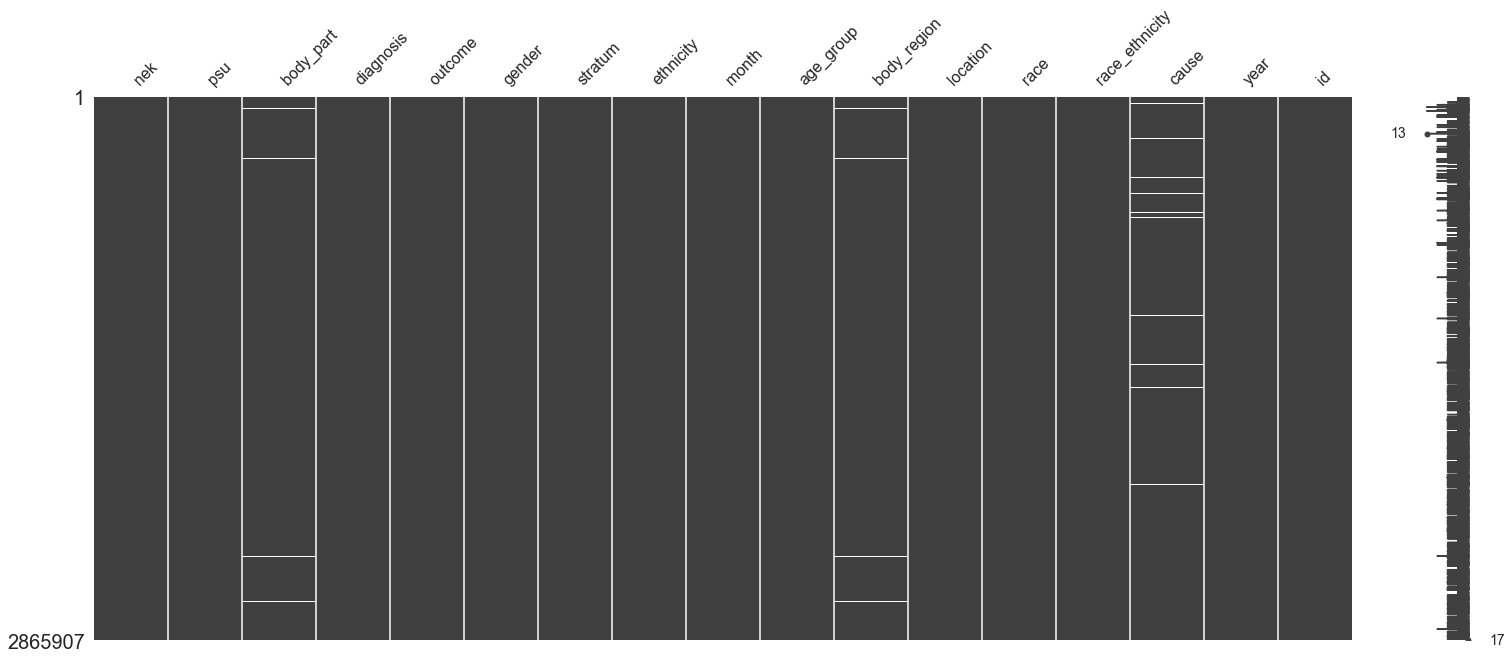

In [360]:
#Mapping nullity (missingness)
msno.matrix(farmdf) 

<AxesSubplot:>

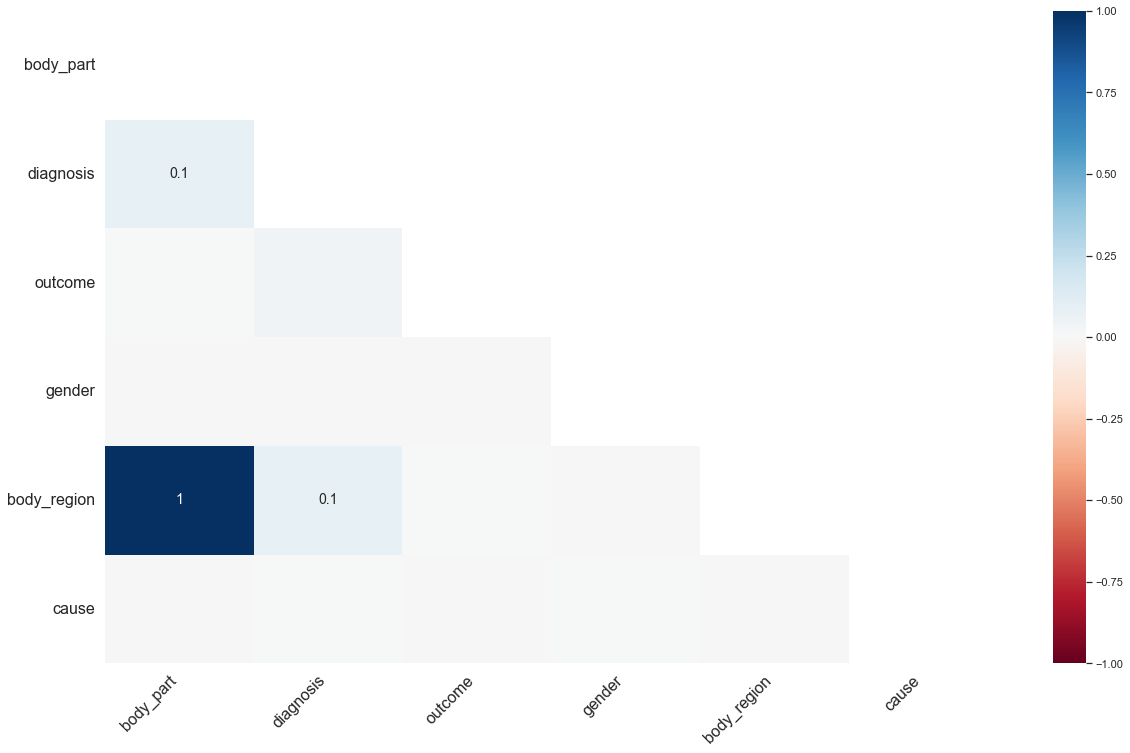

In [361]:
#Mapping nullity (missingness) correlations
msno.heatmap(farmdf)

Body region is a dataset recode from body part. These nullity correlations are anticipated.

With missing values <1% in all but one of the columns, and very weak nullity correlations, the farmdf dataframe does not require multiple imputation with chained equations. 

### Visualize features

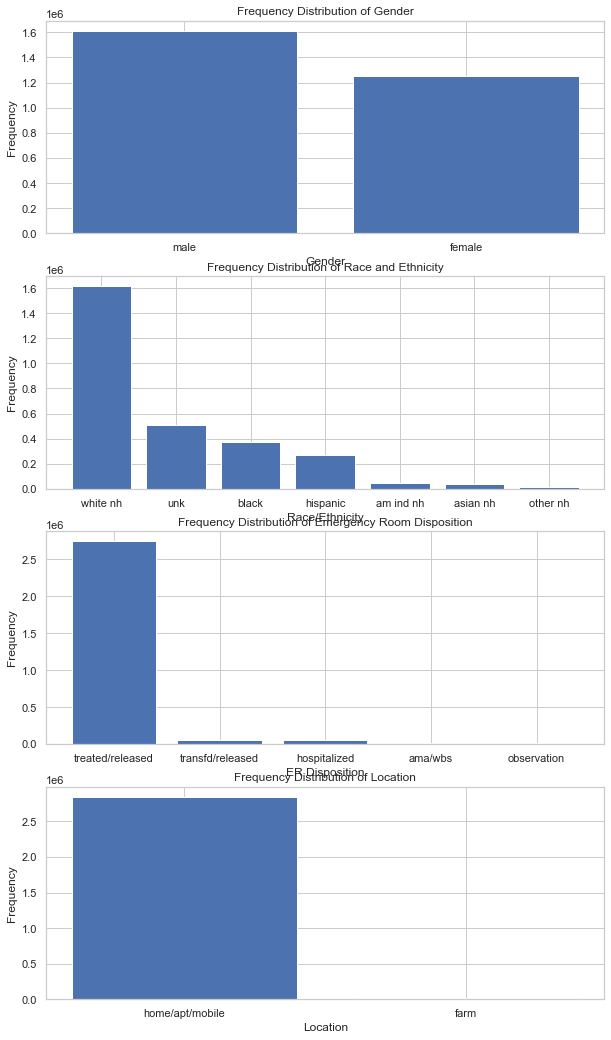

In [362]:
#Plot multiple bar plots for key features
plt.figure(figsize = (10,18))
plt.subplot(4,1,1)
plot_barplots(farmdf, "gender", "Gender", "Frequency Distribution of Gender")

plt.subplot(4,1,2)
plot_barplots(farmdf, "race_ethnicity", "Race/Ethnicity", "Frequency Distribution of Race and Ethnicity")

plt.subplot(4,1,3)
plot_barplots(farmdf, "outcome", "ER Disposition", "Frequency Distribution of Emergency Room Disposition")

plt.subplot(4,1,4)
plot_barplots(farmdf, "location", "Location", "Frequency Distribution of Location")


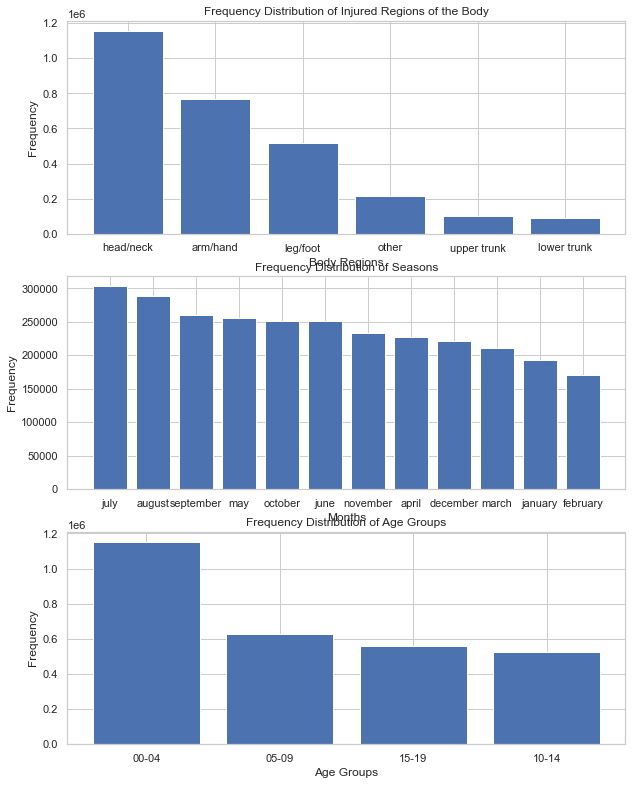

In [363]:
#Plot multiple bar plots for key features
plt.figure(figsize = (10,18))
plt.subplot(4,1,1)
plot_barplots(farmdf, "body_region", "Body Regions", "Frequency Distribution of Injured Regions of the Body")

plt.subplot(4,1,2)
plot_barplots(farmdf, "month", "Months", "Frequency Distribution of Seasons")

plt.subplot(4,1,3)
plot_barplots(farmdf, "age_group", "Age Groups", "Frequency Distribution of Age Groups")

### Statistical tests

In [368]:
#Contingency tables: Injury by Year and Location
#Using unique observations as "clusters"
cont_table1 = pd.crosstab(farmdf.year, farmdf.location, values=farmdf.id, aggfunc="nunique", dropna = False, margins = True)
cont_table1


location,home/apt/mobile,farm,All
year,,,
2000,35297,130,35427
2001,45972,234,46206
2002,50971,224,51195
2003,46795,226,47021
2004,50928,268,51196
2005,52633,242,52875
2006,52227,198,52425
2007,48513,232,48745
2008,47462,200,47662


In [370]:
#Output year by location contingency table as percentages
cont_table2 = pd.crosstab(farmdf.year, farmdf.location, values=farmdf.id, aggfunc="nunique", dropna = False, margins = True, normalize="index")*100
cont_table2


location,home/apt/mobile,farm
year,,
2000,99.633048,0.366952
2001,99.493572,0.506428
2002,99.562457,0.437543
2003,99.519364,0.480636
2004,99.476522,0.523478
2005,99.542317,0.457683
2006,99.622318,0.377682
2007,99.524054,0.475946
2008,99.580378,0.419622


Text(0.5, 1.0, 'Location of Injury By Year (Normalized to Year)')

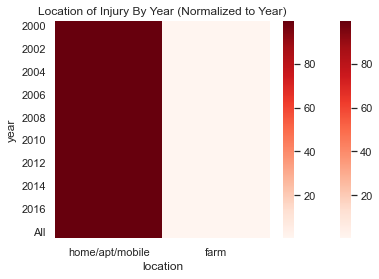

In [371]:
#Visualize injuries per location, by year
sns.heatmap(cont_table2, cmap = "Reds")
ax_1 = sns.heatmap(cont_table2, cmap = "Reds")
ax_1.set_title("Location of Injury By Year (Normalized to Year)")

In [372]:
#Chi-square test
#Categorical features, independent observations, mutually exclusive cells, expected values >5 per cell
chi2_contingency(cont_table1)

(71.59751411830125,
 0.0003800233203738202,
 36,
 array([[3.52765955e+04, 1.50404526e+02, 3.54270000e+04],
        [4.60098335e+04, 1.96166526e+02, 4.62060000e+04],
        [5.09776528e+04, 2.17347212e+02, 5.11950000e+04],
        [4.68213734e+04, 1.99626590e+02, 4.70210000e+04],
        [5.09786485e+04, 2.17351458e+02, 5.11960000e+04],
        [5.26505204e+04, 2.24479614e+02, 5.28750000e+04],
        [5.22024309e+04, 2.22569150e+02, 5.24250000e+04],
        [4.85380542e+04, 2.06945793e+02, 4.87450000e+04],
        [4.74596521e+04, 2.02347941e+02, 4.76620000e+04],
        [4.68711611e+04, 1.99838864e+02, 4.70710000e+04],
        [4.57867845e+04, 1.95215539e+02, 4.59820000e+04],
        [4.26192893e+04, 1.81710676e+02, 4.28010000e+04],
        [4.23494398e+04, 1.80560151e+02, 4.25300000e+04],
        [3.93143801e+04, 1.67619936e+02, 3.94820000e+04],
        [3.61986642e+04, 1.54335838e+02, 3.63530000e+04],
        [3.40378768e+04, 1.45123152e+02, 3.41830000e+04],
        [3.17247391e+04

Post-weighting, the dataset has 2,865,907 observations, computed from **786,484 unique observations**. A chi-square test of the association between year of injury and location computed a p-value of 0.00038. There is a statistically significant relationship between year of injury and location of injury among children <=19 years of age.

In [373]:
#Contingency tables: Injury by Gender and Location
#Using unique observations as "clusters"
cont_table3 = pd.crosstab(farmdf.gender, farmdf.location, values=farmdf.id, aggfunc="nunique", dropna = False, margins = True)
cont_table3

location,home/apt/mobile,farm,All
gender,,,
male,442018,2087,444105
female,341026,1252,342278
All,783145,3339,786484


In [376]:
#Chi-square test
#Categorical features, independent observations, mutually exclusive cells, expected values >5 per cell
chi2_contingency(cont_table3)

(49.59495743605419,
 4.3870147086444983e-10,
 4,
 array([[442219.44121467,   1885.55878533, 444105.        ],
        [340824.7731957 ,   1453.2268043 , 342278.        ],
        [783144.78558963,   3339.21441037, 786484.        ]]))

In [377]:
#Contingency tables: Injury by Gender and Outcome
#Using unique observations as "clusters"
cont_table4 = pd.crosstab(farmdf.gender, farmdf.outcome, values=farmdf.id, aggfunc="nunique", dropna = False, margins = True)
cont_table4

outcome,ama/wbs,hospitalized,observation,transfd/released,treated/released,All
gender,,,,,,
male,2975,8795,1349,5289,425622,444105
female,2294,7412,1154,6282,325075,342278
All,5270,16209,2504,11573,750792,786484


In [378]:
#Chi-square test
#Categorical features, independent observations, mutually exclusive cells, expected values >5 per cell
chi2_contingency(cont_table4)

(599.5580022627088,
 2.1899881142286005e-122,
 10,
 array([[  2975.73290188,   9152.79986215,   1413.74842392,
           6534.80997068, 423952.00864452, 444105.90019686],
        [  2293.42869346,   7054.15926818,   1089.59080256,
           5036.44688125, 326744.27891833, 342277.09543622],
        [  5269.83840466,  16209.04086967,   2503.66077352,
          11572.74314807, 750792.71243716, 786484.00436693]]))

In [379]:
#Contingency tables: Injury by Race_Ethnicity and Outcome
#Using unique observations as "clusters"
cont_table5 = pd.crosstab(farmdf.race_ethnicity, farmdf.outcome, values=farmdf.id, aggfunc="nunique", dropna = False, margins = True)
cont_table5


outcome,ama/wbs,hospitalized,observation,transfd/released,treated/released,All
race_ethnicity,,,,,,
unk,1585,4796,561,2161,151387,160507
white nh,1853,7277,958,5947,360200,376303
black,1142,1894,458,1814,138318,143652
hispanic,520,1752,487,1166,74695,78642
asian nh,76,212,24,205,12053,12570
am ind nh,47,123,10,149,7655,7987
other nh,47,155,6,131,6484,6823
All,5270,16209,2504,11573,750792,786484


In [380]:
#Chi-square test
#Categorical features, independent observations, mutually exclusive cells, expected values >5 per cell
chi2_contingency(cont_table5)

(2019.0007951014297,
 0.0,
 35,
 array([[1.07554665e+03, 3.30807128e+03, 5.11037726e+02, 2.36191677e+03,
         1.53228050e+05, 1.60512378e+05],
        [2.52148688e+03, 7.75536640e+03, 1.19806512e+03, 5.53722348e+03,
         3.59224323e+05, 3.76301535e+05],
        [9.62566288e+02, 2.96057627e+03, 4.57355974e+02, 2.11381018e+03,
         1.37132271e+05, 1.43651420e+05],
        [5.26928966e+02, 1.62068152e+03, 2.50366249e+02, 1.15714401e+03,
         7.50690802e+04, 7.86377991e+04],
        [8.42351885e+01, 2.59083144e+02, 4.00237025e+01, 1.84981753e+02,
         1.20005893e+04, 1.25710869e+04],
        [5.35131343e+01, 1.64590966e+02, 2.54263545e+01, 1.17515655e+02,
         7.62376340e+03, 7.98619049e+03],
        [4.57228871e+01, 1.40630413e+02, 2.17248784e+01, 1.00408154e+02,
         6.51392369e+03, 6.82358997e+03],
        [5.27000000e+03, 1.62090000e+04, 2.50400000e+03, 1.15730000e+04,
         7.50792000e+05, 7.86484000e+05]]))

In [381]:
#Contingency tables: Injury by Location and Outcome
#Using unique observations as "clusters"
cont_table6 = pd.crosstab(farmdf.location, farmdf.outcome, values=farmdf.id, aggfunc="nunique", dropna = False, margins = True)
cont_table6


outcome,ama/wbs,hospitalized,observation,transfd/released,treated/released,All
location,,,,,,
home/apt/mobile,5263,16011,2476,11442,747818,783145
farm,7,198,28,131,2974,3339
All,5270,16209,2504,11573,750792,786484


In [382]:
#Chi-square test
#Categorical features, independent observations, mutually exclusive cells, expected values >5 per cell
chi2_contingency(cont_table6)

(434.0364471857548,
 5.296611524472375e-87,
 10,
 array([[5.24762775e+03, 1.61401894e+04, 2.49337000e+03, 1.15238702e+04,
         7.47604731e+05, 7.83145211e+05],
        [2.23722495e+01, 6.88105869e+01, 1.06300024e+01, 4.91297996e+01,
         3.18726869e+03, 3.33878867e+03],
        [5.27000000e+03, 1.62090000e+04, 2.50400000e+03, 1.15730000e+04,
         7.50792000e+05, 7.86484000e+05]]))

A series of chi-square tests of associations between location and outcome, race_ethnicity and outcome, gender and outcome, gender and location, year and location revealed statistically significant associations (p <0.05). These features will be included in modeling below.

### Machine Learning Modeling
- Logistic Regression
- Decision Trees

### Logistic Regression Modeling

#### Pre-processing

In [364]:
#Inspect data types
farmdf.dtypes

nek                  int64
psu                  int32
body_part         category
diagnosis           object
outcome             object
gender            category
stratum           category
ethnicity         category
month               object
age_group         category
body_region       category
location          category
race              category
race_ethnicity    category
cause               object
year                 int64
id                  object
dtype: object

In [365]:
#Imputation can only take categorical, bool, int, int64 (not Int64) or float values
#Convert analytical features
#"diagnosis", "outcome", "month","cause", "id" to categorical, 
farmdf["diagnosis"] = farmdf["diagnosis"].astype("category")
farmdf["outcome"] = farmdf["outcome"].astype("category")
farmdf["month"] = farmdf["month"].astype("category")
farmdf["cause"] = farmdf["cause"].astype("category")
farmdf["id"] = farmdf["id"].astype("category")

In [375]:
#Inspect data types
farmdf.dtypes

nek                  int64
psu                  int32
body_part         category
diagnosis         category
outcome           category
gender            category
stratum           category
ethnicity         category
month             category
age_group         category
body_region       category
location          category
race              category
race_ethnicity    category
cause             category
year                 int64
id                category
dtype: object

In [384]:
#Recode "location" as "target", outcome feature
farmdf["target"] = farmdf["location"].replace(["home/apt/mobile", "farm"],[0,1])

In [385]:
#Convert "target" to integer data type
farmdf["target"] = farmdf["target"].astype(int) 

In [386]:
#Inspect changes
pd.crosstab(farmdf.target, farmdf.location, dropna = False, margins = True)

location,home/apt/mobile,farm,All
target,,,
0,2848126,0,2848126
1,0,17781,17781
All,2848126,17781,2865907


In [395]:
#Duplicate dataset for modeling, "regress_df"
regress_df = farmdf.copy()

In [396]:
#Generate dummies for categorical features
regress_df = pd.get_dummies(regress_df, columns=["body_region", "diagnosis", "outcome", "gender",
                                                "race_ethnicity", "month", "age_group", "cause"], drop_first = True)
#Inspect
print(regress_df.columns)
pd.options.display.max_columns = 90 #Display up to 90 columns
regress_df.head()

Index(['nek', 'psu', 'body_part', 'stratum', 'ethnicity', 'location', 'race',
       'year', 'id', 'target', 'body_region_upper trunk',
       'body_region_lower trunk', 'body_region_arm/hand',
       'body_region_leg/foot', 'body_region_other', 'diagnosis_anoxia',
       'diagnosis_aspiration', 'diagnosis_avulsion', 'diagnosis_burn chemical',
       'diagnosis_burn elect', 'diagnosis_burn not spec',
       'diagnosis_burn scald', 'diagnosis_burn thermal',
       'diagnosis_concussion', 'diagnosis_contusn abr', 'diagnosis_crushing',
       'diagnosis_dental inj', 'diagnosis_derma/conjunct',
       'diagnosis_dislocation', 'diagnosis_electric shock',
       'diagnosis_foreign body', 'diagnosis_fracture', 'diagnosis_hematoma',
       'diagnosis_hemorrhage', 'diagnosis_ingestion', 'diagnosis_internal inj',
       'diagnosis_laceration', 'diagnosis_nerve damage', 'diagnosis_other',
       'diagnosis_poisoning', 'diagnosis_puncture', 'diagnosis_radiation',
       'diagnosis_strain/sprain', 

,nek,psu,body_part,stratum,ethnicity,location,race,year,id,target,body_region_upper trunk,body_region_lower trunk,body_region_arm/hand,body_region_leg/foot,body_region_other,diagnosis_anoxia,diagnosis_aspiration,diagnosis_avulsion,diagnosis_burn chemical,diagnosis_burn elect,diagnosis_burn not spec,diagnosis_burn scald,diagnosis_burn thermal,diagnosis_concussion,diagnosis_contusn abr,diagnosis_crushing,diagnosis_dental inj,diagnosis_derma/conjunct,diagnosis_dislocation,diagnosis_electric shock,diagnosis_foreign body,diagnosis_fracture,diagnosis_hematoma,diagnosis_hemorrhage,diagnosis_ingestion,diagnosis_internal inj,diagnosis_laceration,diagnosis_nerve damage,diagnosis_other,diagnosis_poisoning,diagnosis_puncture,diagnosis_radiation,diagnosis_strain/sprain,diagnosis_submersion,outcome_hospitalized,outcome_observation,outcome_transfd/released,outcome_treated/released,gender_female,race_ethnicity_white nh,race_ethnicity_black,race_ethnicity_hispanic,race_ethnicity_asian nh,race_ethnicity_am ind nh,race_ethnicity_other nh,month_august,month_december,month_february,month_january,month_july,month_june,month_march,month_may,month_november,month_october,month_september,age_group_05-09,age_group_10-14,age_group_15-19,cause_cut/pierce,cause_dog bite,cause_drown/near drown,cause_fall,cause_fire/burn,cause_firearm gunshot,cause_foreign body,cause_inhalatn/suff,cause_machinery,cause_motorcyclist,cause_mv-occupant,cause_natural/environm,cause_oth bite/sting,cause_oth specified,cause_oth transport,cause_overexertion,cause_pedal cyclist,cause_pedestrian,cause_poisoning,cause_struck by/ag
39,706674,63,face,med,non-hisp/ns,home/apt/mobile,white,2000,20004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
40,706674,63,face,med,non-hisp/ns,home/apt/mobile,white,2000,20004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
41,706674,63,face,med,non-hisp/ns,home/apt/mobile,white,2000,20004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
42,706674,63,face,med,non-hisp/ns,home/apt/mobile,white,2000,20004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
43,706674,63,face,med,non-hisp/ns,home/apt/mobile,white,2000,20004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [397]:
#Drop non-analytical features
del regress_df["nek"]
del regress_df["psu"]
del regress_df["body_part"]
del regress_df["stratum"]
del regress_df["ethnicity"]
del regress_df["location"]
del regress_df["race"]

#Inspect
regress_df.head()

,year,id,target,body_region_upper trunk,body_region_lower trunk,body_region_arm/hand,body_region_leg/foot,body_region_other,diagnosis_anoxia,diagnosis_aspiration,diagnosis_avulsion,diagnosis_burn chemical,diagnosis_burn elect,diagnosis_burn not spec,diagnosis_burn scald,diagnosis_burn thermal,diagnosis_concussion,diagnosis_contusn abr,diagnosis_crushing,diagnosis_dental inj,diagnosis_derma/conjunct,diagnosis_dislocation,diagnosis_electric shock,diagnosis_foreign body,diagnosis_fracture,diagnosis_hematoma,diagnosis_hemorrhage,diagnosis_ingestion,diagnosis_internal inj,diagnosis_laceration,diagnosis_nerve damage,diagnosis_other,diagnosis_poisoning,diagnosis_puncture,diagnosis_radiation,diagnosis_strain/sprain,diagnosis_submersion,outcome_hospitalized,outcome_observation,outcome_transfd/released,outcome_treated/released,gender_female,race_ethnicity_white nh,race_ethnicity_black,race_ethnicity_hispanic,race_ethnicity_asian nh,race_ethnicity_am ind nh,race_ethnicity_other nh,month_august,month_december,month_february,month_january,month_july,month_june,month_march,month_may,month_november,month_october,month_september,age_group_05-09,age_group_10-14,age_group_15-19,cause_cut/pierce,cause_dog bite,cause_drown/near drown,cause_fall,cause_fire/burn,cause_firearm gunshot,cause_foreign body,cause_inhalatn/suff,cause_machinery,cause_motorcyclist,cause_mv-occupant,cause_natural/environm,cause_oth bite/sting,cause_oth specified,cause_oth transport,cause_overexertion,cause_pedal cyclist,cause_pedestrian,cause_poisoning,cause_struck by/ag
39,2000,20004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
40,2000,20004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
41,2000,20004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
42,2000,20004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
43,2000,20004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [398]:
#Create X (predictors) and y (target) objects
X = regress_df.drop("target", axis = 1)
y = regress_df["target"]

In [399]:
#Inspect columns for dataframe of predictors
X.columns

Index(['year', 'id', 'body_region_upper trunk', 'body_region_lower trunk',
       'body_region_arm/hand', 'body_region_leg/foot', 'body_region_other',
       'diagnosis_anoxia', 'diagnosis_aspiration', 'diagnosis_avulsion',
       'diagnosis_burn chemical', 'diagnosis_burn elect',
       'diagnosis_burn not spec', 'diagnosis_burn scald',
       'diagnosis_burn thermal', 'diagnosis_concussion',
       'diagnosis_contusn abr', 'diagnosis_crushing', 'diagnosis_dental inj',
       'diagnosis_derma/conjunct', 'diagnosis_dislocation',
       'diagnosis_electric shock', 'diagnosis_foreign body',
       'diagnosis_fracture', 'diagnosis_hematoma', 'diagnosis_hemorrhage',
       'diagnosis_ingestion', 'diagnosis_internal inj', 'diagnosis_laceration',
       'diagnosis_nerve damage', 'diagnosis_other', 'diagnosis_poisoning',
       'diagnosis_puncture', 'diagnosis_radiation', 'diagnosis_strain/sprain',
       'diagnosis_submersion', 'outcome_hospitalized', 'outcome_observation',
       'outcome_t

In [401]:
#Split Training and Test Datasets, using stratified sampling due to imbalanced categories
data = X.to_numpy()
target = y.to_numpy()

#Xtrain, Xtest, ytrain, ytest
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 2,
                                                                     stratify = regress_df["target"])

print("Training dataset contains: "+ str(len(train_input)) + " observations")
print("Test dataset contains: "+ str(len(test_input)) + " observations")
print(train_input.shape, test_input.shape)

Training dataset contains: 2292725 observations
Test dataset contains: 573182 observations
(2292725, 81) (573182, 81)


In [402]:
#Scale and transform features
ss = StandardScaler()
ss.fit(train_input)
#Scaled Xtrain
train_scaled = ss.transform(train_input)
#Scaled ytrain
test_scaled = ss.transform(test_input)

In [404]:
#Run logistic regression
lr = LogisticRegression(solver = "liblinear")

#Fit model to train data
lr.fit(train_scaled, train_target)

#Inspect
#Xtrain, y train
print(lr.score(train_scaled, train_target))

#Xtest, ytest
print(lr.score(test_scaled, test_target))

0.9938226346378218
0.9938309297919334


/Users/ebuwa/opt/anaconda3/envs/homework/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


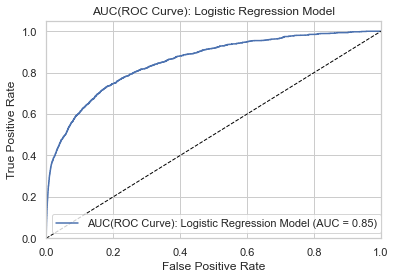

In [405]:
#Plot AUC(ROC) Curve: Xtest, ytest

plot_roc_curve(lr, test_scaled, test_target, name = "AUC(ROC Curve): Logistic Regression Model")
plt.plot([0,1],[0,1], color = "black", lw = 1, linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC Curve): Logistic Regression Model")
plt.show()


In [406]:
#Output table of coefficients using statsmodel package
print("Training Dataset Score: {:.3f}".format(lr.score(train_scaled, train_target)))
print("Test Dataset Score: {:.3f}".format(lr.score(test_scaled, test_target)))
print ("------------------------------------------")


import statsmodels.api as sm

logit_model = sm.Logit(train_target, train_scaled)
result = logit_model.fit()
print("95% Confidence Intervals")
print(result.conf_int(alpha = 0.05, cols=None))
print ("------------------------------------------")
print(result.summary())

Training Dataset Score: 0.994
Test Dataset Score: 0.994
------------------------------------------
Optimization terminated successfully.
         Current function value: 0.692438
         Iterations 6
95% Confidence Intervals
[[-2.55602004e-03  2.78068794e-03]
 [-5.10132265e-03  2.52543783e-04]
 [ 1.29603319e-03  7.00446638e-03]
 [ 6.20470396e-05  5.64606195e-03]
 [-7.45343616e-03  1.09170256e-04]
 [-2.40590251e-03  4.60631711e-03]
 [-7.15766470e-03  1.26032441e-02]
 [-1.09776021e-02  4.30581296e-04]
 [-1.33234956e-02 -7.24789641e-04]
 [-1.10963385e-02 -2.67173102e-04]
 [-6.00691253e-03  2.28272613e-03]
 [-4.96481671e-03  1.04579291e-03]
 [-4.22373166e-03  1.52082285e-03]
 [-1.70305616e-02 -8.18326332e-04]
 [-1.81042978e-02  1.03145198e-04]
 [-1.10585812e-02  3.66307872e-03]
 [-5.60800565e-02 -4.50109424e-03]
 [-1.05178708e-02 -9.17493230e-04]
 [-1.09605576e-02 -4.21133398e-04]
 [-1.24962756e-02 -5.81802877e-04]
 [-1.96281930e-02 -9.31941230e-05]
 [-3.67941842e-03  2.56658644e-03]
 [-2

In [407]:
#Estimate odds ratios
np.exp(result.params)

array([1.00011234, 0.99757855, 1.00415887, 1.00285813, 0.9963346 ,
       1.00110081, 1.0027265 , 0.99474037, 0.99300047, 0.99433435,
       0.99813964, 0.99804241, 0.99864946, 0.99111526, 0.99103981,
       0.99630908, 0.97016359, 0.99429863, 0.99432532, 0.99348229,
       0.99018776, 0.99944374, 0.98560048, 0.98110328, 0.99131834,
       0.99632127, 0.98907931, 0.98237852, 0.96426487, 0.99853706,
       0.97968105, 0.97722161, 0.98943274, 0.99830677, 0.97755849,
       0.99971187, 1.00652968, 1.00301882, 1.00541748, 1.00035966,
       0.99636999, 1.00190628, 0.99281592, 0.99558514, 0.99834472,
       0.99909508, 0.99945294, 1.00009932, 0.9977847 , 0.99813574,
       0.99772781, 1.00188691, 1.0009284 , 0.99921451, 1.0001085 ,
       0.99872473, 1.00044227, 0.99911445, 1.00112255, 1.00810651,
       1.0135564 , 1.00392424, 0.99990991, 0.99733862, 1.00274547,
       1.00121627, 1.00099376, 1.00174456, 1.00113693, 1.06937377,
       1.00458975, 1.01148332, 1.00600834, 1.00323501, 1.00180

In [408]:
#Recall that our predictor features were subsetted as an object "X"
#Inspect columns
X.columns.values

array(['year', 'id', 'body_region_upper trunk', 'body_region_lower trunk',
       'body_region_arm/hand', 'body_region_leg/foot',
       'body_region_other', 'diagnosis_anoxia', 'diagnosis_aspiration',
       'diagnosis_avulsion', 'diagnosis_burn chemical',
       'diagnosis_burn elect', 'diagnosis_burn not spec',
       'diagnosis_burn scald', 'diagnosis_burn thermal',
       'diagnosis_concussion', 'diagnosis_contusn abr',
       'diagnosis_crushing', 'diagnosis_dental inj',
       'diagnosis_derma/conjunct', 'diagnosis_dislocation',
       'diagnosis_electric shock', 'diagnosis_foreign body',
       'diagnosis_fracture', 'diagnosis_hematoma', 'diagnosis_hemorrhage',
       'diagnosis_ingestion', 'diagnosis_internal inj',
       'diagnosis_laceration', 'diagnosis_nerve damage',
       'diagnosis_other', 'diagnosis_poisoning', 'diagnosis_puncture',
       'diagnosis_radiation', 'diagnosis_strain/sprain',
       'diagnosis_submersion', 'outcome_hospitalized',
       'outcome_observatio

In [410]:
#Create a dataframe, "odds_ratios_df"
oddsratios = np.exp(result.params)
features = X.columns.values
odds_ratios_df = pd.DataFrame({"features": features, "oddsratios": list(oddsratios)}, 
                              columns = ["features", "oddsratios"])
#Display up to 95 rows
pd.options.display.max_rows = 96

#View table of odds ratios
odds_ratios_df 

,features,oddsratios
0,year,1.000112
1,id,0.997579
2,body_region_upper trunk,1.004159
3,body_region_lower trunk,1.002858
4,body_region_arm/hand,0.996335
5,body_region_leg/foot,1.001101
6,body_region_other,1.002726
7,diagnosis_anoxia,0.994740
8,diagnosis_aspiration,0.993000
9,diagnosis_avulsion,0.994334


In [415]:
#The predicted probability of the logistic regression for each class in the model
test_prob = lr.predict_proba(test_scaled)[:, 1]

#The test dataset labels by choosing the class with the highest probability, using a threshold of >0.5 
test_pred = lr.predict(test_scaled)

In [416]:
#Model Classification Report
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    569626
           1       0.56      0.03      0.05      3556

    accuracy                           0.99    573182
   macro avg       0.78      0.51      0.52    573182
weighted avg       0.99      0.99      0.99    573182



/Users/ebuwa/opt/anaconda3/envs/homework/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


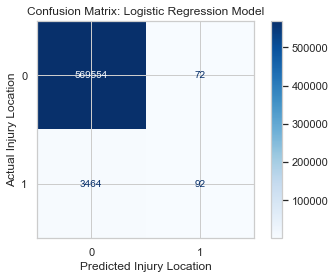

In [414]:
#Plot a Confusion Matrix
plot_confusion_matrix(lr, test_scaled, test_target, cmap = "Blues")
plt.xlabel("Predicted Injury Location")
plt.ylabel("Actual Injury Location")
plt.title("Confusion Matrix: Logistic Regression Model")
plt.show()

I ran a logistic regression model to predict the probabilities that children <= 19 years in our dataset, holding all other factors constant (predictors: age, race + ethnicity, gender, diagnosis, cause of injury, month of injury and emergency department outcome) would have a farm injury (target).